# PISA of compensatory MIRT version with a new $\theta$ and Q which evaluated individually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preprocessing

In [2]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [3]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [4]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [5]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [6]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
#print("Each student's Answer Rates: ", stud_AR)
#print("Answer Rates for each Items: ", prob_AR)

In [7]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [8]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_np = fil4.to_numpy()
print(num_np)

# 극과 극은 통하니까 함께 사라져!
scarub_np = np.where(num_np == 1, 0.99, num_np)
scourge_np = np.where(scarub_np == 0, 0.01, scarub_np)
num_df = scourge_np                                     # df가 전혀 아니지만, 일단 족보 꼬이니까 df라고 칩시다.
print(num_df)
num_realdf = pd.DataFrame(num_df)                       # 레알 df임을 강조 (추후 filna(0) 하는데 사용됨)

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]
2727 51


### 1D weight 따원 없다네 (1D weight는 1에서 전혀 벗어나지 않음)

In [9]:
# 개인 정답률 weight default값 도입
w_np = np.ones((columns,1))    # 세로로 길쭉한 모양
w_df = pd.DataFrame(w_np)      # NaN값 처리하는 데는 DataFrame
num_dfdf = pd.DataFrame(num_df)

# 개인 정답률 도출(가로합) -> '초과정답률'로 정정
p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 DataFrame 형태

p_noN = num_dfdf.fillna(0)
p_noN_np = p_noN.to_numpy()
p_reduct = np.dot(p_noN_np, w_np)

p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태

print("각 학생 Ability 초기값")
#print(row_prob)
theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta
print(theta)

# 각 문항 당 정답률 도출(세로합)
num_sm = num_dfdf.mean(axis=0)
col_prob_1 = num_sm.to_numpy()
col_prob = np.array([col_prob_1])
print("각 문제 beta/d 초기값")
d0 = np.log(col_prob/(1-col_prob))
d = np.mean(d0) - d0
print(d)

각 학생 Ability 초기값
[[ 1.4258252 ]
 [ 0.77105931]
 [ 0.59328118]
 ...
 [ 1.49654643]
 [-0.95803034]
 [-0.11542209]]
각 문제 beta/d 초기값
[[-1.06592356 -0.86372587 -0.9272418   0.1323897   0.13652236  0.29824616
   1.03979649  0.62498327  0.62227537  0.67633159  0.25848602 -0.73688278
  -1.07377972  0.28154664  0.99549523  0.27291773 -0.06267506  0.52115753
  -1.31442017  0.47517084  0.7394715   1.32146298 -1.07892713 -0.77015735
   1.9916129   0.58389348 -2.64341261 -0.94642005  0.43265748 -0.40198734
   0.14656404 -0.89285904  1.24985721 -0.34475264 -1.12433717  0.06468561
  -1.39759794  0.09370025  0.67063169 -1.01775169 -0.43737265  2.31374167
   0.55768136 -1.01264949 -1.33542983  1.21927127 -0.93987446  1.2290068
  -0.168897    1.69768104 -0.09016289]]


In [10]:
# 문항 변별도 alpha prior: 이 alpha는 두 theta에 모두 적용되는 금형으로 활용
alpha = np.ones((1,columns))
print(alpha)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]]


### 2D covariance를 위한 엄선된 자료

In [12]:
# 2D covariance를 위한 자료 -> 지수에만 탑승하는 특수 가공 자료 (mu와 i 차원) 0,1,nan을 -1, 1, 0으로 변환

num_exp1 = num_df.copy()               # num_df는 numpy 형식이라는 것이 함정

# 맞는 문제는 1, 틀린 문제는 -1, 안 푼 문제는 0으로 정렬
num_exp2 = np.where(num_exp1 == 0.01, -0.99, num_exp1)

num_exp_df = pd.DataFrame(num_exp2)
num_exp_af = num_exp_df.fillna(0)
num_exp_np = num_exp_af.to_numpy()                # NaN만 0으로 치환하고, 다시 numpy 형식으로 환원


In [13]:
# 개인 정답률 weight default값 도입 (2D로 시작)
Q_np_ini = np.ones((columns, columns))
np.fill_diagonal(Q_np_ini, 0)
Q_halves = Q_np_ini / 2
Q_df = pd.DataFrame(Q_halves)      # NaN값 처리하는 데는 DataFrame
print(Q_halves.shape)
print(Q_halves)

# 개인 covariance 도출(3D Tensor 형태)
shell_list = []

for i in range(rows):
    garo_pre = num_exp_np[i, :]
    garo_T = np.reshape(garo_pre, (columns, 1))   # 2D짜리 세로모양 numpy vector로 변환
    sero = garo_T.copy()
    garo = np.transpose(garo_T)
    carrier = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)
    np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

    shell_list.append(carrier)

shell_ini = np.array(shell_list)          # 얘가 Initial 값
print(shell_ini.shape)
print(shell_ini)

(51, 51)
[[0.  0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.  0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.  ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.  0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.  0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0. ]]
(2727, 51, 51)
[[[ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  ...
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      0.      0.    ]]

 [[ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  ...
  [ 0.      0.      0.     ...  0.      0.      0.9801]
  [ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.9801  0.      0.    ]]

 [[ 0.      0.      0.     ...  0.      0.      0.    ]
  [ 0.      0.      0.     ...  0.      

## Resume Calculation

In [14]:
Y_solved1 = np.where(num_np == 0, 1, num_np)
Y_pd = pd.DataFrame(Y_solved1)
Y_fna = Y_pd.fillna(0)
Y_solved = Y_fna.to_numpy()
print(Y_solved)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]]


In [15]:
Yij_solved = []

for i in range(rows):
    garo_pre = Y_solved[i, :]
    garo_T = np.reshape(garo_pre, (columns, 1))   # 2D짜리 세로모양 numpy vector로 변환
    sero = garo_T.copy()
    garo = np.transpose(garo_T)
    carrier = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)
    np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

    Yij_solved.append(carrier)

Yij_shell = np.array(Yij_solved)          # 얘가 Initial 값
print(Yij_shell)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 1. 1.]
  [0. 0. 0. ... 1. 0. 1.]
  [0. 0. 0. ... 1. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]]

 [[0. 1. 1. ... 0. 0. 0.]
  [1. 0. 1. ... 0. 0. 0.]
  [1. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [16]:
# 기본적인 theta 값 도출 / 일단 P 도출 먼저

#재료 만들기
p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성 / 사실 이거 p가 아니라 N에 해당함

denominator = []
# denominator 생성
for i in range(rows):
    bf_Qsum = Yij_shell[i] * Q_halves
    af_Qsum = bf_Qsum.sum()
    denominator.append(af_Qsum)

P_carrier = []
theta_ini = []

# P 뽑아내기
for i in range(rows):
    garo_pre = num_exp_np[i, :]
    garo = np.reshape(garo_pre, (1, columns))
    sero_T = np.copy(garo)
    sero = np.transpose(sero_T)
    
    vectorman1 = sero * garo
    vectorman11 = Q_halves * vectorman1
    vectorman111 = vectorman11.sum(axis=1)
    vectorman2 = vectorman111.sum(axis=0)
    
    if denominator[i] == 0:
        P_mu = 0
    else:
        P_mu = vectorman2 / denominator[i]
    
    P_carrier.append(P_mu)
    
P_norm = np.array(P_carrier)            # N(N-1) 나누기가 반영된 부분

print("각 학생의 문제당 covariance")
print(P_norm)

theta_pre = (49/99) * (P_norm) + 0.5
print(theta_pre)

# theta로 변환
theta1_bfT = np.log(theta_pre / (1 - theta_pre))
theta1 = np.reshape(theta1_bfT, (rows,1))
print("각 학생의 ability theta")
print(theta1)


각 학생의 문제당 covariance
[ 0.343035    0.081675    0.02882647 ...  0.37474412  0.12474
 -0.05765294]
[0.669785   0.540425   0.51426765 ... 0.68547941 0.56174    0.47146471]
각 학생의 ability theta
[[ 0.70721281]
 [ 0.16205372]
 [ 0.05708609]
 ...
 [ 0.77906893]
 [ 0.24822677]
 [-0.11426534]]


### Compensatory MIRT model initialization

In [17]:
# 각 성분별 P값 도출 (실험군)
exp1 = alpha * theta
exp2 = alpha * theta1

ex_prob = np.exp(exp1 + exp2 - d)/(1+np.exp(exp1 + exp2 - d))
print(ex_prob)

[[0.96079518 0.95242772 0.95522427 ... 0.90903717 0.60715213 0.9023137 ]
 [0.88069589 0.8577637  0.8653383  ... 0.75063654 0.31765532 0.73561022]
 [0.84765045 0.81966702 0.82886564 ... 0.69408014 0.25974126 0.67711178]
 ...
 [0.96582667 0.95848668 0.96094166 ... 0.92015922 0.64059195 0.91418022]
 [0.58810087 0.53840478 0.55414639 ... 0.36797672 0.08260374 0.34986318]
 [0.69767191 0.6534046  0.66764532 ... 0.48480707 0.12704214 0.46517534]]


In [18]:
# 결측치 반영한 P 행렬 도출 (실험군)
ex_prob_real = ex_prob.copy()

for n in range(ex_prob.shape[0]):
    for m in range(ex_prob.shape[1]):
        if np.isnan(num_df[n][m]):
            ex_prob_real[n][m] = np.nan
            
print(ex_prob_real)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.75063654        nan 0.73561022]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.92015922 0.64059195 0.91418022]
 [       nan        nan        nan ... 0.36797672        nan 0.34986318]
 [0.69767191 0.6534046  0.66764532 ...        nan        nan        nan]]


In [19]:
# Kullbeck Leibler Divergence값 도출

# 각 사람이 각 문제에 대한 KLD 도출
KLD_indiv = num_df * np.log(num_df / ex_prob_real) + (1 - num_df) * np.log((1 - num_df) / (1 - ex_prob_real))
print(KLD_indiv)

# NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
KLD_indiv_df = pd.DataFrame(KLD_indiv)
KLD_NaNga_df = KLD_indiv_df.fillna(0)
KLD_NaNga_np = KLD_NaNga_df.to_numpy()
print(KLD_NaNga_np)

# KLD 최초도출
KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
KLD_TotalSum_np = np.sum(KLD_RowSum, axis=0)
print(KLD_TotalSum_np)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.24185228        nan 0.26128612]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.05165214 0.96151604 0.05738379]
 [       nan        nan        nan ... 0.93832501        nan 0.38076732]
 [1.13187856 0.37589759 0.35497221 ...        nan        nan        nan]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.24185228 0.         0.26128612]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.05165214 0.96151604 0.05738379]
 [0.         0.         0.         ... 0.93832501 0.         0.38076732]
 [1.13187856 0.37589759 0.35497221 ... 0.         0.         0.        ]]
17585.38918675419


## Real NDG Process

In [20]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산)
# 비교대상은 num_df
# 모든 변수 초기값의 형태는 np
def expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    exponet_1 = alpha_let * theta_let
    exponet_2 = alpha2le * theta2le
    
    before_nan = np.exp(exponet_1 + exponet_2 - d_let)/(1+np.exp(exponet_1 + exponet_2 - d_let))
    after_nan = before_nan.copy()
    
    # 순진한 모델값에 구멍 뚫어버리기
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(num_df[n][m]):
                after_nan[n][m] = np.nan
    
    # 너덜해진 모델값의 모난 부분 절단
    scarub = np.where(after_nan > 0.99, 0.99, after_nan)
    scourge = np.where(scarub < 0.01, 0.01, scarub)
    model_result = scourge
    
    return model_result                              # numpy 형태로 return


In [21]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수

def preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    p_imu = expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = num_df.copy()                                                    # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu           # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태 but 결측치를 제거하지는 않음

In [22]:
# alpha값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = theta_let * common_unit                               # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [23]:
# 의문의 delta값 갱신하는 함수
# theta_let, delta_let, alpha_let은 np
def set_delta(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * common_unit                                                # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_dtak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    d_med = d_let - A * delta_dtak                                            # Gradient Descent 방식으로 D_KL의 delta 업데이트
    d_result = d_med - np.mean(d_med)
    
    # 결과값은 np 형태로 추출
    return d_result

In [24]:
def update_theta(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = alpha_let * common_unit                                           # summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_thetak = delta_matrix2.sum(axis=1, keepdims = True)   # summation 직후 (문제당 beta 맞추기 위한 summation)
        
    theta_update = theta_let - A * delta_thetak                 # Gradient Descent 방식으로 D_KL 업데이트
    
    # 결과값은 np 형태로 추출
    return theta_update

### $\theta_{2}$ Update

In [25]:
def Shell_gagong(samjin_data, Q_let):              # gagonged_data는 불변인 DataFrame, Q_let은 계속 변화
    # gagonged_data는 -1, 1 및 결측치 0처리 된 상태로 도입, numpy 형태로 도임
    
    num_gagong = samjin_data.copy()
    rows_let = num_gagong.shape[0]
    columns_let = num_gagong.shape[1]

    # 개인 covariance 도출(3D Tensor 형태)
    shell_list = []

    for i in range(rows_let):
        garo_pre = num_gagong[i, :]                  # 1D짜리 numpy vector가 추출됨
        garo_T = np.reshape(garo_pre, (columns_let, 1))   # 2D짜리 세로모양 numpy vector로 변환
        sero = garo_T.copy()
        garo = np.transpose(garo_T)
        shell_rough = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)

        carrier = Q_let * shell_rough                # 가중치 행렬 Q_ij를 입힌 모습
        np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

        shell_list.append(carrier)

    shell_result = np.array(shell_list)          # 결과물 (3D Tensor 형태)
    
    return shell_result

In [26]:
# '필수요소' 점검 탭
# 학생 covariance률 구하는 함수
def answer_covari_bfsum(gagong_data, Q_let):                # gagong_dats는 불변, 최종적으로 P_2 계산 목적

    # 개인 정답률 weight default값 도입 (2D로 시작)
    num_gagong_bf = gagong_data.to_numpy()
    rows_let = num_gagong_bf.shape[0]
    columns_let = num_gagong_bf.shape[1]
    Yij_shell_let = Yij_shell.copy()

    Q_np = Q_let.copy()              # 가공 시작
    
    # 0, 1 데이터를 -1, 1 데이터로 변환 (결측치는 0 처리)
    num_gagonged_bf = np.where(num_gagong_bf == 0.01, -0.99, num_gagong_bf)
    num_gag_pd = pd.DataFrame(num_gagonged_bf)
    num_gag_fna = num_gag_pd.fillna(0)
    num_gagonged_np = num_gag_fna.to_numpy()
    
    p_bfsum = Shell_gagong(num_gagonged_np, Q_np)       # P계산을 위한 밑재료만 제공, 아직 normalization 안 된 상태

#---------------------------------------------------simple sum up ------------- Normalization down ---------------------------------------
    
    #Normalization 재료 만들기
    
    denomin = []
    # denominator 생성
    for i in range(rows):
        bf_Qsam = Yij_shell[i] * Q_let
        af_Qsam = bf_Qsam.sum()
        denomin.append(af_Qsam)

    P2_carrier = p_bfsum.copy()          # 3D Tensor
    
    # P2 뽑아내기 (합계 내기 직전)
    for i in range(rows_let):
        if denomin[i] == 0:
            P2_carrier[i] = 0 * P2_carrier[i]
        else:
            P2_carrier[i] = P2_carrier[i] / denomin[i]
    
    return P2_carrier
        

In [27]:
def answer_covari_afsum(gagong_data, Q_let):
    
    # P2 밑재료 초벌 가공(합)
    p_bfsum = answer_covari_bfsum(gagong_data, Q_let)
    gagong_np = gagong_data.to_numpy()
    rows_let = gagong_np.shape[0]
    columns_let = gagong_np.shape[1]
    
    covari_ini = p_bfsum.sum(axis=2)
    covari_mid = covari_ini.sum(axis=1)
    covari_carry = np.reshape(covari_mid, (rows_let, 1))      # 세로 모양 벡터 형태 유지

    # theta 만들 수 있도록 normalization (다시 0,1 데이터로 복귀)

    mid_result = (49/99) * (covari_carry) + 0.5
    
    # 너덜해진 모델값의 모난 부분 절단
    scarub = np.where(mid_result > 0.99, 0.99, mid_result)
    scourge = np.where(scarub < 0.01, 0.01, scarub)
    P2_result = scourge
        
    return P2_result

In [28]:
def Q_deriv(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data):

    # 개인 정답률 weight default값 도입 (2D로 시작)
    num_gagong_bf = gagong_data.to_numpy()
    rows_let = num_gagong_bf.shape[0]
    columns_let = num_gagong_bf.shape[1]
    Yij_shell_let = Yij_shell.copy()

    Q_np = Q_let.copy()              # 가공 시작
    Q_nuul = Q_halves.copy()           # 얘는 from Universal Matrix
    
    # 0, 1 데이터를 -1, 1 데이터로 변환 (결측치는 0 처리)
    num_gagonged_bf = np.where(num_gagong_bf == 0.01, -0.99, num_gagong_bf)
    num_gag_pd = pd.DataFrame(num_gagonged_bf)
    num_gag_fna = num_gag_pd.fillna(0)
    num_gagonged_np = num_gag_fna.to_numpy()
    
    p_bfsum_nossi = Shell_gagong(num_gagonged_np, Q_nuul)
    p_bfsum = Shell_gagong(num_gagonged_np, Q_np)       # P계산을 위한 밑재료만 제공, 아직 normalization 안 된 상태

#---------------------------------------------------simple sum up ------------- Normalization down ---------------------------------------
    
    #Normalization 재료 만들기
    
    denomin = []
    # denominator 생성
    for i in range(rows):
        bf_Qsam = Yij_shell[i] * Q_let
        af_Qsam = bf_Qsam.sum()
        denomin.append(af_Qsam)

    P2_carrier1 = p_bfsum_nossi.copy()
    P2_carrier20 = p_bfsum.copy()          # 3D Tensor

    # P2 1번째 항 뽑아내기 (합계 내기 직전)
    for i in range(rows_let):
        if denomin[i] == 0:
            P2_carrier1[i] = 0 * P2_carrier1[i]
        else:
            P2_carrier1[i] = P2_carrier1[i] / denomin[i]

    # P2 2번째 항 뽑아내기 (합계 내기 직전)
    for i in range(rows_let):
        if denomin[i] == 0:
            P2_carrier20[i] = 0 * P2_carrier20[i]
        else:
            P2_carrier20[i] = P2_carrier20[i] / (denomin[i] * denomin[i])
            
    covari2_ini = P2_carrier20.sum(axis=2)
    covari2_mid = covari2_ini.sum(axis=1)
    P22_part = np.reshape(covari2_mid, (rows_let, 1))      # 세로 모양 벡터 형태 유지
    
    P2_list = []
    for i in range(rows_let):
        carrier = Yij_shell_let[i] * P22_part[i]
        P2_list.append(carrier)
    
    P2_carrier2 = np.array(P2_list)
    
    return P2_carrier1, P2_carrier2
        

In [29]:
def Q_learn(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data):
    
    Q_np_test = Q_let.copy()           # 얘가 learning 시키는 Matrix
    gagonged_data = gagong_data.to_numpy()
    rows_let = gagonged_data.shape[0]
    columns_let = gagonged_data.shape[1]

    # theta 건들기 전에 할 수 있는 미분 chain
    P2_mu = answer_covari_afsum(gagong_data, Q_np_test)
    Normed_Y = (49/99) * (Q_deriv(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data)[0] - Q_deriv(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data)[1])

#---------------------------------------------------3D up ------------- 2D down ----------------------------------------------------------
    
    # '공통부분' 끌올 (밑재료 준비)
    com_pt = preprocess_diff(alp1, alp2, d_let, tht1, tht2)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)

    # '공통부분' 끌올 (요리 시작)
    common_unit_np = com_pt * alp1                                    # 일단 2D Matrix 형태로 도출 (Q와는 따로 노는 Matrix)
        
    common_unit_T = np.transpose(common_unit_np)                      # '문항 X 사람' 형태로 변환 (mu가 axis=1에 해당; 3D의 mu와 연동 목적)
    decoy_1st = pd.DataFrame(common_unit_T)
    decoy_2nd = decoy_1st.fillna(0)
    common_unit = decoy_2nd.to_numpy()                                 # 4D List로 변환 준비 끝

#-----------------------------------Now, it's time to build a 4D tensor ------------------------------------------------------------------
    
    P_hat_list = []                                                    # 4D Tensor 담을 list 생성 (4D Tensor라니... 미친듯이 무섭군요..!!)
    P_hat_3D = []                                                      # 3D Tensor 일부분을 담을 list 생성
    carrier_2D = []

    for i in range(columns_let):
        for j in range(columns_let):
            for mu in range(rows_let):
                carrier = common_unit[:, mu] * Normed_Y[mu, i, j] / (P2_mu[mu, 0] * (1 - P2_mu[mu, 0]))
                carrier_2D.append(carrier)
            P_hat_3D.append(carrier_2D)          # 4D Tensor로 재조합하기 위해 P_hat_list를 채운 모습 i, jth 성부 채우기
            carrier_2D = []                      # carrier_2D를 재활용 하기 위해 내용물을 비운 모습
        P_hat_list.append(P_hat_3D)              # 드디어 ith 완성
        P_hat_3D = []                            # P_hat_3D를 재활용 하기 위해 내용물을 비운 모습
        
    P_hat_np = np.array(P_hat_list)              # 4D Tensor로 완성된 모습 (여기서 i, j는 냅두고, k와 mu를 모두 더해서 없애야 함) (이때 0은 k, 1은 mu, 2, 3은 각각 i, j)

    # KLD Gradient Discent
    Q_pre = P_hat_np.sum(axis=3)                                 # 4D Tensor는 극혐이므로, 여기선 keepdims를 하지 않는다. (4D -> 3D); 여기는 mu 없애는 부분
    Q_presum = Q_pre.sum(axis=2)                              # 3D Tensor 역시 극혐이므로, keepdims를 하지 않는다. (3D -> 2D); 여기는 k 없애는 부분
    
    # Final Gradient Descendent: update
    Q_med = Q_np_test - A * Q_presum
    np.fill_diagonal(Q_med, 0)
    Q_result = Q_med/(2 * Q_med.mean())                                  # Normalization 대용; 대각선 아닌 모든 성분의 평균이 0.5가 되도록 세팅

    # 결과값은 np 형태로 추출
    return Q_result                                                     # 2D matrix로 return


In [30]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta_Q(gagong_data, Q_let):
    
    rate_result = answer_covari_afsum(gagong_data, Q_let)
    
    theta_result = np.log((rate_result)/(1 - rate_result))
    
    # 결과값은 np 형태로 추출
    return theta_result

In [31]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    P_imu = expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le)
    Q_imu = num_df.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [35]:
alpha1_test = alpha.copy()
alpha2_test = alpha.copy()
d_test = d.copy()
#w_test = w_np.copy()
Q_test = Q_halves.copy()
theta1_test = theta.copy()
theta2_test = theta1.copy()
KLD_test = KLD_TotalSum_np.copy()
KLD_basket = []
KLD_basket.append(KLD_test)

In [33]:
from tqdm import tqdm

In [36]:
# 본격 Iteration 굴리는 파트
# Learning Rate 설정
A = 0.0035
limit = 1000
for k in tqdm(range(limit)):
    # alpha1값 갱신
    alpha1_carrier = set_alpha(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    alpha1_test = alpha1_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # alpha2값 갱신
    alpha2_carrier = set_alpha(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test)
    alpha2_test = alpha2_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # d값 갱신
    delta_carrier = set_delta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    d_test = delta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)
    
    # Q값 갱신
    Q_carrier = Q_learn(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test, Q_test, num_dfdf)
    Q_test = Q_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # 노멀 theta값 갱신
    theta1_carrier = update_theta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    theta1_test = theta1_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)
    
    # 복잡한 theta2값 갱신
    theta2_carrier = set_theta_Q(num_dfdf, Q_test)
    theta2_test = theta2_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
    elif k == limit - 1:
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
        break

  0%|                                                                               | 1/1000 [00:26<7:23:02, 26.61s/it]

1 번째 Kullback-Leibler Divergence 값 =  17055.862481133234


  0%|▏                                                                              | 2/1000 [00:52<7:18:41, 26.37s/it]

2 번째 Kullback-Leibler Divergence 값 =  16855.463401364155


  0%|▏                                                                              | 3/1000 [01:19<7:17:27, 26.33s/it]

3 번째 Kullback-Leibler Divergence 값 =  16743.73465657173


  0%|▎                                                                              | 4/1000 [01:45<7:15:50, 26.26s/it]

4 번째 Kullback-Leibler Divergence 값 =  16668.617193490783


  0%|▍                                                                              | 5/1000 [02:11<7:16:02, 26.29s/it]

5 번째 Kullback-Leibler Divergence 값 =  16613.242155933556


  1%|▍                                                                              | 6/1000 [02:37<7:13:28, 26.17s/it]

6 번째 Kullback-Leibler Divergence 값 =  16570.029559616734


  1%|▌                                                                              | 7/1000 [03:03<7:13:02, 26.17s/it]

7 번째 Kullback-Leibler Divergence 값 =  16534.89987109066


  1%|▋                                                                              | 8/1000 [03:29<7:12:15, 26.14s/it]

8 번째 Kullback-Leibler Divergence 값 =  16505.581441320417


  1%|▋                                                                              | 9/1000 [03:55<7:12:07, 26.16s/it]

9 번째 Kullback-Leibler Divergence 값 =  16480.526520456922


  1%|▊                                                                             | 10/1000 [04:22<7:11:15, 26.14s/it]

10 번째 Kullback-Leibler Divergence 값 =  16458.65533771382


  1%|▊                                                                             | 11/1000 [04:48<7:12:32, 26.24s/it]

11 번째 Kullback-Leibler Divergence 값 =  16439.289143208567


  1%|▉                                                                             | 12/1000 [05:14<7:12:15, 26.25s/it]

12 번째 Kullback-Leibler Divergence 값 =  16421.91226144212


  1%|█                                                                             | 13/1000 [05:41<7:15:52, 26.50s/it]

13 번째 Kullback-Leibler Divergence 값 =  16406.16189448953


  1%|█                                                                             | 14/1000 [06:11<7:29:16, 27.34s/it]

14 번째 Kullback-Leibler Divergence 값 =  16391.749024099794


  2%|█▏                                                                            | 15/1000 [06:38<7:26:43, 27.21s/it]

15 번째 Kullback-Leibler Divergence 값 =  16378.44803429866


  2%|█▏                                                                            | 16/1000 [07:04<7:21:52, 26.94s/it]

16 번째 Kullback-Leibler Divergence 값 =  16366.081237556835


  2%|█▎                                                                            | 17/1000 [07:30<7:18:00, 26.74s/it]

17 번째 Kullback-Leibler Divergence 값 =  16354.43192457368


  2%|█▍                                                                            | 18/1000 [07:56<7:15:36, 26.62s/it]

18 번째 Kullback-Leibler Divergence 값 =  16343.36826534826


  2%|█▍                                                                            | 19/1000 [08:23<7:14:33, 26.58s/it]

19 번째 Kullback-Leibler Divergence 값 =  16332.78444738626


  2%|█▌                                                                            | 20/1000 [08:49<7:12:55, 26.51s/it]

20 번째 Kullback-Leibler Divergence 값 =  16322.713785853146


  2%|█▋                                                                            | 21/1000 [09:16<7:14:10, 26.61s/it]

21 번째 Kullback-Leibler Divergence 값 =  16313.092964677562


  2%|█▋                                                                            | 22/1000 [09:43<7:12:54, 26.56s/it]

22 번째 Kullback-Leibler Divergence 값 =  16303.8295644879


  2%|█▊                                                                            | 23/1000 [10:09<7:11:51, 26.52s/it]

23 번째 Kullback-Leibler Divergence 값 =  16294.878213823216


  2%|█▊                                                                            | 24/1000 [10:36<7:13:16, 26.64s/it]

24 번째 Kullback-Leibler Divergence 값 =  16286.214902272162


  2%|█▉                                                                            | 25/1000 [11:02<7:11:16, 26.54s/it]

25 번째 Kullback-Leibler Divergence 값 =  16277.814135746192


  3%|██                                                                            | 26/1000 [11:28<7:07:03, 26.31s/it]

26 번째 Kullback-Leibler Divergence 값 =  16269.655175865242


  3%|██                                                                            | 27/1000 [11:54<7:05:46, 26.26s/it]

27 번째 Kullback-Leibler Divergence 값 =  16261.70612097498


  3%|██▏                                                                           | 28/1000 [12:21<7:06:57, 26.36s/it]

28 번째 Kullback-Leibler Divergence 값 =  16253.944048874288


  3%|██▎                                                                           | 29/1000 [12:47<7:06:37, 26.36s/it]

29 번째 Kullback-Leibler Divergence 값 =  16246.350697329572


  3%|██▎                                                                           | 30/1000 [13:13<7:05:01, 26.29s/it]

30 번째 Kullback-Leibler Divergence 값 =  16238.906323277646


  3%|██▍                                                                           | 31/1000 [13:39<7:04:23, 26.28s/it]

31 번째 Kullback-Leibler Divergence 값 =  16231.593640839088


  3%|██▍                                                                           | 32/1000 [14:06<7:05:35, 26.38s/it]

32 번째 Kullback-Leibler Divergence 값 =  16224.397946046214


  3%|██▌                                                                           | 33/1000 [14:32<7:05:04, 26.37s/it]

33 번째 Kullback-Leibler Divergence 값 =  16217.305958368017


  3%|██▋                                                                           | 34/1000 [14:59<7:06:01, 26.46s/it]

34 번째 Kullback-Leibler Divergence 값 =  16210.305389735528


  4%|██▋                                                                           | 35/1000 [15:25<7:03:47, 26.35s/it]

35 번째 Kullback-Leibler Divergence 값 =  16203.371280319147


  4%|██▊                                                                           | 36/1000 [15:52<7:06:32, 26.55s/it]

36 번째 Kullback-Leibler Divergence 값 =  16196.471981325303


  4%|██▉                                                                           | 37/1000 [16:19<7:06:09, 26.55s/it]

37 번째 Kullback-Leibler Divergence 값 =  16189.635193363794


  4%|██▉                                                                           | 38/1000 [16:45<7:04:32, 26.48s/it]

38 번째 Kullback-Leibler Divergence 값 =  16182.852899751073


  4%|███                                                                           | 39/1000 [17:11<7:03:09, 26.42s/it]

39 번째 Kullback-Leibler Divergence 값 =  16176.113728228258


  4%|███                                                                           | 40/1000 [17:38<7:04:02, 26.50s/it]

40 번째 Kullback-Leibler Divergence 값 =  16169.394481339841


  4%|███▏                                                                          | 41/1000 [18:05<7:03:10, 26.48s/it]

41 번째 Kullback-Leibler Divergence 값 =  16162.710254023299


  4%|███▎                                                                          | 42/1000 [18:31<7:01:29, 26.40s/it]

42 번째 Kullback-Leibler Divergence 값 =  16156.05561714437


  4%|███▎                                                                          | 43/1000 [18:57<6:58:58, 26.27s/it]

43 번째 Kullback-Leibler Divergence 값 =  16149.425699808022


  4%|███▍                                                                          | 44/1000 [19:23<6:59:47, 26.35s/it]

44 번째 Kullback-Leibler Divergence 값 =  16142.816913259621


  4%|███▌                                                                          | 45/1000 [19:50<6:59:05, 26.33s/it]

45 번째 Kullback-Leibler Divergence 값 =  16136.225679200508


  5%|███▌                                                                          | 46/1000 [20:16<6:59:53, 26.41s/it]

46 번째 Kullback-Leibler Divergence 값 =  16129.648247138466


  5%|███▋                                                                          | 47/1000 [20:43<7:00:55, 26.50s/it]

47 번째 Kullback-Leibler Divergence 값 =  16123.081411231407


  5%|███▋                                                                          | 48/1000 [21:09<6:59:47, 26.46s/it]

48 번째 Kullback-Leibler Divergence 값 =  16116.52166432114


  5%|███▊                                                                          | 49/1000 [21:36<7:00:10, 26.51s/it]

49 번째 Kullback-Leibler Divergence 값 =  16109.904881581253


  5%|███▉                                                                          | 50/1000 [22:03<7:02:55, 26.71s/it]

50 번째 Kullback-Leibler Divergence 값 =  16103.290846356535


  5%|███▉                                                                          | 51/1000 [22:29<6:59:22, 26.52s/it]

51 번째 Kullback-Leibler Divergence 값 =  16096.678312696466


  5%|████                                                                          | 52/1000 [22:56<7:00:31, 26.62s/it]

52 번째 Kullback-Leibler Divergence 값 =  16090.065858999722


  5%|████▏                                                                         | 53/1000 [23:22<6:59:16, 26.56s/it]

53 번째 Kullback-Leibler Divergence 값 =  16083.452682189949


  5%|████▏                                                                         | 54/1000 [23:49<6:59:32, 26.61s/it]

54 번째 Kullback-Leibler Divergence 값 =  16076.837465791903


  6%|████▎                                                                         | 55/1000 [24:16<6:58:38, 26.58s/it]

55 번째 Kullback-Leibler Divergence 값 =  16070.218945868648


  6%|████▎                                                                         | 56/1000 [24:41<6:55:10, 26.39s/it]

56 번째 Kullback-Leibler Divergence 값 =  16063.595978747468


  6%|████▍                                                                         | 57/1000 [25:08<6:55:21, 26.43s/it]

57 번째 Kullback-Leibler Divergence 값 =  16056.967631207332


  6%|████▌                                                                         | 58/1000 [25:34<6:53:13, 26.32s/it]

58 번째 Kullback-Leibler Divergence 값 =  16050.333137872527


  6%|████▌                                                                         | 59/1000 [26:00<6:50:52, 26.20s/it]

59 번째 Kullback-Leibler Divergence 값 =  16043.691874994507


  6%|████▋                                                                         | 60/1000 [26:27<6:52:49, 26.35s/it]

60 번째 Kullback-Leibler Divergence 값 =  16037.043389978437


  6%|████▊                                                                         | 61/1000 [26:54<6:56:09, 26.59s/it]

61 번째 Kullback-Leibler Divergence 값 =  16030.387367291642


  6%|████▊                                                                         | 62/1000 [27:21<6:56:52, 26.67s/it]

62 번째 Kullback-Leibler Divergence 값 =  16023.723396581321


  6%|████▉                                                                         | 63/1000 [27:46<6:51:54, 26.38s/it]

63 번째 Kullback-Leibler Divergence 값 =  16017.051123906233


  6%|████▉                                                                         | 64/1000 [28:13<6:50:50, 26.34s/it]

64 번째 Kullback-Leibler Divergence 값 =  16010.370562807511


  6%|█████                                                                         | 65/1000 [28:39<6:51:01, 26.38s/it]

65 번째 Kullback-Leibler Divergence 값 =  16003.681876655639


  7%|█████▏                                                                        | 66/1000 [29:05<6:49:24, 26.30s/it]

66 번째 Kullback-Leibler Divergence 값 =  15996.98540398465


  7%|█████▏                                                                        | 67/1000 [29:31<6:46:12, 26.12s/it]

67 번째 Kullback-Leibler Divergence 값 =  15990.281803949258


  7%|█████▎                                                                        | 68/1000 [29:57<6:45:46, 26.12s/it]

68 번째 Kullback-Leibler Divergence 값 =  15983.571863916863


  7%|█████▍                                                                        | 69/1000 [30:24<6:47:00, 26.23s/it]

69 번째 Kullback-Leibler Divergence 값 =  15976.856070437469


  7%|█████▍                                                                        | 70/1000 [30:50<6:48:07, 26.33s/it]

70 번째 Kullback-Leibler Divergence 값 =  15970.123859543826


  7%|█████▌                                                                        | 71/1000 [31:16<6:47:29, 26.32s/it]

71 번째 Kullback-Leibler Divergence 값 =  15963.339407126974


  7%|█████▌                                                                        | 72/1000 [31:42<6:45:26, 26.21s/it]

72 번째 Kullback-Leibler Divergence 값 =  15956.536221413699


  7%|█████▋                                                                        | 73/1000 [32:10<6:51:00, 26.60s/it]

73 번째 Kullback-Leibler Divergence 값 =  15949.73006798271


  7%|█████▊                                                                        | 74/1000 [32:36<6:49:36, 26.54s/it]

74 번째 Kullback-Leibler Divergence 값 =  15942.921920269055


  8%|█████▊                                                                        | 75/1000 [33:02<6:47:24, 26.43s/it]

75 번째 Kullback-Leibler Divergence 값 =  15936.112846171307


  8%|█████▉                                                                        | 76/1000 [33:29<6:45:21, 26.32s/it]

76 번째 Kullback-Leibler Divergence 값 =  15929.303994349382


  8%|██████                                                                        | 77/1000 [33:55<6:45:51, 26.38s/it]

77 번째 Kullback-Leibler Divergence 값 =  15922.496584314873


  8%|██████                                                                        | 78/1000 [34:21<6:45:13, 26.37s/it]

78 번째 Kullback-Leibler Divergence 값 =  15915.69191166032


  8%|██████▏                                                                       | 79/1000 [34:48<6:44:09, 26.33s/it]

79 번째 Kullback-Leibler Divergence 값 =  15908.891364687981


  8%|██████▏                                                                       | 80/1000 [35:14<6:43:02, 26.29s/it]

80 번째 Kullback-Leibler Divergence 값 =  15902.096390792934


  8%|██████▎                                                                       | 81/1000 [35:41<6:47:14, 26.59s/it]

81 번째 Kullback-Leibler Divergence 값 =  15895.308520634995


  8%|██████▍                                                                       | 82/1000 [36:08<6:46:22, 26.56s/it]

82 번째 Kullback-Leibler Divergence 값 =  15888.529076780782


  8%|██████▍                                                                       | 83/1000 [36:34<6:47:26, 26.66s/it]

83 번째 Kullback-Leibler Divergence 값 =  15881.752190133284


  8%|██████▌                                                                       | 84/1000 [37:01<6:44:38, 26.51s/it]

84 번째 Kullback-Leibler Divergence 값 =  15874.985474474328


  8%|██████▋                                                                       | 85/1000 [37:27<6:44:43, 26.54s/it]

85 번째 Kullback-Leibler Divergence 값 =  15868.232124394759


  9%|██████▋                                                                       | 86/1000 [37:54<6:43:58, 26.52s/it]

86 번째 Kullback-Leibler Divergence 값 =  15861.49408896195


  9%|██████▊                                                                       | 87/1000 [38:20<6:42:26, 26.45s/it]

87 번째 Kullback-Leibler Divergence 값 =  15854.750975806322


  9%|██████▊                                                                       | 88/1000 [38:46<6:40:07, 26.32s/it]

88 번째 Kullback-Leibler Divergence 값 =  15848.02448332174


  9%|██████▉                                                                       | 89/1000 [39:13<6:40:39, 26.39s/it]

89 번째 Kullback-Leibler Divergence 값 =  15841.319813221757


  9%|███████                                                                       | 90/1000 [39:39<6:39:56, 26.37s/it]

90 번째 Kullback-Leibler Divergence 값 =  15834.63975892178


  9%|███████                                                                       | 91/1000 [40:05<6:39:43, 26.38s/it]

91 번째 Kullback-Leibler Divergence 값 =  15827.987137549597


  9%|███████▏                                                                      | 92/1000 [40:31<6:38:17, 26.32s/it]

92 번째 Kullback-Leibler Divergence 값 =  15821.364682289


  9%|███████▎                                                                      | 93/1000 [40:58<6:38:16, 26.35s/it]

93 번째 Kullback-Leibler Divergence 값 =  15814.775250352468


  9%|███████▎                                                                      | 94/1000 [41:24<6:38:12, 26.37s/it]

94 번째 Kullback-Leibler Divergence 값 =  15808.221960594998


 10%|███████▍                                                                      | 95/1000 [41:51<6:37:25, 26.35s/it]

95 번째 Kullback-Leibler Divergence 값 =  15801.708630408964


 10%|███████▍                                                                      | 96/1000 [42:17<6:37:43, 26.40s/it]

96 번째 Kullback-Leibler Divergence 값 =  15795.240163407992


 10%|███████▌                                                                      | 97/1000 [42:43<6:35:54, 26.31s/it]

97 번째 Kullback-Leibler Divergence 값 =  15788.82371916663


 10%|███████▋                                                                      | 98/1000 [43:10<6:36:06, 26.35s/it]

98 번째 Kullback-Leibler Divergence 값 =  15782.468410630376


 10%|███████▋                                                                      | 99/1000 [43:36<6:35:28, 26.34s/it]

99 번째 Kullback-Leibler Divergence 값 =  15776.188822621094


 10%|███████▋                                                                     | 100/1000 [44:03<6:36:27, 26.43s/it]

100 번째 Kullback-Leibler Divergence 값 =  15770.025321273173


 10%|███████▊                                                                     | 101/1000 [44:29<6:34:06, 26.30s/it]

101 번째 Kullback-Leibler Divergence 값 =  15763.995197397871


 10%|███████▊                                                                     | 102/1000 [44:55<6:33:56, 26.32s/it]

102 번째 Kullback-Leibler Divergence 값 =  15758.031329733747


 10%|███████▉                                                                     | 103/1000 [45:21<6:32:18, 26.24s/it]

103 번째 Kullback-Leibler Divergence 값 =  15752.096387318654


 10%|████████                                                                     | 104/1000 [45:47<6:30:45, 26.17s/it]

104 번째 Kullback-Leibler Divergence 값 =  15746.261322592785


 10%|████████                                                                     | 105/1000 [46:13<6:30:42, 26.19s/it]

105 번째 Kullback-Leibler Divergence 값 =  15740.305942053863


 11%|████████▏                                                                    | 106/1000 [46:40<6:32:05, 26.32s/it]

106 번째 Kullback-Leibler Divergence 값 =  15734.585034357146


 11%|████████▏                                                                    | 107/1000 [47:06<6:31:10, 26.28s/it]

107 번째 Kullback-Leibler Divergence 값 =  15728.71679902116


 11%|████████▎                                                                    | 108/1000 [47:33<6:31:21, 26.32s/it]

108 번째 Kullback-Leibler Divergence 값 =  15722.884246500264


 11%|████████▍                                                                    | 109/1000 [47:59<6:30:15, 26.28s/it]

109 번째 Kullback-Leibler Divergence 값 =  15717.06278733632


 11%|████████▍                                                                    | 110/1000 [48:25<6:31:13, 26.38s/it]

110 번째 Kullback-Leibler Divergence 값 =  15710.890003927207


 11%|████████▌                                                                    | 111/1000 [48:51<6:29:20, 26.28s/it]

111 번째 Kullback-Leibler Divergence 값 =  15705.106057931087


 11%|████████▌                                                                    | 112/1000 [49:18<6:28:42, 26.26s/it]

112 번째 Kullback-Leibler Divergence 값 =  15699.38934916555


 11%|████████▋                                                                    | 113/1000 [49:44<6:27:09, 26.19s/it]

113 번째 Kullback-Leibler Divergence 값 =  15693.7190663037


 11%|████████▊                                                                    | 114/1000 [50:10<6:29:32, 26.38s/it]

114 번째 Kullback-Leibler Divergence 값 =  15688.092354240684


 12%|████████▊                                                                    | 115/1000 [50:37<6:29:48, 26.43s/it]

115 번째 Kullback-Leibler Divergence 값 =  15682.50662030785


 12%|████████▉                                                                    | 116/1000 [51:04<6:30:11, 26.48s/it]

116 번째 Kullback-Leibler Divergence 값 =  15676.961866234742


 12%|█████████                                                                    | 117/1000 [51:30<6:28:09, 26.38s/it]

117 번째 Kullback-Leibler Divergence 값 =  15671.457281476774


 12%|█████████                                                                    | 118/1000 [51:56<6:28:35, 26.44s/it]

118 번째 Kullback-Leibler Divergence 값 =  15665.993065697508


 12%|█████████▏                                                                   | 119/1000 [52:23<6:27:54, 26.42s/it]

119 번째 Kullback-Leibler Divergence 값 =  15660.569034308413


 12%|█████████▏                                                                   | 120/1000 [52:49<6:26:54, 26.38s/it]

120 번째 Kullback-Leibler Divergence 값 =  15655.185235496794


 12%|█████████▎                                                                   | 121/1000 [53:15<6:24:49, 26.27s/it]

121 번째 Kullback-Leibler Divergence 값 =  15649.841564494558


 12%|█████████▍                                                                   | 122/1000 [53:41<6:25:08, 26.32s/it]

122 번째 Kullback-Leibler Divergence 값 =  15644.537995678656


 12%|█████████▍                                                                   | 123/1000 [54:08<6:25:07, 26.35s/it]

123 번째 Kullback-Leibler Divergence 값 =  15639.2745243136


 12%|█████████▌                                                                   | 124/1000 [54:34<6:24:55, 26.36s/it]

124 번째 Kullback-Leibler Divergence 값 =  15634.050871748894


 12%|█████████▋                                                                   | 125/1000 [55:00<6:22:56, 26.26s/it]

125 번째 Kullback-Leibler Divergence 값 =  15628.84700820646


 13%|█████████▋                                                                   | 126/1000 [55:27<6:23:32, 26.33s/it]

126 번째 Kullback-Leibler Divergence 값 =  15623.683635775113


 13%|█████████▊                                                                   | 127/1000 [55:54<6:25:15, 26.48s/it]

127 번째 Kullback-Leibler Divergence 값 =  15618.56074131597


 13%|█████████▊                                                                   | 128/1000 [56:20<6:23:56, 26.42s/it]

128 번째 Kullback-Leibler Divergence 값 =  15613.478372915422


 13%|█████████▉                                                                   | 129/1000 [56:46<6:23:28, 26.42s/it]

129 번째 Kullback-Leibler Divergence 값 =  15608.43649124321


 13%|██████████                                                                   | 130/1000 [57:12<6:21:24, 26.30s/it]

130 번째 Kullback-Leibler Divergence 값 =  15603.434816416007


 13%|██████████                                                                   | 131/1000 [57:39<6:21:28, 26.34s/it]

131 번째 Kullback-Leibler Divergence 값 =  15598.47310260216


 13%|██████████▏                                                                  | 132/1000 [58:05<6:20:37, 26.31s/it]

132 번째 Kullback-Leibler Divergence 값 =  15593.5513359381


 13%|██████████▏                                                                  | 133/1000 [58:31<6:17:31, 26.13s/it]

133 번째 Kullback-Leibler Divergence 값 =  15588.669479686916


 13%|██████████▎                                                                  | 134/1000 [58:57<6:16:39, 26.10s/it]

134 번째 Kullback-Leibler Divergence 값 =  15583.827427443022


 14%|██████████▍                                                                  | 135/1000 [59:23<6:17:48, 26.21s/it]

135 번째 Kullback-Leibler Divergence 값 =  15579.01552315028


 14%|██████████▍                                                                  | 136/1000 [59:50<6:18:18, 26.27s/it]

136 번째 Kullback-Leibler Divergence 값 =  15574.238271672068


 14%|██████████▎                                                                | 137/1000 [1:00:16<6:18:41, 26.33s/it]

137 번째 Kullback-Leibler Divergence 값 =  15569.501261232293


 14%|██████████▎                                                                | 138/1000 [1:00:42<6:18:45, 26.36s/it]

138 번째 Kullback-Leibler Divergence 값 =  15564.80450326884


 14%|██████████▍                                                                | 139/1000 [1:01:09<6:19:46, 26.46s/it]

139 번째 Kullback-Leibler Divergence 값 =  15560.147849613299


 14%|██████████▌                                                                | 140/1000 [1:01:35<6:18:11, 26.39s/it]

140 번째 Kullback-Leibler Divergence 값 =  15555.530920882231


 14%|██████████▌                                                                | 141/1000 [1:02:02<6:18:43, 26.45s/it]

141 번째 Kullback-Leibler Divergence 값 =  15550.953680339731


 14%|██████████▋                                                                | 142/1000 [1:02:28<6:16:49, 26.35s/it]

142 번째 Kullback-Leibler Divergence 값 =  15546.416076334403


 14%|██████████▋                                                                | 143/1000 [1:02:55<6:17:22, 26.42s/it]

143 번째 Kullback-Leibler Divergence 값 =  15541.91795961506


 14%|██████████▊                                                                | 144/1000 [1:03:21<6:16:17, 26.38s/it]

144 번째 Kullback-Leibler Divergence 값 =  15537.45921540909


 14%|██████████▉                                                                | 145/1000 [1:03:47<6:14:45, 26.30s/it]

145 번째 Kullback-Leibler Divergence 값 =  15533.039706345193


 15%|██████████▉                                                                | 146/1000 [1:04:13<6:14:01, 26.28s/it]

146 번째 Kullback-Leibler Divergence 값 =  15528.659255759783


 15%|███████████                                                                | 147/1000 [1:04:40<6:14:56, 26.37s/it]

147 번째 Kullback-Leibler Divergence 값 =  15524.317664363603


 15%|███████████                                                                | 148/1000 [1:05:06<6:14:28, 26.37s/it]

148 번째 Kullback-Leibler Divergence 값 =  15520.0146877572


 15%|███████████▏                                                               | 149/1000 [1:05:33<6:14:13, 26.38s/it]

149 번째 Kullback-Leibler Divergence 값 =  15515.75000809015


 15%|███████████▎                                                               | 150/1000 [1:05:59<6:12:58, 26.33s/it]

150 번째 Kullback-Leibler Divergence 값 =  15511.523267771754


 15%|███████████▎                                                               | 151/1000 [1:06:26<6:13:56, 26.43s/it]

151 번째 Kullback-Leibler Divergence 값 =  15507.33407716516


 15%|███████████▍                                                               | 152/1000 [1:06:52<6:13:05, 26.40s/it]

152 번째 Kullback-Leibler Divergence 값 =  15503.18154185189


 15%|███████████▍                                                               | 153/1000 [1:07:18<6:12:38, 26.40s/it]

153 번째 Kullback-Leibler Divergence 값 =  15499.060558003599


 15%|███████████▌                                                               | 154/1000 [1:07:44<6:10:03, 26.25s/it]

154 번째 Kullback-Leibler Divergence 값 =  15494.975817268463


 16%|███████████▋                                                               | 155/1000 [1:08:11<6:10:32, 26.31s/it]

155 번째 Kullback-Leibler Divergence 값 =  15490.92679254493


 16%|███████████▋                                                               | 156/1000 [1:08:37<6:10:58, 26.37s/it]

156 번째 Kullback-Leibler Divergence 값 =  15486.912937237517


 16%|███████████▊                                                               | 157/1000 [1:09:03<6:09:40, 26.31s/it]

157 번째 Kullback-Leibler Divergence 값 =  15482.933649626282


 16%|███████████▊                                                               | 158/1000 [1:09:29<6:06:08, 26.09s/it]

158 번째 Kullback-Leibler Divergence 값 =  15478.988317981413


 16%|███████████▉                                                               | 159/1000 [1:09:55<6:06:12, 26.13s/it]

159 번째 Kullback-Leibler Divergence 값 =  15475.076348687266


 16%|████████████                                                               | 160/1000 [1:10:22<6:07:59, 26.29s/it]

160 번째 Kullback-Leibler Divergence 값 =  15471.197140604121


 16%|████████████                                                               | 161/1000 [1:10:48<6:08:44, 26.37s/it]

161 번째 Kullback-Leibler Divergence 값 =  15467.350095768146


 16%|████████████▏                                                              | 162/1000 [1:11:15<6:08:24, 26.38s/it]

162 번째 Kullback-Leibler Divergence 값 =  15463.534628230014


 16%|████████████▏                                                              | 163/1000 [1:11:41<6:07:02, 26.31s/it]

163 번째 Kullback-Leibler Divergence 값 =  15459.75020315464


 16%|████████████▎                                                              | 164/1000 [1:12:08<6:09:17, 26.50s/it]

164 번째 Kullback-Leibler Divergence 값 =  15455.996297510146


 16%|████████████▍                                                              | 165/1000 [1:12:34<6:08:15, 26.46s/it]

165 번째 Kullback-Leibler Divergence 값 =  15452.272398326306


 17%|████████████▍                                                              | 166/1000 [1:13:00<6:06:39, 26.38s/it]

166 번째 Kullback-Leibler Divergence 값 =  15448.578036993518


 17%|████████████▌                                                              | 167/1000 [1:13:26<6:05:16, 26.31s/it]

167 번째 Kullback-Leibler Divergence 값 =  15444.912765794421


 17%|████████████▌                                                              | 168/1000 [1:13:53<6:05:52, 26.39s/it]

168 번째 Kullback-Leibler Divergence 값 =  15441.276214602683


 17%|████████████▋                                                              | 169/1000 [1:14:20<6:05:48, 26.41s/it]

169 번째 Kullback-Leibler Divergence 값 =  15437.668086826106


 17%|████████████▊                                                              | 170/1000 [1:14:46<6:05:02, 26.39s/it]

170 번째 Kullback-Leibler Divergence 값 =  15434.088097414178


 17%|████████████▊                                                              | 171/1000 [1:15:12<6:03:00, 26.27s/it]

171 번째 Kullback-Leibler Divergence 값 =  15430.535996817493


 17%|████████████▉                                                              | 172/1000 [1:15:39<6:06:57, 26.59s/it]

172 번째 Kullback-Leibler Divergence 값 =  15427.011598147268


 17%|████████████▉                                                              | 173/1000 [1:16:06<6:06:32, 26.59s/it]

173 번째 Kullback-Leibler Divergence 값 =  15423.514766038566


 17%|█████████████                                                              | 174/1000 [1:16:32<6:04:57, 26.51s/it]

174 번째 Kullback-Leibler Divergence 값 =  15420.045423715193


 18%|█████████████▏                                                             | 175/1000 [1:16:58<6:02:30, 26.36s/it]

175 번째 Kullback-Leibler Divergence 값 =  15416.603108030766


 18%|█████████████▏                                                             | 176/1000 [1:17:25<6:02:51, 26.42s/it]

176 번째 Kullback-Leibler Divergence 값 =  15413.186035891284


 18%|█████████████▎                                                             | 177/1000 [1:17:51<6:02:12, 26.41s/it]

177 번째 Kullback-Leibler Divergence 값 =  15409.796744230713


 18%|█████████████▎                                                             | 178/1000 [1:18:18<6:02:02, 26.43s/it]

178 번째 Kullback-Leibler Divergence 값 =  15406.435440932499


 18%|█████████████▍                                                             | 179/1000 [1:18:44<6:00:54, 26.38s/it]

179 번째 Kullback-Leibler Divergence 값 =  15403.102318057001


 18%|█████████████▌                                                             | 180/1000 [1:19:10<5:59:13, 26.28s/it]

180 번째 Kullback-Leibler Divergence 값 =  15399.797550546733


 18%|█████████████▌                                                             | 181/1000 [1:19:36<5:59:33, 26.34s/it]

181 번째 Kullback-Leibler Divergence 값 =  15396.521414844861


 18%|█████████████▋                                                             | 182/1000 [1:20:03<5:59:13, 26.35s/it]

182 번째 Kullback-Leibler Divergence 값 =  15393.274239023274


 18%|█████████████▋                                                             | 183/1000 [1:20:30<6:02:42, 26.64s/it]

183 번째 Kullback-Leibler Divergence 값 =  15390.056366778794


 18%|█████████████▊                                                             | 184/1000 [1:21:00<6:15:40, 27.62s/it]

184 번째 Kullback-Leibler Divergence 값 =  15386.868144899414


 18%|█████████████▉                                                             | 185/1000 [1:21:31<6:29:11, 28.65s/it]

185 번째 Kullback-Leibler Divergence 값 =  15383.709962511068


 19%|█████████████▉                                                             | 186/1000 [1:21:58<6:21:34, 28.13s/it]

186 번째 Kullback-Leibler Divergence 값 =  15380.582138754511


 19%|██████████████                                                             | 187/1000 [1:22:24<6:14:34, 27.64s/it]

187 번째 Kullback-Leibler Divergence 값 =  15377.48493708835


 19%|██████████████                                                             | 188/1000 [1:22:51<6:08:06, 27.20s/it]

188 번째 Kullback-Leibler Divergence 값 =  15374.418669385186


 19%|██████████████▏                                                            | 189/1000 [1:23:17<6:05:14, 27.02s/it]

189 번째 Kullback-Leibler Divergence 값 =  15371.383411446432


 19%|██████████████▎                                                            | 190/1000 [1:23:44<6:02:38, 26.86s/it]

190 번째 Kullback-Leibler Divergence 값 =  15368.37920462669


 19%|██████████████▎                                                            | 191/1000 [1:24:10<6:00:29, 26.74s/it]

191 번째 Kullback-Leibler Divergence 값 =  15365.405922615524


 19%|██████████████▍                                                            | 192/1000 [1:24:36<5:57:17, 26.53s/it]

192 번째 Kullback-Leibler Divergence 값 =  15362.462991461804


 19%|██████████████▍                                                            | 193/1000 [1:25:03<5:57:01, 26.54s/it]

193 번째 Kullback-Leibler Divergence 값 =  15359.550045542372


 19%|██████████████▌                                                            | 194/1000 [1:25:30<5:59:59, 26.80s/it]

194 번째 Kullback-Leibler Divergence 값 =  15356.666608538257


 20%|██████████████▋                                                            | 195/1000 [1:25:57<5:59:14, 26.78s/it]

195 번째 Kullback-Leibler Divergence 값 =  15353.812072185166


 20%|██████████████▋                                                            | 196/1000 [1:26:23<5:56:38, 26.61s/it]

196 번째 Kullback-Leibler Divergence 값 =  15350.985730151173


 20%|██████████████▊                                                            | 197/1000 [1:26:50<5:58:36, 26.80s/it]

197 번째 Kullback-Leibler Divergence 값 =  15348.186770530268


 20%|██████████████▊                                                            | 198/1000 [1:27:18<6:01:12, 27.02s/it]

198 번째 Kullback-Leibler Divergence 값 =  15345.414347008667


 20%|██████████████▉                                                            | 199/1000 [1:27:44<5:58:49, 26.88s/it]

199 번째 Kullback-Leibler Divergence 값 =  15342.667612433295


 20%|███████████████                                                            | 200/1000 [1:28:11<5:55:55, 26.69s/it]

200 번째 Kullback-Leibler Divergence 값 =  15339.945659935103


 20%|███████████████                                                            | 201/1000 [1:28:37<5:55:59, 26.73s/it]

201 번째 Kullback-Leibler Divergence 값 =  15337.24744432308


 20%|███████████████▏                                                           | 202/1000 [1:29:04<5:55:02, 26.69s/it]

202 번째 Kullback-Leibler Divergence 값 =  15334.572225000473


 20%|███████████████▏                                                           | 203/1000 [1:29:30<5:53:14, 26.59s/it]

203 번째 Kullback-Leibler Divergence 값 =  15331.919334246402


 20%|███████████████▎                                                           | 204/1000 [1:29:57<5:52:37, 26.58s/it]

204 번째 Kullback-Leibler Divergence 값 =  15329.288170191181


 20%|███████████████▎                                                           | 205/1000 [1:30:23<5:51:02, 26.49s/it]

205 번째 Kullback-Leibler Divergence 값 =  15326.678164974983


 21%|███████████████▍                                                           | 206/1000 [1:30:51<5:53:26, 26.71s/it]

206 번째 Kullback-Leibler Divergence 값 =  15324.088766935001


 21%|███████████████▌                                                           | 207/1000 [1:31:17<5:52:02, 26.64s/it]

207 번째 Kullback-Leibler Divergence 값 =  15321.519539223758


 21%|███████████████▌                                                           | 208/1000 [1:31:43<5:50:54, 26.58s/it]

208 번째 Kullback-Leibler Divergence 값 =  15318.970084910954


 21%|███████████████▋                                                           | 209/1000 [1:32:12<5:56:41, 27.06s/it]

209 번째 Kullback-Leibler Divergence 값 =  15316.439921703255


 21%|███████████████▊                                                           | 210/1000 [1:32:41<6:04:16, 27.67s/it]

210 번째 Kullback-Leibler Divergence 값 =  15313.928489611724


 21%|███████████████▊                                                           | 211/1000 [1:33:07<5:59:39, 27.35s/it]

211 번째 Kullback-Leibler Divergence 값 =  15311.435474594295


 21%|███████████████▉                                                           | 212/1000 [1:33:34<5:55:45, 27.09s/it]

212 번째 Kullback-Leibler Divergence 값 =  15308.960652786736


 21%|███████████████▉                                                           | 213/1000 [1:34:00<5:52:41, 26.89s/it]

213 번째 Kullback-Leibler Divergence 값 =  15306.50385232482


 21%|████████████████                                                           | 214/1000 [1:34:27<5:51:42, 26.85s/it]

214 번째 Kullback-Leibler Divergence 값 =  15304.064892140761


 22%|████████████████▏                                                          | 215/1000 [1:34:53<5:49:11, 26.69s/it]

215 번째 Kullback-Leibler Divergence 값 =  15301.643637805282


 22%|████████████████▏                                                          | 216/1000 [1:35:19<5:45:14, 26.42s/it]

216 번째 Kullback-Leibler Divergence 값 =  15299.236378921338


 22%|████████████████▎                                                          | 217/1000 [1:35:46<5:45:59, 26.51s/it]

217 번째 Kullback-Leibler Divergence 값 =  15296.84383809607


 22%|████████████████▎                                                          | 218/1000 [1:36:13<5:47:21, 26.65s/it]

218 번째 Kullback-Leibler Divergence 값 =  15294.466564387752


 22%|████████████████▍                                                          | 219/1000 [1:36:40<5:49:07, 26.82s/it]

219 번째 Kullback-Leibler Divergence 값 =  15292.104441248925


 22%|████████████████▌                                                          | 220/1000 [1:37:06<5:47:21, 26.72s/it]

220 번째 Kullback-Leibler Divergence 값 =  15289.757361377364


 22%|████████████████▌                                                          | 221/1000 [1:37:33<5:44:33, 26.54s/it]

221 번째 Kullback-Leibler Divergence 값 =  15287.425195581629


 22%|████████████████▋                                                          | 222/1000 [1:37:59<5:44:49, 26.59s/it]

222 번째 Kullback-Leibler Divergence 값 =  15285.107764692573


 22%|████████████████▋                                                          | 223/1000 [1:38:26<5:44:36, 26.61s/it]

223 번째 Kullback-Leibler Divergence 값 =  15282.80492183382


 22%|████████████████▊                                                          | 224/1000 [1:38:53<5:43:58, 26.60s/it]

224 번째 Kullback-Leibler Divergence 값 =  15280.516531017864


 22%|████████████████▉                                                          | 225/1000 [1:39:19<5:42:03, 26.48s/it]

225 번째 Kullback-Leibler Divergence 값 =  15278.242462378112


 23%|████████████████▉                                                          | 226/1000 [1:39:45<5:42:37, 26.56s/it]

226 번째 Kullback-Leibler Divergence 값 =  15275.982548234417


 23%|█████████████████                                                          | 227/1000 [1:40:12<5:42:49, 26.61s/it]

227 번째 Kullback-Leibler Divergence 값 =  15273.736636831156


 23%|█████████████████                                                          | 228/1000 [1:40:40<5:46:12, 26.91s/it]

228 번째 Kullback-Leibler Divergence 값 =  15271.504583079815


 23%|█████████████████▏                                                         | 229/1000 [1:41:06<5:44:42, 26.83s/it]

229 번째 Kullback-Leibler Divergence 값 =  15269.286238535398


 23%|█████████████████▎                                                         | 230/1000 [1:41:33<5:43:18, 26.75s/it]

230 번째 Kullback-Leibler Divergence 값 =  15267.081455041138


 23%|█████████████████▎                                                         | 231/1000 [1:42:00<5:42:44, 26.74s/it]

231 번째 Kullback-Leibler Divergence 값 =  15264.890092103344


 23%|█████████████████▍                                                         | 232/1000 [1:42:26<5:40:40, 26.62s/it]

232 번째 Kullback-Leibler Divergence 값 =  15262.712029615774


 23%|█████████████████▍                                                         | 233/1000 [1:42:52<5:38:55, 26.51s/it]

233 번째 Kullback-Leibler Divergence 값 =  15260.54711664389


 23%|█████████████████▌                                                         | 234/1000 [1:43:19<5:39:10, 26.57s/it]

234 번째 Kullback-Leibler Divergence 값 =  15258.395123519149


 24%|█████████████████▋                                                         | 235/1000 [1:43:45<5:37:41, 26.49s/it]

235 번째 Kullback-Leibler Divergence 값 =  15256.255872072543


 24%|█████████████████▋                                                         | 236/1000 [1:44:12<5:37:04, 26.47s/it]

236 번째 Kullback-Leibler Divergence 값 =  15254.129187933333


 24%|█████████████████▊                                                         | 237/1000 [1:44:38<5:35:52, 26.41s/it]

237 번째 Kullback-Leibler Divergence 값 =  15252.014964141796


 24%|█████████████████▊                                                         | 238/1000 [1:45:04<5:34:35, 26.35s/it]

238 번째 Kullback-Leibler Divergence 값 =  15249.913123016364


 24%|█████████████████▉                                                         | 239/1000 [1:45:31<5:35:24, 26.44s/it]

239 번째 Kullback-Leibler Divergence 값 =  15247.82355662057


 24%|██████████████████                                                         | 240/1000 [1:45:57<5:34:58, 26.45s/it]

240 번째 Kullback-Leibler Divergence 값 =  15245.746154105374


 24%|██████████████████                                                         | 241/1000 [1:46:23<5:33:15, 26.34s/it]

241 번째 Kullback-Leibler Divergence 값 =  15243.680797215176


 24%|██████████████████▏                                                        | 242/1000 [1:46:50<5:32:04, 26.29s/it]

242 번째 Kullback-Leibler Divergence 값 =  15241.62738088603


 24%|██████████████████▏                                                        | 243/1000 [1:47:16<5:33:01, 26.40s/it]

243 번째 Kullback-Leibler Divergence 값 =  15239.585807812335


 24%|██████████████████▎                                                        | 244/1000 [1:47:43<5:32:54, 26.42s/it]

244 번째 Kullback-Leibler Divergence 값 =  15237.555977930668


 24%|██████████████████▍                                                        | 245/1000 [1:48:09<5:32:07, 26.39s/it]

245 번째 Kullback-Leibler Divergence 값 =  15235.537784059192


 25%|██████████████████▍                                                        | 246/1000 [1:48:36<5:32:38, 26.47s/it]

246 번째 Kullback-Leibler Divergence 값 =  15233.531114470157


 25%|██████████████████▌                                                        | 247/1000 [1:49:02<5:32:55, 26.53s/it]

247 번째 Kullback-Leibler Divergence 값 =  15231.5358433792


 25%|██████████████████▌                                                        | 248/1000 [1:49:29<5:31:58, 26.49s/it]

248 번째 Kullback-Leibler Divergence 값 =  15229.551890242383


 25%|██████████████████▋                                                        | 249/1000 [1:49:55<5:31:24, 26.48s/it]

249 번째 Kullback-Leibler Divergence 값 =  15227.579159635508


 25%|██████████████████▊                                                        | 250/1000 [1:50:22<5:30:28, 26.44s/it]

250 번째 Kullback-Leibler Divergence 값 =  15225.617530143802


 25%|██████████████████▊                                                        | 251/1000 [1:50:48<5:31:47, 26.58s/it]

251 번째 Kullback-Leibler Divergence 값 =  15223.666892022911


 25%|██████████████████▉                                                        | 252/1000 [1:51:15<5:30:37, 26.52s/it]

252 번째 Kullback-Leibler Divergence 값 =  15221.727135438465


 25%|██████████████████▉                                                        | 253/1000 [1:51:41<5:29:36, 26.47s/it]

253 번째 Kullback-Leibler Divergence 값 =  15219.798151740384


 25%|███████████████████                                                        | 254/1000 [1:52:08<5:28:24, 26.41s/it]

254 번째 Kullback-Leibler Divergence 값 =  15217.879835684413


 26%|███████████████████▏                                                       | 255/1000 [1:52:34<5:28:58, 26.49s/it]

255 번째 Kullback-Leibler Divergence 값 =  15215.972100658317


 26%|███████████████████▏                                                       | 256/1000 [1:53:00<5:27:51, 26.44s/it]

256 번째 Kullback-Leibler Divergence 값 =  15214.074864447088


 26%|███████████████████▎                                                       | 257/1000 [1:53:27<5:27:01, 26.41s/it]

257 번째 Kullback-Leibler Divergence 값 =  15212.188055623117


 26%|███████████████████▎                                                       | 258/1000 [1:53:53<5:26:16, 26.38s/it]

258 번째 Kullback-Leibler Divergence 값 =  15210.311622551391


 26%|███████████████████▍                                                       | 259/1000 [1:54:19<5:25:12, 26.33s/it]

259 번째 Kullback-Leibler Divergence 값 =  15208.445547885047


 26%|███████████████████▌                                                       | 260/1000 [1:54:46<5:25:26, 26.39s/it]

260 번째 Kullback-Leibler Divergence 값 =  15206.59654123062


 26%|███████████████████▌                                                       | 261/1000 [1:55:12<5:24:17, 26.33s/it]

261 번째 Kullback-Leibler Divergence 값 =  15204.763531348708


 26%|███████████████████▋                                                       | 262/1000 [1:55:38<5:22:56, 26.26s/it]

262 번째 Kullback-Leibler Divergence 값 =  15202.94150827438


 26%|███████████████████▋                                                       | 263/1000 [1:56:05<5:23:15, 26.32s/it]

263 번째 Kullback-Leibler Divergence 값 =  15201.130569663928


 26%|███████████████████▊                                                       | 264/1000 [1:56:31<5:23:46, 26.40s/it]

264 번째 Kullback-Leibler Divergence 값 =  15199.330887969236


 26%|███████████████████▉                                                       | 265/1000 [1:56:58<5:23:46, 26.43s/it]

265 번째 Kullback-Leibler Divergence 값 =  15197.542746840432


 27%|███████████████████▉                                                       | 266/1000 [1:57:24<5:23:39, 26.46s/it]

266 번째 Kullback-Leibler Divergence 값 =  15195.766583005523


 27%|████████████████████                                                       | 267/1000 [1:57:50<5:21:41, 26.33s/it]

267 번째 Kullback-Leibler Divergence 값 =  15194.003112597225


 27%|████████████████████                                                       | 268/1000 [1:58:17<5:23:00, 26.48s/it]

268 번째 Kullback-Leibler Divergence 값 =  15192.253629419665


 27%|████████████████████▏                                                      | 269/1000 [1:58:44<5:22:22, 26.46s/it]

269 번째 Kullback-Leibler Divergence 값 =  15190.520730878327


 27%|████████████████████▎                                                      | 270/1000 [1:59:10<5:21:38, 26.44s/it]

270 번째 Kullback-Leibler Divergence 값 =  15188.797093082534


 27%|████████████████████▎                                                      | 271/1000 [1:59:36<5:19:56, 26.33s/it]

271 번째 Kullback-Leibler Divergence 값 =  15187.120472101147


 27%|████████████████████▎                                                      | 271/1000 [2:00:03<5:22:57, 26.58s/it]

272 번째 Kullback-Leibler Divergence 값 =  15220.10834097429
최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  15187.120472101147
최종 Alpha1 값 =  [[0.88622583 0.78584664 1.55227435 1.16281475 2.13924195 0.76524651
  3.47575452 2.22187964 2.28764461 0.11899691 2.44186409 1.4535184
  0.69397394 1.42074946 0.71191354 1.57890182 0.72506986 0.43348133
  1.22572152 0.89046701 1.50461185 0.39964096 1.54757549 1.44304415
  0.76626316 6.29622109 2.56197044 0.68981523 1.54543644 0.94873244
  1.55822032 1.88640706 1.08326254 0.87659174 1.63552418 1.71370194
  1.71703849 2.4656012  2.90717561 1.61511438 1.84964226 0.48427361
  0.29616815 0.79115094 1.44333928 2.33142922 2.02654415 2.18172857
  1.63228122 1.10806096 6.91292919]]
최종 d 값 =  [[-1.45620353 -1.27951039 -1.43221794  0.01534111  0.04720599  0.25773479
   2.09304664  0.95409222  0.79821346  0.39532138  0.4977969  -1.08865725
  -1.45144224  0.2936848   1.14386476  0.30637645 -0.25671442  0.44867816
  -1.80664814  0.42895498  0.99518567  1.296661

In [108]:
alpha1_test = alpha.copy()
alpha2_test = alpha.copy()
d_test = d.copy()
#w_test = w_np.copy()
Q_test = Q_halves.copy()
theta1_test = theta.copy()
theta2_test = theta1.copy()
KLD_test = KLD_TotalSum_np.copy()
KLD_basket = []
KLD_basket.append(KLD_test)

# 본격 Iteration 굴리는 파트
# Learning Rate 설정
A = 0.004
limit = 1500
for k in tqdm(range(limit)):
    # alpha1값 갱신
    alpha1_carrier = set_alpha(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    alpha1_test = alpha1_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # alpha2값 갱신
    alpha2_carrier = set_alpha(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test)
    alpha2_test = alpha2_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # d값 갱신
    delta_carrier = set_delta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    d_test = delta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)
    
    # Q값 갱신
    Q_carrier = Q_learn(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test, Q_test, num_dfdf)
    Q_test = Q_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # 노멀 theta값 갱신
    theta1_carrier = update_theta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    theta1_test = theta1_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)
    
    # 복잡한 theta2값 갱신
    theta2_carrier = set_theta_Q(num_dfdf, Q_test)
    theta2_test = theta2_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
    elif k == limit - 1:
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
        break

  0%|                                                                              | 1/1500 [00:30<12:38:04, 30.34s/it]

1 번째 Kullback-Leibler Divergence 값 =  17008.74821053272


  0%|                                                                              | 2/1500 [00:58<11:59:27, 28.82s/it]

2 번째 Kullback-Leibler Divergence 값 =  16812.957779975834


  0%|▏                                                                             | 3/1500 [01:25<11:40:48, 28.09s/it]

3 번째 Kullback-Leibler Divergence 값 =  16704.812213659025


  0%|▏                                                                             | 4/1500 [01:52<11:30:28, 27.69s/it]

4 번째 Kullback-Leibler Divergence 값 =  16632.24863382677


  0%|▎                                                                             | 5/1500 [02:19<11:26:18, 27.54s/it]

5 번째 Kullback-Leibler Divergence 값 =  16578.95482008777


  0%|▎                                                                             | 6/1500 [02:46<11:23:55, 27.47s/it]

6 번째 Kullback-Leibler Divergence 값 =  16537.391304440243


  0%|▎                                                                             | 7/1500 [03:14<11:23:02, 27.45s/it]

7 번째 Kullback-Leibler Divergence 값 =  16503.698984251554


  1%|▍                                                                             | 8/1500 [03:41<11:20:00, 27.35s/it]

8 번째 Kullback-Leibler Divergence 값 =  16475.546959578372


  1%|▍                                                                             | 9/1500 [04:09<11:21:07, 27.41s/it]

9 번째 Kullback-Leibler Divergence 값 =  16451.375184798002


  1%|▌                                                                            | 10/1500 [04:36<11:19:48, 27.38s/it]

10 번째 Kullback-Leibler Divergence 값 =  16430.20996332303


  1%|▌                                                                            | 11/1500 [05:04<11:21:12, 27.45s/it]

11 번째 Kullback-Leibler Divergence 값 =  16411.410290909032


  1%|▌                                                                            | 12/1500 [05:31<11:20:28, 27.44s/it]

12 번째 Kullback-Leibler Divergence 값 =  16394.488198341573


  1%|▋                                                                            | 13/1500 [05:58<11:20:21, 27.45s/it]

13 번째 Kullback-Leibler Divergence 값 =  16379.078198275252


  1%|▋                                                                            | 14/1500 [06:26<11:21:41, 27.52s/it]

14 번째 Kullback-Leibler Divergence 값 =  16364.903122186428


  1%|▊                                                                            | 15/1500 [06:57<11:45:08, 28.49s/it]

15 번째 Kullback-Leibler Divergence 값 =  16351.661422739993


  1%|▊                                                                            | 16/1500 [07:26<11:48:35, 28.65s/it]

16 번째 Kullback-Leibler Divergence 값 =  16339.160271345263


  1%|▊                                                                            | 17/1500 [07:55<11:48:26, 28.66s/it]

17 번째 Kullback-Leibler Divergence 값 =  16327.265985227043


  1%|▉                                                                            | 18/1500 [08:23<11:43:42, 28.49s/it]

18 번째 Kullback-Leibler Divergence 값 =  16315.994244092886


  1%|▉                                                                            | 19/1500 [08:51<11:45:20, 28.58s/it]

19 번째 Kullback-Leibler Divergence 값 =  16305.241766103472


  1%|█                                                                            | 20/1500 [09:21<11:49:42, 28.77s/it]

20 번째 Kullback-Leibler Divergence 값 =  16294.877412736776


  1%|█                                                                            | 21/1500 [09:50<11:51:37, 28.87s/it]

21 번째 Kullback-Leibler Divergence 값 =  16284.890369668108


  1%|█▏                                                                           | 22/1500 [10:19<11:54:04, 28.99s/it]

22 번째 Kullback-Leibler Divergence 값 =  16275.231552036325


  2%|█▏                                                                           | 23/1500 [10:49<11:59:20, 29.22s/it]

23 번째 Kullback-Leibler Divergence 값 =  16265.871138306937


  2%|█▏                                                                           | 24/1500 [11:18<11:57:14, 29.16s/it]

24 번째 Kullback-Leibler Divergence 값 =  16256.77086259948


  2%|█▎                                                                           | 25/1500 [11:47<11:55:03, 29.09s/it]

25 번째 Kullback-Leibler Divergence 값 =  16247.889390985953


  2%|█▎                                                                           | 26/1500 [12:16<11:53:14, 29.03s/it]

26 번째 Kullback-Leibler Divergence 값 =  16239.198220140175


  2%|█▍                                                                           | 27/1500 [12:44<11:50:51, 28.96s/it]

27 번째 Kullback-Leibler Divergence 값 =  16230.67437102992


  2%|█▍                                                                           | 28/1500 [13:13<11:48:32, 28.88s/it]

28 번째 Kullback-Leibler Divergence 값 =  16222.295303837293


  2%|█▍                                                                           | 29/1500 [13:41<11:41:47, 28.62s/it]

29 번째 Kullback-Leibler Divergence 값 =  16214.041518778164


  2%|█▌                                                                           | 30/1500 [14:10<11:42:34, 28.68s/it]

30 번째 Kullback-Leibler Divergence 값 =  16205.895315017497


  2%|█▌                                                                           | 31/1500 [14:39<11:46:46, 28.87s/it]

31 번째 Kullback-Leibler Divergence 값 =  16197.804047366157


  2%|█▋                                                                           | 32/1500 [15:08<11:48:36, 28.96s/it]

32 번째 Kullback-Leibler Divergence 값 =  16189.77109115569


  2%|█▋                                                                           | 33/1500 [15:38<11:50:48, 29.07s/it]

33 번째 Kullback-Leibler Divergence 값 =  16181.805485322215


  2%|█▋                                                                           | 34/1500 [16:07<11:51:12, 29.11s/it]

34 번째 Kullback-Leibler Divergence 값 =  16173.896648163136


  2%|█▊                                                                           | 35/1500 [16:36<11:48:38, 29.02s/it]

35 번째 Kullback-Leibler Divergence 값 =  16166.014128261826


  2%|█▊                                                                           | 36/1500 [17:05<11:47:43, 29.00s/it]

36 번째 Kullback-Leibler Divergence 값 =  16158.16331146229


  2%|█▉                                                                           | 37/1500 [17:34<11:46:00, 28.95s/it]

37 번째 Kullback-Leibler Divergence 값 =  16150.345510363586


  3%|█▉                                                                           | 38/1500 [18:02<11:45:11, 28.94s/it]

38 번째 Kullback-Leibler Divergence 값 =  16142.556362218354


  3%|██                                                                           | 39/1500 [18:31<11:44:55, 28.95s/it]

39 번째 Kullback-Leibler Divergence 값 =  16134.79041901575


  3%|██                                                                           | 40/1500 [19:00<11:39:01, 28.73s/it]

40 번째 Kullback-Leibler Divergence 값 =  16127.042996075728


  3%|██                                                                           | 41/1500 [19:28<11:38:26, 28.72s/it]

41 번째 Kullback-Leibler Divergence 값 =  16119.310010672098


  3%|██▏                                                                          | 42/1500 [19:57<11:40:30, 28.83s/it]

42 번째 Kullback-Leibler Divergence 값 =  16111.587964165536


  3%|██▏                                                                          | 43/1500 [20:26<11:41:21, 28.88s/it]

43 번째 Kullback-Leibler Divergence 값 =  16103.87399537992


  3%|██▎                                                                          | 44/1500 [20:55<11:41:28, 28.91s/it]

44 번째 Kullback-Leibler Divergence 값 =  16096.166643586206


  3%|██▎                                                                          | 45/1500 [21:24<11:40:43, 28.90s/it]

45 번째 Kullback-Leibler Divergence 값 =  16088.465524594714


  3%|██▎                                                                          | 46/1500 [21:53<11:40:11, 28.89s/it]

46 번째 Kullback-Leibler Divergence 값 =  16080.77047823109


  3%|██▍                                                                          | 47/1500 [22:22<11:38:40, 28.85s/it]

47 번째 Kullback-Leibler Divergence 값 =  16073.08082438407


  3%|██▍                                                                          | 48/1500 [22:51<11:37:19, 28.82s/it]

48 번째 Kullback-Leibler Divergence 값 =  16065.395722206478


  3%|██▌                                                                          | 49/1500 [23:20<11:38:34, 28.89s/it]

49 번째 Kullback-Leibler Divergence 값 =  16057.714720538217


  3%|██▌                                                                          | 50/1500 [23:48<11:36:09, 28.81s/it]

50 번째 Kullback-Leibler Divergence 값 =  16050.03769248712


  3%|██▌                                                                          | 51/1500 [24:16<11:29:59, 28.57s/it]

51 번째 Kullback-Leibler Divergence 값 =  16042.364928371251


  3%|██▋                                                                          | 52/1500 [24:45<11:33:24, 28.73s/it]

52 번째 Kullback-Leibler Divergence 값 =  16034.697103238874


  4%|██▋                                                                          | 53/1500 [25:15<11:37:39, 28.93s/it]

53 번째 Kullback-Leibler Divergence 값 =  16026.990357676086


  4%|██▊                                                                          | 54/1500 [25:44<11:37:11, 28.93s/it]

54 번째 Kullback-Leibler Divergence 값 =  16019.289192288987


  4%|██▊                                                                          | 55/1500 [26:12<11:35:15, 28.87s/it]

55 번째 Kullback-Leibler Divergence 값 =  16011.60061436206


  4%|██▊                                                                          | 56/1500 [26:41<11:32:56, 28.79s/it]

56 번째 Kullback-Leibler Divergence 값 =  16003.94171181339


  4%|██▉                                                                          | 57/1500 [27:10<11:36:19, 28.95s/it]

57 번째 Kullback-Leibler Divergence 값 =  15996.245032198389


  4%|██▉                                                                          | 58/1500 [27:39<11:35:26, 28.94s/it]

58 번째 Kullback-Leibler Divergence 값 =  15988.616549370985


  4%|███                                                                          | 59/1500 [28:08<11:33:59, 28.90s/it]

59 번째 Kullback-Leibler Divergence 값 =  15980.952293633462


  4%|███                                                                          | 60/1500 [28:37<11:32:37, 28.86s/it]

60 번째 Kullback-Leibler Divergence 값 =  15973.277717338926


  4%|███▏                                                                         | 61/1500 [29:06<11:31:41, 28.84s/it]

61 번째 Kullback-Leibler Divergence 값 =  15965.620835650261


  4%|███▏                                                                         | 62/1500 [29:34<11:23:55, 28.54s/it]

62 번째 Kullback-Leibler Divergence 값 =  15957.97218323042


  4%|███▏                                                                         | 63/1500 [30:02<11:25:33, 28.62s/it]

63 번째 Kullback-Leibler Divergence 값 =  15950.347830107814


  4%|███▎                                                                         | 64/1500 [30:32<11:29:42, 28.82s/it]

64 번째 Kullback-Leibler Divergence 값 =  15942.749841805307


  4%|███▎                                                                         | 65/1500 [31:01<11:32:12, 28.94s/it]

65 번째 Kullback-Leibler Divergence 값 =  15935.180654106778


  4%|███▍                                                                         | 66/1500 [31:30<11:31:48, 28.95s/it]

66 번째 Kullback-Leibler Divergence 값 =  15927.62835214071


  4%|███▍                                                                         | 67/1500 [32:02<11:57:23, 30.04s/it]

67 번째 Kullback-Leibler Divergence 값 =  15920.104413379035


  5%|███▍                                                                         | 68/1500 [32:32<11:51:33, 29.81s/it]

68 번째 Kullback-Leibler Divergence 값 =  15912.61599900796


  5%|███▌                                                                         | 69/1500 [33:01<11:45:36, 29.58s/it]

69 번째 Kullback-Leibler Divergence 값 =  15905.153361187467


  5%|███▌                                                                         | 70/1500 [33:29<11:38:46, 29.32s/it]

70 번째 Kullback-Leibler Divergence 값 =  15897.734114178225


  5%|███▋                                                                         | 71/1500 [33:58<11:36:18, 29.24s/it]

71 번째 Kullback-Leibler Divergence 값 =  15890.361658280453


  5%|███▋                                                                         | 72/1500 [34:27<11:32:17, 29.09s/it]

72 번째 Kullback-Leibler Divergence 값 =  15883.040426915106


  5%|███▋                                                                         | 73/1500 [34:55<11:24:54, 28.80s/it]

73 번째 Kullback-Leibler Divergence 값 =  15875.780846708138


  5%|███▊                                                                         | 74/1500 [35:24<11:26:09, 28.87s/it]

74 번째 Kullback-Leibler Divergence 값 =  15869.036898521244


  5%|███▊                                                                         | 75/1500 [35:54<11:27:59, 28.97s/it]

75 번째 Kullback-Leibler Divergence 값 =  15861.835797124235


  5%|███▉                                                                         | 76/1500 [36:22<11:27:04, 28.95s/it]

76 번째 Kullback-Leibler Divergence 값 =  15854.696635555814


  5%|███▉                                                                         | 77/1500 [36:51<11:26:09, 28.93s/it]

77 번째 Kullback-Leibler Divergence 값 =  15847.615155243933


  5%|████                                                                         | 78/1500 [37:20<11:23:41, 28.85s/it]

78 번째 Kullback-Leibler Divergence 값 =  15840.59107358648


  5%|████                                                                         | 79/1500 [37:49<11:25:25, 28.94s/it]

79 번째 Kullback-Leibler Divergence 값 =  15833.624982957735


  5%|████                                                                         | 80/1500 [38:18<11:23:57, 28.90s/it]

80 번째 Kullback-Leibler Divergence 값 =  15826.707383175217


  5%|████▏                                                                        | 81/1500 [38:47<11:23:01, 28.88s/it]

81 번째 Kullback-Leibler Divergence 값 =  15819.839631213532


  5%|████▏                                                                        | 82/1500 [39:16<11:22:59, 28.90s/it]

82 번째 Kullback-Leibler Divergence 값 =  15813.032392344063


  6%|████▎                                                                        | 83/1500 [39:44<11:20:32, 28.82s/it]

83 번째 Kullback-Leibler Divergence 값 =  15806.28627838449


  6%|████▎                                                                        | 84/1500 [40:12<11:14:03, 28.56s/it]

84 번째 Kullback-Leibler Divergence 값 =  15799.601853613904


  6%|████▎                                                                        | 85/1500 [40:41<11:15:49, 28.66s/it]

85 번째 Kullback-Leibler Divergence 값 =  15792.97974481936


  6%|████▍                                                                        | 86/1500 [41:11<11:21:49, 28.93s/it]

86 번째 Kullback-Leibler Divergence 값 =  15786.420812487948


  6%|████▍                                                                        | 87/1500 [41:40<11:25:45, 29.12s/it]

87 번째 Kullback-Leibler Divergence 값 =  15779.925464689319


  6%|████▌                                                                        | 88/1500 [42:09<11:24:40, 29.09s/it]

88 번째 Kullback-Leibler Divergence 값 =  15773.494003427766


  6%|████▌                                                                        | 89/1500 [42:38<11:21:00, 28.96s/it]

89 번째 Kullback-Leibler Divergence 값 =  15767.12723736571


  6%|████▌                                                                        | 90/1500 [43:07<11:22:37, 29.05s/it]

90 번째 Kullback-Leibler Divergence 값 =  15760.817413484541


  6%|████▋                                                                        | 91/1500 [43:36<11:20:33, 28.98s/it]

91 번째 Kullback-Leibler Divergence 값 =  15754.567778369588


  6%|████▋                                                                        | 92/1500 [44:05<11:19:29, 28.96s/it]

92 번째 Kullback-Leibler Divergence 값 =  15748.38490274563


  6%|████▊                                                                        | 93/1500 [44:34<11:19:25, 28.97s/it]

93 번째 Kullback-Leibler Divergence 값 =  15742.268950003721


  6%|████▊                                                                        | 94/1500 [45:03<11:17:38, 28.92s/it]

94 번째 Kullback-Leibler Divergence 값 =  15736.2199995643


  6%|████▉                                                                        | 95/1500 [45:31<11:12:11, 28.71s/it]

95 번째 Kullback-Leibler Divergence 값 =  15730.222829580403


  6%|████▉                                                                        | 96/1500 [46:00<11:11:35, 28.70s/it]

96 번째 Kullback-Leibler Divergence 값 =  15724.285488335088


  6%|████▉                                                                        | 97/1500 [46:29<11:13:23, 28.80s/it]

97 번째 Kullback-Leibler Divergence 값 =  15718.415493214921


  7%|█████                                                                        | 98/1500 [46:58<11:16:36, 28.96s/it]

98 번째 Kullback-Leibler Divergence 값 =  15712.61269331829


  7%|█████                                                                        | 99/1500 [47:27<11:15:35, 28.93s/it]

99 번째 Kullback-Leibler Divergence 값 =  15706.876893578348


  7%|█████                                                                       | 100/1500 [47:55<11:12:24, 28.82s/it]

100 번째 Kullback-Leibler Divergence 값 =  15701.20779072073


  7%|█████                                                                       | 101/1500 [48:25<11:17:17, 29.05s/it]

101 번째 Kullback-Leibler Divergence 값 =  15695.604962082778


  7%|█████▏                                                                      | 102/1500 [48:54<11:16:21, 29.03s/it]

102 번째 Kullback-Leibler Divergence 값 =  15690.067934563627


  7%|█████▏                                                                      | 103/1500 [49:23<11:16:39, 29.06s/it]

103 번째 Kullback-Leibler Divergence 값 =  15684.596191819026


  7%|█████▎                                                                      | 104/1500 [49:52<11:15:12, 29.02s/it]

104 번째 Kullback-Leibler Divergence 값 =  15679.189133386128


  7%|█████▎                                                                      | 105/1500 [50:21<11:11:43, 28.89s/it]

105 번째 Kullback-Leibler Divergence 값 =  15673.846083823599


  7%|█████▎                                                                      | 106/1500 [50:49<11:06:04, 28.67s/it]

106 번째 Kullback-Leibler Divergence 값 =  15668.566333954608


  7%|█████▍                                                                      | 107/1500 [51:18<11:08:58, 28.81s/it]

107 번째 Kullback-Leibler Divergence 값 =  15663.349097998389


  7%|█████▍                                                                      | 108/1500 [51:47<11:10:23, 28.90s/it]

108 번째 Kullback-Leibler Divergence 값 =  15658.19355725354


  7%|█████▌                                                                      | 109/1500 [52:16<11:10:48, 28.93s/it]

109 번째 Kullback-Leibler Divergence 값 =  15653.098802884633


  7%|█████▌                                                                      | 110/1500 [52:45<11:10:32, 28.94s/it]

110 번째 Kullback-Leibler Divergence 값 =  15648.06384540605


  7%|█████▌                                                                      | 111/1500 [53:14<11:08:53, 28.89s/it]

111 번째 Kullback-Leibler Divergence 값 =  15643.087531064337


  7%|█████▋                                                                      | 112/1500 [53:43<11:11:26, 29.02s/it]

112 번째 Kullback-Leibler Divergence 값 =  15638.1684485543


  8%|█████▋                                                                      | 113/1500 [54:12<11:10:11, 28.99s/it]

113 번째 Kullback-Leibler Divergence 값 =  15633.304845535582


  8%|█████▊                                                                      | 114/1500 [54:41<11:11:30, 29.07s/it]

114 번째 Kullback-Leibler Divergence 값 =  15628.49411560284


  8%|█████▊                                                                      | 115/1500 [55:10<11:11:11, 29.08s/it]

115 번째 Kullback-Leibler Divergence 값 =  15623.729786215255


  8%|█████▉                                                                      | 116/1500 [55:39<11:07:07, 28.92s/it]

116 번째 Kullback-Leibler Divergence 값 =  15618.965559189875


  8%|█████▉                                                                      | 117/1500 [56:07<10:59:58, 28.63s/it]

117 번째 Kullback-Leibler Divergence 값 =  15614.247484174402


  8%|█████▉                                                                      | 118/1500 [56:36<11:01:47, 28.73s/it]

118 번째 Kullback-Leibler Divergence 값 =  15609.61297742222


  8%|██████                                                                      | 119/1500 [57:05<11:05:08, 28.90s/it]

119 번째 Kullback-Leibler Divergence 값 =  15605.04180655342


  8%|██████                                                                      | 120/1500 [57:34<11:03:39, 28.85s/it]

120 번째 Kullback-Leibler Divergence 값 =  15600.528615556872


  8%|██████▏                                                                     | 121/1500 [58:03<11:05:15, 28.95s/it]

121 번째 Kullback-Leibler Divergence 값 =  15596.070544273338


  8%|██████▏                                                                     | 122/1500 [58:32<11:03:40, 28.90s/it]

122 번째 Kullback-Leibler Divergence 값 =  15591.665329681058


  8%|██████▏                                                                     | 123/1500 [59:02<11:10:50, 29.23s/it]

123 번째 Kullback-Leibler Divergence 값 =  15587.311197186918


  8%|██████▎                                                                     | 124/1500 [59:31<11:08:20, 29.14s/it]

124 번째 Kullback-Leibler Divergence 값 =  15583.00663561493


  8%|██████▏                                                                   | 125/1500 [1:00:00<11:06:05, 29.07s/it]

125 번째 Kullback-Leibler Divergence 값 =  15578.750281115394


  8%|██████▏                                                                   | 126/1500 [1:00:29<11:05:55, 29.08s/it]

126 번째 Kullback-Leibler Divergence 값 =  15574.540843927452


  8%|██████▎                                                                   | 127/1500 [1:00:58<11:03:05, 28.98s/it]

127 번째 Kullback-Leibler Divergence 값 =  15570.376533064125


  9%|██████▎                                                                   | 128/1500 [1:01:26<10:56:24, 28.71s/it]

128 번째 Kullback-Leibler Divergence 값 =  15566.245809109132


  9%|██████▎                                                                   | 129/1500 [1:01:55<10:56:53, 28.75s/it]

129 번째 Kullback-Leibler Divergence 값 =  15562.153410120893


  9%|██████▍                                                                   | 130/1500 [1:02:24<10:58:14, 28.83s/it]

130 번째 Kullback-Leibler Divergence 값 =  15558.103332079187


  9%|██████▍                                                                   | 131/1500 [1:02:52<10:58:36, 28.86s/it]

131 번째 Kullback-Leibler Divergence 값 =  15554.09456494572


  9%|██████▌                                                                   | 132/1500 [1:03:22<10:59:33, 28.93s/it]

132 번째 Kullback-Leibler Divergence 값 =  15550.126182827615


  9%|██████▌                                                                   | 133/1500 [1:03:50<10:57:37, 28.86s/it]

133 번째 Kullback-Leibler Divergence 값 =  15546.19729372691


  9%|██████▌                                                                   | 134/1500 [1:04:20<11:00:03, 28.99s/it]

134 번째 Kullback-Leibler Divergence 값 =  15542.307040462669


  9%|██████▋                                                                   | 135/1500 [1:04:49<10:59:47, 29.00s/it]

135 번째 Kullback-Leibler Divergence 값 =  15538.454593975053


  9%|██████▋                                                                   | 136/1500 [1:05:18<10:59:41, 29.02s/it]

136 번째 Kullback-Leibler Divergence 값 =  15534.639122327138


  9%|██████▊                                                                   | 137/1500 [1:05:47<10:58:54, 29.01s/it]

137 번째 Kullback-Leibler Divergence 값 =  15530.859828089699


  9%|██████▊                                                                   | 138/1500 [1:06:15<10:57:06, 28.95s/it]

138 번째 Kullback-Leibler Divergence 값 =  15527.115961790843


  9%|██████▊                                                                   | 139/1500 [1:06:44<10:52:03, 28.75s/it]

139 번째 Kullback-Leibler Divergence 값 =  15523.406846131174


  9%|██████▉                                                                   | 140/1500 [1:07:13<10:52:25, 28.78s/it]

140 번째 Kullback-Leibler Divergence 값 =  15519.73174344117


  9%|██████▉                                                                   | 141/1500 [1:07:41<10:52:49, 28.82s/it]

141 번째 Kullback-Leibler Divergence 값 =  15516.08993488759


  9%|███████                                                                   | 142/1500 [1:08:10<10:52:21, 28.82s/it]

142 번째 Kullback-Leibler Divergence 값 =  15512.480743817401


 10%|███████                                                                   | 143/1500 [1:08:39<10:52:11, 28.84s/it]

143 번째 Kullback-Leibler Divergence 값 =  15508.903508283904


 10%|███████                                                                   | 144/1500 [1:09:08<10:51:35, 28.83s/it]

144 번째 Kullback-Leibler Divergence 값 =  15505.357614761499


 10%|███████▏                                                                  | 145/1500 [1:09:37<10:51:51, 28.86s/it]

145 번째 Kullback-Leibler Divergence 값 =  15501.842470138457


 10%|███████▏                                                                  | 146/1500 [1:10:06<10:50:59, 28.85s/it]

146 번째 Kullback-Leibler Divergence 값 =  15498.3574874832


 10%|███████▎                                                                  | 147/1500 [1:10:35<10:51:19, 28.88s/it]

147 번째 Kullback-Leibler Divergence 값 =  15494.902105554067


 10%|███████▎                                                                  | 148/1500 [1:11:04<10:52:16, 28.95s/it]

148 번째 Kullback-Leibler Divergence 값 =  15491.475793059522


 10%|███████▎                                                                  | 149/1500 [1:11:33<10:52:42, 28.99s/it]

149 번째 Kullback-Leibler Divergence 값 =  15488.077991444514


 10%|███████▍                                                                  | 150/1500 [1:12:01<10:46:22, 28.73s/it]

150 번째 Kullback-Leibler Divergence 값 =  15484.708136693063


 10%|███████▍                                                                  | 151/1500 [1:12:30<10:45:59, 28.73s/it]

151 번째 Kullback-Leibler Divergence 값 =  15481.365668682276


 10%|███████▍                                                                  | 152/1500 [1:12:59<10:50:23, 28.95s/it]

152 번째 Kullback-Leibler Divergence 값 =  15478.05010572645


 10%|███████▌                                                                  | 153/1500 [1:13:28<10:49:19, 28.92s/it]

153 번째 Kullback-Leibler Divergence 값 =  15474.760687915918


 10%|███████▌                                                                  | 154/1500 [1:13:57<10:49:22, 28.95s/it]

154 번째 Kullback-Leibler Divergence 값 =  15471.495131815609


 10%|███████▋                                                                  | 155/1500 [1:14:26<10:47:32, 28.89s/it]

155 번째 Kullback-Leibler Divergence 값 =  15468.255128921024


 10%|███████▋                                                                  | 156/1500 [1:14:55<10:49:25, 28.99s/it]

156 번째 Kullback-Leibler Divergence 값 =  15465.040260468706


 10%|███████▋                                                                  | 157/1500 [1:15:24<10:47:08, 28.91s/it]

157 번째 Kullback-Leibler Divergence 값 =  15461.850133405322


 11%|███████▊                                                                  | 158/1500 [1:15:53<10:46:03, 28.89s/it]

158 번째 Kullback-Leibler Divergence 값 =  15458.684329605503


 11%|███████▊                                                                  | 159/1500 [1:16:21<10:44:49, 28.85s/it]

159 번째 Kullback-Leibler Divergence 값 =  15455.54246853693


 11%|███████▉                                                                  | 160/1500 [1:16:50<10:43:32, 28.82s/it]

160 번째 Kullback-Leibler Divergence 값 =  15452.424184156527


 11%|███████▉                                                                  | 161/1500 [1:17:18<10:38:56, 28.63s/it]

161 번째 Kullback-Leibler Divergence 값 =  15449.329118656939


 11%|███████▉                                                                  | 162/1500 [1:17:47<10:41:29, 28.77s/it]

162 번째 Kullback-Leibler Divergence 값 =  15446.256905304012


 11%|████████                                                                  | 163/1500 [1:18:16<10:42:14, 28.82s/it]

163 번째 Kullback-Leibler Divergence 값 =  15443.207204293813


 11%|████████                                                                  | 164/1500 [1:18:45<10:41:02, 28.79s/it]

164 번째 Kullback-Leibler Divergence 값 =  15440.179681310201


 11%|████████▏                                                                 | 165/1500 [1:19:14<10:42:17, 28.87s/it]

165 번째 Kullback-Leibler Divergence 값 =  15437.173990781946


 11%|████████▏                                                                 | 166/1500 [1:19:42<10:38:15, 28.71s/it]

166 번째 Kullback-Leibler Divergence 값 =  15434.189779237364


 11%|████████▏                                                                 | 167/1500 [1:20:11<10:39:47, 28.80s/it]

167 번째 Kullback-Leibler Divergence 값 =  15431.226723514814


 11%|████████▎                                                                 | 168/1500 [1:20:41<10:41:59, 28.92s/it]

168 번째 Kullback-Leibler Divergence 값 =  15428.284440395451


 11%|████████▎                                                                 | 169/1500 [1:21:10<10:41:58, 28.94s/it]

169 번째 Kullback-Leibler Divergence 값 =  15425.362611847693


 11%|████████▍                                                                 | 170/1500 [1:21:39<10:42:26, 28.98s/it]

170 번째 Kullback-Leibler Divergence 값 =  15422.460938952696


 11%|████████▍                                                                 | 171/1500 [1:22:07<10:39:59, 28.89s/it]

171 번째 Kullback-Leibler Divergence 값 =  15419.579124374857


 11%|████████▍                                                                 | 172/1500 [1:22:35<10:33:09, 28.61s/it]

172 번째 Kullback-Leibler Divergence 값 =  15416.716899960968


 12%|████████▌                                                                 | 173/1500 [1:23:04<10:35:06, 28.72s/it]

173 번째 Kullback-Leibler Divergence 값 =  15413.874004953514


 12%|████████▌                                                                 | 174/1500 [1:23:34<10:38:23, 28.89s/it]

174 번째 Kullback-Leibler Divergence 값 =  15411.050191089436


 12%|████████▋                                                                 | 175/1500 [1:24:02<10:37:03, 28.85s/it]

175 번째 Kullback-Leibler Divergence 값 =  15408.245189606007


 12%|████████▋                                                                 | 176/1500 [1:24:31<10:38:08, 28.92s/it]

176 번째 Kullback-Leibler Divergence 값 =  15405.458763371955


 12%|████████▋                                                                 | 177/1500 [1:25:00<10:36:40, 28.87s/it]

177 번째 Kullback-Leibler Divergence 값 =  15402.690679400564


 12%|████████▊                                                                 | 178/1500 [1:25:29<10:38:04, 28.96s/it]

178 번째 Kullback-Leibler Divergence 값 =  15399.940704959918


 12%|████████▊                                                                 | 179/1500 [1:25:58<10:37:00, 28.93s/it]

179 번째 Kullback-Leibler Divergence 값 =  15397.208606972828


 12%|████████▉                                                                 | 180/1500 [1:26:27<10:37:29, 28.98s/it]

180 번째 Kullback-Leibler Divergence 값 =  15394.494173986233


 12%|████████▉                                                                 | 181/1500 [1:26:56<10:36:56, 28.97s/it]

181 번째 Kullback-Leibler Divergence 값 =  15391.79716056172


 12%|████████▉                                                                 | 182/1500 [1:27:27<10:44:55, 29.36s/it]

182 번째 Kullback-Leibler Divergence 값 =  15389.117337372922


 12%|█████████                                                                 | 183/1500 [1:27:58<10:55:37, 29.87s/it]

183 번째 Kullback-Leibler Divergence 값 =  15386.4545260167


 12%|█████████                                                                 | 184/1500 [1:28:26<10:47:19, 29.51s/it]

184 번째 Kullback-Leibler Divergence 값 =  15383.80856814082


 12%|█████████▏                                                                | 185/1500 [1:28:56<10:45:18, 29.44s/it]

185 번째 Kullback-Leibler Divergence 값 =  15381.179318958331


 12%|█████████▏                                                                | 186/1500 [1:29:25<10:41:30, 29.29s/it]

186 번째 Kullback-Leibler Divergence 값 =  15378.566633837723


 12%|█████████▏                                                                | 187/1500 [1:29:53<10:38:13, 29.16s/it]

187 번째 Kullback-Leibler Divergence 값 =  15375.970360334895


 13%|█████████▎                                                                | 188/1500 [1:30:22<10:35:30, 29.06s/it]

188 번째 Kullback-Leibler Divergence 값 =  15373.390340794384


 13%|█████████▎                                                                | 189/1500 [1:30:52<10:39:29, 29.27s/it]

189 번째 Kullback-Leibler Divergence 값 =  15370.826488527997


 13%|█████████▎                                                                | 190/1500 [1:31:21<10:36:48, 29.17s/it]

190 번째 Kullback-Leibler Divergence 값 =  15368.278708505157


 13%|█████████▍                                                                | 191/1500 [1:31:50<10:36:37, 29.18s/it]

191 번째 Kullback-Leibler Divergence 값 =  15365.746941661666


 13%|█████████▍                                                                | 192/1500 [1:32:19<10:35:53, 29.17s/it]

192 번째 Kullback-Leibler Divergence 값 =  15363.231221815564


 13%|█████████▌                                                                | 193/1500 [1:32:48<10:33:55, 29.10s/it]

193 번째 Kullback-Leibler Divergence 값 =  15360.731639850728


 13%|█████████▌                                                                | 194/1500 [1:33:17<10:31:17, 29.00s/it]

194 번째 Kullback-Leibler Divergence 값 =  15358.24843424765


 13%|█████████▌                                                                | 195/1500 [1:33:46<10:29:30, 28.94s/it]

195 번째 Kullback-Leibler Divergence 값 =  15355.78207456485


 13%|█████████▋                                                                | 196/1500 [1:34:15<10:30:13, 29.00s/it]

196 번째 Kullback-Leibler Divergence 값 =  15353.328743253416


 13%|█████████▋                                                                | 197/1500 [1:34:44<10:29:31, 28.99s/it]

197 번째 Kullback-Leibler Divergence 값 =  15350.891168433165


 13%|█████████▊                                                                | 198/1500 [1:35:13<10:30:04, 29.04s/it]

198 번째 Kullback-Leibler Divergence 값 =  15348.475957086888


 13%|█████████▊                                                                | 199/1500 [1:35:42<10:30:37, 29.08s/it]

199 번째 Kullback-Leibler Divergence 값 =  15346.09210709315


 13%|█████████▊                                                                | 200/1500 [1:36:11<10:31:24, 29.14s/it]

200 번째 Kullback-Leibler Divergence 값 =  15343.78266896004


 13%|█████████▉                                                                | 201/1500 [1:36:40<10:29:27, 29.07s/it]

201 번째 Kullback-Leibler Divergence 값 =  15341.09295374314


 13%|█████████▉                                                                | 202/1500 [1:37:10<10:30:05, 29.13s/it]

202 번째 Kullback-Leibler Divergence 값 =  15338.684271275612


 14%|██████████                                                                | 203/1500 [1:37:39<10:29:13, 29.11s/it]

203 번째 Kullback-Leibler Divergence 값 =  15336.29658094224


 14%|██████████                                                                | 204/1500 [1:38:08<10:27:21, 29.04s/it]

204 번째 Kullback-Leibler Divergence 값 =  15333.925026757264


 14%|██████████                                                                | 205/1500 [1:38:36<10:24:23, 28.93s/it]

205 번째 Kullback-Leibler Divergence 값 =  15331.568624346539


 14%|██████████▏                                                               | 206/1500 [1:39:04<10:18:32, 28.68s/it]

206 번째 Kullback-Leibler Divergence 값 =  15329.227084368551


 14%|██████████▏                                                               | 207/1500 [1:39:34<10:22:07, 28.87s/it]

207 번째 Kullback-Leibler Divergence 값 =  15326.90030617271


 14%|██████████▎                                                               | 208/1500 [1:40:03<10:21:26, 28.86s/it]

208 번째 Kullback-Leibler Divergence 값 =  15324.5884669915


 14%|██████████▎                                                               | 209/1500 [1:40:32<10:22:49, 28.95s/it]

209 번째 Kullback-Leibler Divergence 값 =  15322.292173427846


 14%|██████████▎                                                               | 210/1500 [1:41:01<10:23:13, 28.99s/it]

210 번째 Kullback-Leibler Divergence 값 =  15320.012649008999


 14%|██████████▍                                                               | 211/1500 [1:41:30<10:24:56, 29.09s/it]

211 번째 Kullback-Leibler Divergence 값 =  15317.750893489705


 14%|██████████▍                                                               | 212/1500 [1:41:59<10:22:46, 29.01s/it]

212 번째 Kullback-Leibler Divergence 값 =  15315.51634977556


 14%|██████████▌                                                               | 213/1500 [1:42:28<10:22:15, 29.01s/it]

213 번째 Kullback-Leibler Divergence 값 =  15313.34345611566


 14%|██████████▌                                                               | 214/1500 [1:42:57<10:22:02, 29.02s/it]

214 번째 Kullback-Leibler Divergence 값 =  15310.862029257545


 14%|██████████▌                                                               | 215/1500 [1:43:26<10:22:21, 29.06s/it]

215 번째 Kullback-Leibler Divergence 값 =  15308.566790020961


 14%|██████████▋                                                               | 216/1500 [1:43:55<10:18:22, 28.90s/it]

216 번째 Kullback-Leibler Divergence 값 =  15306.303577175688


 14%|██████████▋                                                               | 217/1500 [1:44:23<10:12:22, 28.64s/it]

217 번째 Kullback-Leibler Divergence 값 =  15304.05523765922


 15%|██████████▊                                                               | 218/1500 [1:44:52<10:16:17, 28.84s/it]

218 번째 Kullback-Leibler Divergence 값 =  15301.809613910471


 15%|██████████▊                                                               | 219/1500 [1:45:21<10:17:30, 28.92s/it]

219 번째 Kullback-Leibler Divergence 값 =  15299.573140716377


 15%|██████████▊                                                               | 220/1500 [1:45:50<10:17:53, 28.96s/it]

220 번째 Kullback-Leibler Divergence 값 =  15297.349208846168


 15%|██████████▉                                                               | 221/1500 [1:46:19<10:15:26, 28.87s/it]

221 번째 Kullback-Leibler Divergence 값 =  15295.13724502343


 15%|██████████▉                                                               | 222/1500 [1:46:48<10:19:34, 29.09s/it]

222 번째 Kullback-Leibler Divergence 값 =  15292.936819397572


 15%|███████████                                                               | 223/1500 [1:47:22<10:49:15, 30.51s/it]

223 번째 Kullback-Leibler Divergence 값 =  15290.747618548


 15%|███████████                                                               | 224/1500 [1:47:54<10:57:39, 30.92s/it]

224 번째 Kullback-Leibler Divergence 값 =  15288.569523766826


 15%|███████████                                                               | 225/1500 [1:48:26<11:05:16, 31.31s/it]

225 번째 Kullback-Leibler Divergence 값 =  15286.402405066574


 15%|███████████▏                                                              | 226/1500 [1:48:59<11:12:15, 31.66s/it]

226 번째 Kullback-Leibler Divergence 값 =  15284.246044997304


 15%|███████████▏                                                              | 227/1500 [1:49:28<10:55:55, 30.92s/it]

227 번째 Kullback-Leibler Divergence 값 =  15282.100258976887


 15%|███████████▏                                                              | 228/1500 [1:49:56<10:37:39, 30.08s/it]

228 번째 Kullback-Leibler Divergence 값 =  15279.964891155789


 15%|███████████▎                                                              | 229/1500 [1:50:25<10:31:26, 29.81s/it]

229 번째 Kullback-Leibler Divergence 값 =  15277.839815644718


 15%|███████████▎                                                              | 230/1500 [1:50:55<10:27:42, 29.66s/it]

230 번째 Kullback-Leibler Divergence 값 =  15275.724920216688


 15%|███████████▍                                                              | 231/1500 [1:51:23<10:22:28, 29.43s/it]

231 번째 Kullback-Leibler Divergence 값 =  15273.620098751595


 15%|███████████▍                                                              | 232/1500 [1:51:52<10:17:00, 29.20s/it]

232 번째 Kullback-Leibler Divergence 값 =  15271.525240439207


 16%|███████████▍                                                              | 233/1500 [1:52:21<10:16:14, 29.18s/it]

233 번째 Kullback-Leibler Divergence 값 =  15269.440235902679


 16%|███████████▌                                                              | 234/1500 [1:52:50<10:13:42, 29.09s/it]

234 번째 Kullback-Leibler Divergence 값 =  15267.364999403748


 16%|███████████▌                                                              | 235/1500 [1:53:20<10:17:19, 29.28s/it]

235 번째 Kullback-Leibler Divergence 값 =  15265.299461915041


 16%|███████████▋                                                              | 236/1500 [1:53:49<10:15:35, 29.22s/it]

236 번째 Kullback-Leibler Divergence 값 =  15263.243562393747


 16%|███████████▋                                                              | 237/1500 [1:54:18<10:13:48, 29.16s/it]

237 번째 Kullback-Leibler Divergence 값 =  15261.197229232928


 16%|███████████▋                                                              | 238/1500 [1:54:47<10:10:47, 29.04s/it]

238 번째 Kullback-Leibler Divergence 값 =  15259.16035437136


 16%|███████████▊                                                              | 239/1500 [1:55:15<10:05:17, 28.80s/it]

239 번째 Kullback-Leibler Divergence 값 =  15257.132882752614


 16%|███████████▊                                                              | 240/1500 [1:55:44<10:08:30, 28.98s/it]

240 번째 Kullback-Leibler Divergence 값 =  15255.114787176975


 16%|███████████▉                                                              | 241/1500 [1:56:13<10:07:09, 28.93s/it]

241 번째 Kullback-Leibler Divergence 값 =  15253.106028753235


 16%|███████████▉                                                              | 242/1500 [1:56:42<10:06:34, 28.93s/it]

242 번째 Kullback-Leibler Divergence 값 =  15251.10667496076


 16%|███████████▉                                                              | 243/1500 [1:57:11<10:04:49, 28.87s/it]

243 번째 Kullback-Leibler Divergence 값 =  15249.11673075846


 16%|████████████                                                              | 244/1500 [1:57:40<10:05:53, 28.94s/it]

244 번째 Kullback-Leibler Divergence 값 =  15247.136222011162


 16%|████████████                                                              | 245/1500 [1:58:09<10:04:54, 28.92s/it]

245 번째 Kullback-Leibler Divergence 값 =  15245.165211024043


 16%|████████████▏                                                             | 246/1500 [1:58:38<10:04:05, 28.90s/it]

246 번째 Kullback-Leibler Divergence 값 =  15243.20381603984


 16%|████████████▏                                                             | 247/1500 [1:59:08<10:14:17, 29.42s/it]

247 번째 Kullback-Leibler Divergence 값 =  15241.252228206056


 17%|████████████▏                                                             | 248/1500 [1:59:38<10:13:44, 29.41s/it]

248 번째 Kullback-Leibler Divergence 값 =  15239.310705124204


 17%|████████████▎                                                             | 249/1500 [2:00:06<10:07:52, 29.15s/it]

249 번째 Kullback-Leibler Divergence 값 =  15237.379675215117


 17%|████████████▎                                                             | 250/1500 [2:00:35<10:03:17, 28.96s/it]

250 번째 Kullback-Leibler Divergence 값 =  15235.4598592478


 17%|████████████▍                                                             | 251/1500 [2:01:04<10:03:47, 29.01s/it]

251 번째 Kullback-Leibler Divergence 값 =  15233.552540006505


 17%|████████████▍                                                             | 252/1500 [2:01:33<10:04:04, 29.04s/it]

252 번째 Kullback-Leibler Divergence 값 =  15231.66025909829


 17%|████████████▍                                                             | 253/1500 [2:02:02<10:02:17, 28.98s/it]

253 번째 Kullback-Leibler Divergence 값 =  15229.789224202359


 17%|████████████▋                                                              | 254/1500 [2:02:30<9:59:40, 28.88s/it]

254 번째 Kullback-Leibler Divergence 값 =  15227.962127145398


 17%|████████████▌                                                             | 255/1500 [2:03:00<10:00:37, 28.95s/it]

255 번째 Kullback-Leibler Divergence 값 =  15226.831910778377


 17%|████████████▊                                                              | 256/1500 [2:03:28<9:59:17, 28.90s/it]

256 번째 Kullback-Leibler Divergence 값 =  15224.833292058318


 17%|████████████▊                                                              | 257/1500 [2:03:57<9:59:16, 28.93s/it]

257 번째 Kullback-Leibler Divergence 값 =  15222.871111759872


 17%|████████████▋                                                             | 258/1500 [2:04:27<10:00:28, 29.01s/it]

258 번째 Kullback-Leibler Divergence 값 =  15220.926759927861


 17%|████████████▊                                                             | 259/1500 [2:04:56<10:00:20, 29.03s/it]

259 번째 Kullback-Leibler Divergence 값 =  15218.995548083778


 17%|█████████████                                                              | 260/1500 [2:05:24<9:58:25, 28.96s/it]

260 번째 Kullback-Leibler Divergence 값 =  15217.075483479188


 17%|█████████████                                                              | 261/1500 [2:05:52<9:52:05, 28.67s/it]

261 번째 Kullback-Leibler Divergence 값 =  15215.165078035106


 17%|█████████████                                                              | 262/1500 [2:06:22<9:54:40, 28.82s/it]

262 번째 Kullback-Leibler Divergence 값 =  15213.262673729398


 18%|█████████████▏                                                             | 263/1500 [2:06:51<9:55:24, 28.88s/it]

263 번째 Kullback-Leibler Divergence 값 =  15211.365817898473


 18%|█████████████▏                                                             | 264/1500 [2:07:20<9:56:55, 28.98s/it]

264 번째 Kullback-Leibler Divergence 값 =  15209.468995102197


 18%|█████████████▎                                                             | 265/1500 [2:07:48<9:53:47, 28.85s/it]

265 번째 Kullback-Leibler Divergence 값 =  15207.547556139401


 18%|█████████████▎                                                             | 266/1500 [2:08:18<9:55:21, 28.95s/it]

266 번째 Kullback-Leibler Divergence 값 =  15205.724954002417


 18%|█████████████▎                                                             | 267/1500 [2:08:46<9:53:20, 28.87s/it]

267 번째 Kullback-Leibler Divergence 값 =  15203.931821184786


 18%|█████████████▍                                                             | 268/1500 [2:09:15<9:54:27, 28.95s/it]

268 번째 Kullback-Leibler Divergence 값 =  15202.30591131152


 18%|█████████████▍                                                             | 269/1500 [2:09:44<9:53:09, 28.91s/it]

269 번째 Kullback-Leibler Divergence 값 =  15200.446479747234


 18%|█████████████▌                                                             | 270/1500 [2:10:13<9:52:24, 28.90s/it]

270 번째 Kullback-Leibler Divergence 값 =  15198.592572114092


 18%|█████████████▌                                                             | 271/1500 [2:10:42<9:53:10, 28.96s/it]

271 번째 Kullback-Leibler Divergence 값 =  15196.719812373698


 18%|█████████████▌                                                             | 272/1500 [2:11:10<9:48:14, 28.74s/it]

272 번째 Kullback-Leibler Divergence 값 =  15194.955446050346


 18%|█████████████▋                                                             | 273/1500 [2:11:39<9:48:09, 28.76s/it]

273 번째 Kullback-Leibler Divergence 값 =  15193.29859213832


 18%|█████████████▋                                                             | 274/1500 [2:12:08<9:49:09, 28.83s/it]

274 번째 Kullback-Leibler Divergence 값 =  15191.470131900474


 18%|█████████████▋                                                             | 275/1500 [2:12:37<9:48:46, 28.84s/it]

275 번째 Kullback-Leibler Divergence 값 =  15189.62234946547


 18%|█████████████▊                                                             | 276/1500 [2:13:06<9:49:18, 28.89s/it]

276 번째 Kullback-Leibler Divergence 값 =  15187.86930782003


 18%|█████████████▊                                                             | 277/1500 [2:13:35<9:50:09, 28.95s/it]

277 번째 Kullback-Leibler Divergence 값 =  15186.144402719687


 19%|█████████████▉                                                             | 278/1500 [2:14:04<9:49:46, 28.96s/it]

278 번째 Kullback-Leibler Divergence 값 =  15184.522119260399


 19%|█████████████▉                                                             | 279/1500 [2:14:33<9:49:11, 28.95s/it]

279 번째 Kullback-Leibler Divergence 값 =  15182.726564919978


 19%|██████████████                                                             | 280/1500 [2:15:02<9:50:01, 29.02s/it]

280 번째 Kullback-Leibler Divergence 값 =  15180.91156481315


 19%|██████████████                                                             | 281/1500 [2:15:31<9:48:19, 28.96s/it]

281 번째 Kullback-Leibler Divergence 값 =  15179.18371170932


 19%|██████████████                                                             | 282/1500 [2:16:00<9:46:23, 28.89s/it]

282 번째 Kullback-Leibler Divergence 값 =  15177.474934249614


 19%|██████████████▏                                                            | 283/1500 [2:16:28<9:40:39, 28.63s/it]

283 번째 Kullback-Leibler Divergence 값 =  15175.790161550269


 19%|██████████████▏                                                            | 284/1500 [2:16:57<9:42:40, 28.75s/it]

284 번째 Kullback-Leibler Divergence 값 =  15174.181623515315


 19%|██████████████▎                                                            | 285/1500 [2:17:27<9:50:36, 29.17s/it]

285 번째 Kullback-Leibler Divergence 값 =  15172.412672300477


 19%|██████████████▎                                                            | 286/1500 [2:17:56<9:48:57, 29.11s/it]

286 번째 Kullback-Leibler Divergence 값 =  15170.912123502801


 19%|██████████████▎                                                            | 287/1500 [2:18:25<9:46:06, 28.99s/it]

287 번째 Kullback-Leibler Divergence 값 =  15169.178067216242


 19%|██████████████▍                                                            | 288/1500 [2:18:54<9:48:03, 29.11s/it]

288 번째 Kullback-Leibler Divergence 값 =  15167.450176272545


 19%|██████████████▍                                                            | 289/1500 [2:19:23<9:46:04, 29.04s/it]

289 번째 Kullback-Leibler Divergence 값 =  15165.712150137542


 19%|██████████████▌                                                            | 290/1500 [2:19:52<9:45:56, 29.05s/it]

290 번째 Kullback-Leibler Divergence 값 =  15164.10904769272


 19%|██████████████▌                                                            | 291/1500 [2:20:21<9:44:08, 28.99s/it]

291 번째 Kullback-Leibler Divergence 값 =  15162.37777925358


 19%|██████████████▌                                                            | 292/1500 [2:20:50<9:44:39, 29.04s/it]

292 번째 Kullback-Leibler Divergence 값 =  15160.752057184014


 20%|██████████████▋                                                            | 293/1500 [2:21:19<9:43:19, 29.00s/it]

293 번째 Kullback-Leibler Divergence 값 =  15159.596896500705


 20%|██████████████▋                                                            | 294/1500 [2:21:47<9:38:17, 28.77s/it]

294 번째 Kullback-Leibler Divergence 값 =  15157.893971320354


 20%|██████████████▊                                                            | 295/1500 [2:22:16<9:38:45, 28.82s/it]

295 번째 Kullback-Leibler Divergence 값 =  15156.217039657102


 20%|██████████████▊                                                            | 296/1500 [2:22:45<9:39:49, 28.89s/it]

296 번째 Kullback-Leibler Divergence 값 =  15154.551604414128


 20%|██████████████▊                                                            | 297/1500 [2:23:14<9:40:21, 28.95s/it]

297 번째 Kullback-Leibler Divergence 값 =  15152.894168235738


 20%|██████████████▉                                                            | 298/1500 [2:23:43<9:38:53, 28.90s/it]

298 번째 Kullback-Leibler Divergence 값 =  15151.243576689958


 20%|██████████████▉                                                            | 299/1500 [2:24:12<9:37:41, 28.86s/it]

299 번째 Kullback-Leibler Divergence 값 =  15149.599245582667


 20%|███████████████                                                            | 300/1500 [2:24:41<9:37:58, 28.90s/it]

300 번째 Kullback-Leibler Divergence 값 =  15147.960686166407


 20%|███████████████                                                            | 301/1500 [2:25:10<9:39:36, 29.00s/it]

301 번째 Kullback-Leibler Divergence 값 =  15146.32731106915


 20%|███████████████                                                            | 302/1500 [2:25:39<9:41:46, 29.14s/it]

302 번째 Kullback-Leibler Divergence 값 =  15144.698209179833


 20%|███████████████▏                                                           | 303/1500 [2:26:08<9:40:18, 29.09s/it]

303 번째 Kullback-Leibler Divergence 값 =  15143.07181928206


 20%|███████████████▏                                                           | 304/1500 [2:26:37<9:37:25, 28.97s/it]

304 번째 Kullback-Leibler Divergence 값 =  15141.654989673836


 20%|███████████████▎                                                           | 305/1500 [2:27:05<9:32:45, 28.76s/it]

305 번째 Kullback-Leibler Divergence 값 =  15139.979558863306


 20%|███████████████▎                                                           | 306/1500 [2:27:34<9:32:48, 28.78s/it]

306 번째 Kullback-Leibler Divergence 값 =  15138.341343134007


 20%|███████████████▎                                                           | 307/1500 [2:28:03<9:33:21, 28.84s/it]

307 번째 Kullback-Leibler Divergence 값 =  15136.72407795535


 21%|███████████████▍                                                           | 308/1500 [2:28:32<9:32:48, 28.83s/it]

308 번째 Kullback-Leibler Divergence 값 =  15135.122694046624


 21%|███████████████▍                                                           | 309/1500 [2:29:02<9:36:25, 29.04s/it]

309 번째 Kullback-Leibler Divergence 값 =  15133.534585003981


 21%|███████████████▌                                                           | 310/1500 [2:29:30<9:34:49, 28.98s/it]

310 번째 Kullback-Leibler Divergence 값 =  15131.958029523612


 21%|███████████████▌                                                           | 311/1500 [2:29:59<9:33:36, 28.95s/it]

311 번째 Kullback-Leibler Divergence 값 =  15130.391779944883


 21%|███████████████▌                                                           | 312/1500 [2:30:29<9:35:12, 29.05s/it]

312 번째 Kullback-Leibler Divergence 값 =  15128.83489436744


 21%|███████████████▋                                                           | 313/1500 [2:30:58<9:34:35, 29.04s/it]

313 번째 Kullback-Leibler Divergence 값 =  15127.286651405666


 21%|███████████████▋                                                           | 314/1500 [2:31:26<9:33:02, 28.99s/it]

314 번째 Kullback-Leibler Divergence 값 =  15125.746541943903


 21%|███████████████▊                                                           | 315/1500 [2:31:57<9:40:11, 29.38s/it]

315 번째 Kullback-Leibler Divergence 값 =  15124.214148791369


 21%|███████████████▊                                                           | 316/1500 [2:32:29<9:58:28, 30.33s/it]

316 번째 Kullback-Leibler Divergence 값 =  15122.689140065751


 21%|███████████████▊                                                           | 317/1500 [2:33:00<9:59:22, 30.40s/it]

317 번째 Kullback-Leibler Divergence 값 =  15121.171253395063


 21%|███████████████▉                                                           | 318/1500 [2:33:29<9:50:39, 29.98s/it]

318 번째 Kullback-Leibler Divergence 값 =  15119.660287144372


 21%|███████████████▉                                                           | 319/1500 [2:33:58<9:43:59, 29.67s/it]

319 번째 Kullback-Leibler Divergence 값 =  15118.156133857236


 21%|████████████████                                                           | 320/1500 [2:34:27<9:40:14, 29.50s/it]

320 번째 Kullback-Leibler Divergence 값 =  15116.658758304013


 21%|████████████████                                                           | 321/1500 [2:34:56<9:37:54, 29.41s/it]

321 번째 Kullback-Leibler Divergence 값 =  15115.168120284361


 21%|████████████████                                                           | 322/1500 [2:35:25<9:34:22, 29.26s/it]

322 번째 Kullback-Leibler Divergence 값 =  15113.682434547469


 22%|████████████████▏                                                          | 323/1500 [2:35:54<9:34:07, 29.27s/it]

323 번째 Kullback-Leibler Divergence 값 =  15112.203387971


 22%|████████████████▏                                                          | 324/1500 [2:36:23<9:31:45, 29.17s/it]

324 번째 Kullback-Leibler Divergence 값 =  15110.731234983614


 22%|████████████████▎                                                          | 325/1500 [2:36:53<9:32:44, 29.25s/it]

325 번째 Kullback-Leibler Divergence 값 =  15109.266267418043


 22%|████████████████▎                                                          | 326/1500 [2:37:21<9:29:11, 29.09s/it]

326 번째 Kullback-Leibler Divergence 값 =  15107.809008187001


 22%|████████████████▎                                                          | 327/1500 [2:37:50<9:23:17, 28.81s/it]

327 번째 Kullback-Leibler Divergence 값 =  15106.360408589135


 22%|████████████████▍                                                          | 328/1500 [2:38:19<9:25:24, 28.95s/it]

328 번째 Kullback-Leibler Divergence 값 =  15104.922356789706


 22%|████████████████▍                                                          | 329/1500 [2:38:48<9:27:54, 29.10s/it]

329 번째 Kullback-Leibler Divergence 값 =  15103.49936721206


 22%|████████████████▌                                                          | 330/1500 [2:39:17<9:28:05, 29.13s/it]

330 번째 Kullback-Leibler Divergence 값 =  15102.107532398495


 22%|████████████████▌                                                          | 331/1500 [2:39:46<9:25:17, 29.01s/it]

331 번째 Kullback-Leibler Divergence 값 =  15101.041806451953


 22%|████████████████▌                                                          | 332/1500 [2:40:15<9:23:53, 28.97s/it]

332 번째 Kullback-Leibler Divergence 값 =  15099.521231192914


 22%|████████████████▋                                                          | 333/1500 [2:40:44<9:23:52, 28.99s/it]

333 번째 Kullback-Leibler Divergence 값 =  15098.02388791006


 22%|████████████████▋                                                          | 334/1500 [2:41:13<9:24:24, 29.04s/it]

334 번째 Kullback-Leibler Divergence 값 =  15096.535861522381


 22%|████████████████▊                                                          | 335/1500 [2:41:42<9:22:41, 28.98s/it]

335 번째 Kullback-Leibler Divergence 값 =  15095.049652212501


 22%|████████████████▊                                                          | 336/1500 [2:42:11<9:21:43, 28.95s/it]

336 번째 Kullback-Leibler Divergence 값 =  15093.549460497601


 22%|████████████████▊                                                          | 337/1500 [2:42:40<9:21:41, 28.98s/it]

337 번째 Kullback-Leibler Divergence 값 =  15092.154458813806


 23%|████████████████▉                                                          | 338/1500 [2:43:08<9:17:13, 28.77s/it]

338 번째 Kullback-Leibler Divergence 값 =  15091.089618863054


 23%|████████████████▉                                                          | 339/1500 [2:43:37<9:17:36, 28.82s/it]

339 번째 Kullback-Leibler Divergence 값 =  15089.616868310568


 23%|█████████████████                                                          | 340/1500 [2:44:07<9:20:46, 29.01s/it]

340 번째 Kullback-Leibler Divergence 값 =  15088.163808284144


 23%|█████████████████                                                          | 341/1500 [2:44:36<9:20:24, 29.01s/it]

341 번째 Kullback-Leibler Divergence 값 =  15086.7195907992


 23%|█████████████████                                                          | 342/1500 [2:45:05<9:21:13, 29.08s/it]

342 번째 Kullback-Leibler Divergence 값 =  15085.28044757506


 23%|█████████████████▏                                                         | 343/1500 [2:45:34<9:18:57, 28.99s/it]

343 번째 Kullback-Leibler Divergence 값 =  15083.843629299103


 23%|█████████████████▏                                                         | 344/1500 [2:46:03<9:17:39, 28.94s/it]

344 번째 Kullback-Leibler Divergence 값 =  15082.404339556684


 23%|█████████████████▎                                                         | 345/1500 [2:46:32<9:19:46, 29.08s/it]

345 번째 Kullback-Leibler Divergence 값 =  15081.2964953048


 23%|█████████████████▎                                                         | 346/1500 [2:47:01<9:20:15, 29.13s/it]

346 번째 Kullback-Leibler Divergence 값 =  15079.871055751502


 23%|█████████████████▎                                                         | 347/1500 [2:47:31<9:21:47, 29.23s/it]

347 번째 Kullback-Leibler Divergence 값 =  15078.459862178936


 23%|█████████████████▍                                                         | 348/1500 [2:47:59<9:17:49, 29.05s/it]

348 번째 Kullback-Leibler Divergence 값 =  15077.055298135581


 23%|█████████████████▍                                                         | 349/1500 [2:48:28<9:12:39, 28.81s/it]

349 번째 Kullback-Leibler Divergence 값 =  15075.654796746305


 23%|█████████████████▌                                                         | 350/1500 [2:48:57<9:13:33, 28.88s/it]

350 번째 Kullback-Leibler Divergence 값 =  15074.256623245528


 23%|█████████████████▌                                                         | 351/1500 [2:49:26<9:13:46, 28.92s/it]

351 번째 Kullback-Leibler Divergence 값 =  15072.85845131446


 23%|█████████████████▌                                                         | 351/1500 [2:49:55<9:16:13, 29.05s/it]

352 번째 Kullback-Leibler Divergence 값 =  15074.584728470978
최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  15072.85845131446
최종 Alpha1 값 =  [[0.84688372 0.74920532 1.50478548 1.15448034 1.61031212 0.82171399
  6.26314774 2.28223464 1.85344523 0.12537303 2.53290996 1.47820765
  0.67966159 1.38945329 0.66227028 1.668526   0.6979961  0.40424702
  1.17389324 1.03771126 1.7615488  0.41087315 1.53297789 1.42537968
  0.80117554 8.04172511 2.49317638 0.65520371 1.1270115  0.90316234
  1.67742315 1.87814257 1.02283586 0.83900443 1.62547604 1.73715496
  2.29612888 2.44754477 4.09683086 1.52523749 1.7308886  0.50570537
  0.33902252 0.75917594 1.45036059 2.24513901 1.98314857 2.58087885
  1.79474095 1.29930973 8.77531313]]
최종 d 값 =  [[-1.51291601 -1.3255619  -1.48364072 -0.0598999  -0.03319482  0.20326916
   3.13978836  0.88021835  0.64289862  0.37404994  0.49055469 -1.10340994
  -1.47834482  0.251996    1.10514841  0.21247622 -0.28424028  0.40684862
  -1.82938034  0.45069981  1.02013648  1.20246

In [1]:
print(KLD_test)

NameError: name 'KLD_test' is not defined

In [147]:
alpha1_test = alpha.copy()
alpha2_test = alpha.copy()
d_test = d.copy()
#w_test = w_np.copy()
Q_test = Q_np.copy()
theta1_test = theta.copy()
theta2_test = theta1.copy()
KLD_test = KLD_TotalSum_np.copy()
KLD_basket = []
KLD_basket.append(KLD_test)

# 본격 Iteration 굴리는 파트
# Learning Rate 설정
A = 0.008
limit = 1500
for k in tqdm(range(limit)):
    # alpha1값 갱신
    alpha1_carrier = set_alpha(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    alpha1_test = alpha1_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # alpha2값 갱신
    alpha2_carrier = set_alpha(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test)
    alpha2_test = alpha2_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # d값 갱신
    delta_carrier = set_delta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    d_test = delta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)
    
    # Q값 갱신
    Q_carrier = Q_learn(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test, Q_test, num_dfdf)
    Q_test = Q_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # 노멀 theta값 갱신
    theta1_carrier = update_theta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    theta1_test = theta1_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)
    
    # 복잡한 theta2값 갱신
    theta2_carrier = set_theta_Q(num_dfdf, Q_test)
    theta2_test = theta2_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
    elif k == limit - 1:
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
        break

  0%|                                                                              | 1/1500 [00:36<15:09:22, 36.40s/it]

1 번째 Kullback-Leibler Divergence 값 =  16632.48845545086


  0%|                                                                              | 2/1500 [01:09<14:21:18, 34.50s/it]

2 번째 Kullback-Leibler Divergence 값 =  16518.780176508604


  0%|▏                                                                             | 3/1500 [01:41<13:47:03, 33.15s/it]

3 번째 Kullback-Leibler Divergence 값 =  16476.410214809403


  0%|▏                                                                             | 4/1500 [02:12<13:32:44, 32.60s/it]

4 번째 Kullback-Leibler Divergence 값 =  16447.551928671543


  0%|▎                                                                             | 5/1500 [02:45<13:28:38, 32.45s/it]

5 번째 Kullback-Leibler Divergence 값 =  16424.68489855989


  0%|▎                                                                             | 6/1500 [03:15<13:11:52, 31.80s/it]

6 번째 Kullback-Leibler Divergence 값 =  16404.980004959634


  0%|▎                                                                             | 7/1500 [03:45<12:57:19, 31.24s/it]

7 번째 Kullback-Leibler Divergence 값 =  16387.21753095823


  1%|▍                                                                             | 8/1500 [04:15<12:48:06, 30.89s/it]

8 번째 Kullback-Leibler Divergence 값 =  16370.792479371341


  1%|▍                                                                             | 9/1500 [04:45<12:40:11, 30.59s/it]

9 번째 Kullback-Leibler Divergence 값 =  16355.325907227409


  1%|▌                                                                            | 10/1500 [05:15<12:36:11, 30.45s/it]

10 번째 Kullback-Leibler Divergence 값 =  16340.66722655544


  1%|▌                                                                            | 11/1500 [05:49<12:59:20, 31.40s/it]

11 번째 Kullback-Leibler Divergence 값 =  16326.707693539036


  1%|▌                                                                            | 12/1500 [06:22<13:11:39, 31.92s/it]

12 번째 Kullback-Leibler Divergence 값 =  16313.329487771223


  1%|▋                                                                            | 13/1500 [06:55<13:19:51, 32.27s/it]

13 번째 Kullback-Leibler Divergence 값 =  16300.426984341393


  1%|▋                                                                            | 14/1500 [07:27<13:13:33, 32.04s/it]

14 번째 Kullback-Leibler Divergence 값 =  16287.95374348721


  1%|▊                                                                            | 15/1500 [07:57<13:00:23, 31.53s/it]

15 번째 Kullback-Leibler Divergence 값 =  16275.841146841733


  1%|▊                                                                            | 16/1500 [08:28<12:52:38, 31.24s/it]

16 번째 Kullback-Leibler Divergence 값 =  16264.013017523343


  1%|▊                                                                            | 17/1500 [08:58<12:47:34, 31.06s/it]

17 번째 Kullback-Leibler Divergence 값 =  16252.456775645605


  1%|▉                                                                            | 18/1500 [09:29<12:44:26, 30.95s/it]

18 번째 Kullback-Leibler Divergence 값 =  16241.102748919486


  1%|▉                                                                            | 19/1500 [10:00<12:41:45, 30.86s/it]

19 번째 Kullback-Leibler Divergence 값 =  16229.936657096565


  1%|█                                                                            | 20/1500 [10:30<12:39:27, 30.79s/it]

20 번째 Kullback-Leibler Divergence 값 =  16218.919152469149


  1%|█                                                                            | 21/1500 [11:02<12:48:51, 31.19s/it]

21 번째 Kullback-Leibler Divergence 값 =  16208.04468220705


  1%|█▏                                                                           | 22/1500 [11:33<12:41:14, 30.90s/it]

22 번째 Kullback-Leibler Divergence 값 =  16197.296875665235


  2%|█▏                                                                           | 23/1500 [12:06<12:56:38, 31.55s/it]

23 번째 Kullback-Leibler Divergence 값 =  16186.6529939879


  2%|█▏                                                                           | 24/1500 [12:38<12:59:03, 31.67s/it]

24 번째 Kullback-Leibler Divergence 값 =  16176.092047133321


  2%|█▎                                                                           | 25/1500 [13:12<13:20:30, 32.56s/it]

25 번째 Kullback-Leibler Divergence 값 =  16165.595015786632


  2%|█▎                                                                           | 26/1500 [13:46<13:27:46, 32.88s/it]

26 번째 Kullback-Leibler Divergence 값 =  16155.142896605528


  2%|█▍                                                                           | 27/1500 [14:19<13:31:57, 33.07s/it]

27 번째 Kullback-Leibler Divergence 값 =  16144.715134409676


  2%|█▍                                                                           | 28/1500 [14:55<13:47:47, 33.74s/it]

28 번째 Kullback-Leibler Divergence 값 =  16134.271696423486


  2%|█▍                                                                           | 29/1500 [15:28<13:47:15, 33.74s/it]

29 번째 Kullback-Leibler Divergence 값 =  16123.826542092116


  2%|█▌                                                                           | 30/1500 [16:00<13:34:35, 33.25s/it]

30 번째 Kullback-Leibler Divergence 값 =  16113.373056517707


  2%|█▌                                                                           | 31/1500 [16:33<13:25:44, 32.91s/it]

31 번째 Kullback-Leibler Divergence 값 =  16102.900760250584


  2%|█▋                                                                           | 32/1500 [17:04<13:12:55, 32.41s/it]

32 번째 Kullback-Leibler Divergence 값 =  16092.400806325053


  2%|█▋                                                                           | 33/1500 [17:36<13:12:29, 32.41s/it]

33 번째 Kullback-Leibler Divergence 값 =  16081.86597499491


  2%|█▋                                                                           | 34/1500 [18:10<13:21:25, 32.80s/it]

34 번째 Kullback-Leibler Divergence 값 =  16071.289635535863


  2%|█▊                                                                           | 35/1500 [18:44<13:26:40, 33.04s/it]

35 번째 Kullback-Leibler Divergence 값 =  16060.648770959499


  2%|█▊                                                                           | 36/1500 [19:15<13:11:44, 32.45s/it]

36 번째 Kullback-Leibler Divergence 값 =  16049.942768374505


  2%|█▉                                                                           | 37/1500 [19:48<13:19:09, 32.77s/it]

37 번째 Kullback-Leibler Divergence 값 =  16039.180085673937


  3%|█▉                                                                           | 38/1500 [20:21<13:21:23, 32.89s/it]

38 번째 Kullback-Leibler Divergence 값 =  16028.357530231393


  3%|██                                                                           | 39/1500 [20:54<13:22:38, 32.96s/it]

39 번째 Kullback-Leibler Divergence 값 =  16017.472682237802


  3%|██                                                                           | 40/1500 [21:27<13:18:12, 32.80s/it]

40 번째 Kullback-Leibler Divergence 값 =  16006.523772859404


  3%|██                                                                           | 41/1500 [21:58<13:06:39, 32.35s/it]

41 번째 Kullback-Leibler Divergence 값 =  15995.494111329052


  3%|██▏                                                                          | 42/1500 [22:29<12:53:41, 31.84s/it]

42 번째 Kullback-Leibler Divergence 값 =  15984.37364903849


  3%|██▏                                                                          | 43/1500 [22:59<12:42:35, 31.40s/it]

43 번째 Kullback-Leibler Divergence 값 =  15973.186953517143


  3%|██▎                                                                          | 44/1500 [23:29<12:31:55, 30.99s/it]

44 번째 Kullback-Leibler Divergence 값 =  15961.933866541662


  3%|██▎                                                                          | 45/1500 [24:00<12:32:34, 31.03s/it]

45 번째 Kullback-Leibler Divergence 값 =  15950.609415510691


  3%|██▎                                                                          | 46/1500 [24:32<12:37:08, 31.24s/it]

46 번째 Kullback-Leibler Divergence 값 =  15939.215665979056


  3%|██▍                                                                          | 47/1500 [25:04<12:39:57, 31.38s/it]

47 번째 Kullback-Leibler Divergence 값 =  15927.757878367891


  3%|██▍                                                                          | 48/1500 [25:34<12:33:34, 31.14s/it]

48 번째 Kullback-Leibler Divergence 값 =  15916.237325579641


  3%|██▌                                                                          | 49/1500 [26:07<12:41:05, 31.47s/it]

49 번째 Kullback-Leibler Divergence 값 =  15904.654974068306


  3%|██▌                                                                          | 50/1500 [26:38<12:38:53, 31.40s/it]

50 번째 Kullback-Leibler Divergence 값 =  15893.01264273428


  3%|██▌                                                                          | 51/1500 [27:10<12:41:50, 31.55s/it]

51 번째 Kullback-Leibler Divergence 값 =  15881.312417578236


  3%|██▋                                                                          | 52/1500 [27:41<12:37:52, 31.40s/it]

52 번째 Kullback-Leibler Divergence 값 =  15869.556675756421


  4%|██▋                                                                          | 53/1500 [28:12<12:33:35, 31.25s/it]

53 번째 Kullback-Leibler Divergence 값 =  15857.748219665018


  4%|██▊                                                                          | 54/1500 [28:41<12:22:29, 30.81s/it]

54 번째 Kullback-Leibler Divergence 값 =  15845.89037108218


  4%|██▊                                                                          | 55/1500 [29:12<12:20:26, 30.75s/it]

55 번째 Kullback-Leibler Divergence 값 =  15833.986516328609


  4%|██▊                                                                          | 56/1500 [29:42<12:15:30, 30.56s/it]

56 번째 Kullback-Leibler Divergence 값 =  15822.040191583033


  4%|██▉                                                                          | 57/1500 [30:14<12:21:11, 30.82s/it]

57 번째 Kullback-Leibler Divergence 값 =  15810.054759074399


  4%|██▉                                                                          | 58/1500 [30:44<12:15:27, 30.60s/it]

58 번째 Kullback-Leibler Divergence 값 =  15798.034165387808


  4%|███                                                                          | 59/1500 [31:15<12:17:15, 30.70s/it]

59 번째 Kullback-Leibler Divergence 값 =  15785.982726470165


  4%|███                                                                          | 60/1500 [31:45<12:16:48, 30.70s/it]

60 번째 Kullback-Leibler Divergence 값 =  15773.904954282823


  4%|███▏                                                                         | 61/1500 [32:16<12:19:14, 30.82s/it]

61 번째 Kullback-Leibler Divergence 값 =  15761.805408049982


  4%|███▏                                                                         | 62/1500 [32:46<12:12:41, 30.57s/it]

62 번째 Kullback-Leibler Divergence 값 =  15749.680296911652


  4%|███▏                                                                         | 63/1500 [33:17<12:12:37, 30.59s/it]

63 번째 Kullback-Leibler Divergence 값 =  15737.517063524963


  4%|███▎                                                                         | 64/1500 [33:48<12:11:17, 30.56s/it]

64 번째 Kullback-Leibler Divergence 값 =  15725.346343415637


  4%|███▎                                                                         | 65/1500 [34:18<12:12:44, 30.64s/it]

65 번째 Kullback-Leibler Divergence 값 =  15713.173015648073


  4%|███▍                                                                         | 66/1500 [34:48<12:07:36, 30.44s/it]

66 번째 Kullback-Leibler Divergence 값 =  15701.001854640548


  4%|███▍                                                                         | 67/1500 [35:19<12:06:52, 30.43s/it]

67 번째 Kullback-Leibler Divergence 값 =  15688.837661997546


  5%|███▍                                                                         | 68/1500 [35:49<12:05:30, 30.40s/it]

68 번째 Kullback-Leibler Divergence 값 =  15676.685279071586


  5%|███▌                                                                         | 69/1500 [36:20<12:10:57, 30.65s/it]

69 번째 Kullback-Leibler Divergence 값 =  15664.549570256455


  5%|███▌                                                                         | 70/1500 [36:50<12:06:56, 30.50s/it]

70 번째 Kullback-Leibler Divergence 값 =  15652.435448376367


  5%|███▋                                                                         | 71/1500 [37:21<12:09:58, 30.65s/it]

71 번째 Kullback-Leibler Divergence 값 =  15640.347773532903


  5%|███▋                                                                         | 72/1500 [37:53<12:18:12, 31.02s/it]

72 번째 Kullback-Leibler Divergence 값 =  15628.291315088347


  5%|███▋                                                                         | 73/1500 [38:24<12:17:30, 31.01s/it]

73 번째 Kullback-Leibler Divergence 값 =  15616.27075948978


  5%|███▊                                                                         | 74/1500 [38:55<12:13:33, 30.87s/it]

74 번째 Kullback-Leibler Divergence 값 =  15604.290639737574


  5%|███▊                                                                         | 75/1500 [39:25<12:10:03, 30.74s/it]

75 번째 Kullback-Leibler Divergence 값 =  15592.3425858242


  5%|███▉                                                                         | 76/1500 [39:56<12:07:11, 30.64s/it]

76 번째 Kullback-Leibler Divergence 값 =  15580.436948476261


  5%|███▉                                                                         | 77/1500 [40:26<12:05:39, 30.60s/it]

77 번째 Kullback-Leibler Divergence 값 =  15568.58235475853


  5%|████                                                                         | 78/1500 [40:56<12:00:32, 30.40s/it]

78 번째 Kullback-Leibler Divergence 값 =  15556.78217426899


  5%|████                                                                         | 79/1500 [41:26<11:59:19, 30.37s/it]

79 번째 Kullback-Leibler Divergence 값 =  15545.040676706754


  5%|████                                                                         | 80/1500 [41:56<11:55:40, 30.24s/it]

80 번째 Kullback-Leibler Divergence 값 =  15533.36203367537


  5%|████▏                                                                        | 81/1500 [42:28<12:05:52, 30.69s/it]

81 번째 Kullback-Leibler Divergence 값 =  15521.750192408119


  5%|████▏                                                                        | 82/1500 [42:58<12:02:45, 30.58s/it]

82 번째 Kullback-Leibler Divergence 값 =  15510.209045369162


  6%|████▎                                                                        | 83/1500 [43:30<12:06:19, 30.75s/it]

83 번째 Kullback-Leibler Divergence 값 =  15498.74236542912


  6%|████▎                                                                        | 84/1500 [44:00<12:01:54, 30.59s/it]

84 번째 Kullback-Leibler Divergence 값 =  15487.353915597609


  6%|████▎                                                                        | 85/1500 [44:31<12:01:56, 30.61s/it]

85 번째 Kullback-Leibler Divergence 값 =  15476.047266579919


  6%|████▍                                                                        | 86/1500 [45:01<11:58:32, 30.49s/it]

86 번째 Kullback-Leibler Divergence 값 =  15464.825664364445


  6%|████▍                                                                        | 87/1500 [45:31<11:57:33, 30.47s/it]

87 번째 Kullback-Leibler Divergence 값 =  15453.692309833965


  6%|████▌                                                                        | 88/1500 [46:02<11:56:32, 30.45s/it]

88 번째 Kullback-Leibler Divergence 값 =  15442.650136758504


  6%|████▌                                                                        | 89/1500 [46:32<11:57:11, 30.50s/it]

89 번째 Kullback-Leibler Divergence 값 =  15431.702194840953


  6%|████▌                                                                        | 90/1500 [47:02<11:54:39, 30.41s/it]

90 번째 Kullback-Leibler Divergence 값 =  15420.850843090588


  6%|████▋                                                                        | 91/1500 [47:33<11:55:02, 30.45s/it]

91 번째 Kullback-Leibler Divergence 값 =  15410.098193908267


  6%|████▋                                                                        | 92/1500 [48:06<12:16:13, 31.37s/it]

92 번째 Kullback-Leibler Divergence 값 =  15399.447013144172


  6%|████▊                                                                        | 93/1500 [48:38<12:15:11, 31.35s/it]

93 번째 Kullback-Leibler Divergence 값 =  15388.8988095407


  6%|████▊                                                                        | 94/1500 [49:08<12:04:13, 30.91s/it]

94 번째 Kullback-Leibler Divergence 값 =  15378.454257300882


  6%|████▉                                                                        | 95/1500 [49:38<12:00:13, 30.76s/it]

95 번째 Kullback-Leibler Divergence 값 =  15368.115527752068


  6%|████▉                                                                        | 96/1500 [50:08<11:55:28, 30.58s/it]

96 번째 Kullback-Leibler Divergence 값 =  15357.8848349416


  6%|████▉                                                                        | 97/1500 [50:39<11:56:21, 30.64s/it]

97 번째 Kullback-Leibler Divergence 값 =  15347.764125974609


  7%|█████                                                                        | 98/1500 [51:10<11:55:54, 30.64s/it]

98 번째 Kullback-Leibler Divergence 값 =  15337.75521247282


  7%|█████                                                                        | 99/1500 [51:40<11:54:16, 30.59s/it]

99 번째 Kullback-Leibler Divergence 값 =  15327.859600636875


  7%|█████                                                                       | 100/1500 [52:10<11:52:43, 30.55s/it]

100 번째 Kullback-Leibler Divergence 값 =  15318.078768931427


  7%|█████                                                                       | 101/1500 [52:41<11:52:31, 30.56s/it]

101 번째 Kullback-Leibler Divergence 값 =  15308.414032859346


  7%|█████▏                                                                      | 102/1500 [53:11<11:49:19, 30.44s/it]

102 번째 Kullback-Leibler Divergence 값 =  15298.8436375979


  7%|█████▏                                                                      | 103/1500 [53:42<11:52:43, 30.61s/it]

103 번째 Kullback-Leibler Divergence 값 =  15289.37714853834


  7%|█████▎                                                                      | 104/1500 [54:13<11:49:41, 30.50s/it]

104 번째 Kullback-Leibler Divergence 값 =  15280.030381470175


  7%|█████▎                                                                      | 105/1500 [54:44<11:52:39, 30.65s/it]

105 번째 Kullback-Leibler Divergence 값 =  15270.804050175935


  7%|█████▎                                                                      | 106/1500 [55:13<11:46:22, 30.40s/it]

106 번째 Kullback-Leibler Divergence 값 =  15261.698560783574


  7%|█████▍                                                                      | 107/1500 [55:45<11:55:33, 30.82s/it]

107 번째 Kullback-Leibler Divergence 값 =  15252.714268905544


  7%|█████▍                                                                      | 108/1500 [56:16<11:55:58, 30.86s/it]

108 번째 Kullback-Leibler Divergence 값 =  15243.851406645386


  7%|█████▌                                                                      | 109/1500 [56:48<12:01:23, 31.12s/it]

109 번째 Kullback-Leibler Divergence 값 =  15235.110191342785


  7%|█████▌                                                                      | 110/1500 [57:20<12:05:21, 31.31s/it]

110 번째 Kullback-Leibler Divergence 값 =  15226.490421930728


  7%|█████▌                                                                      | 111/1500 [57:50<12:02:11, 31.20s/it]

111 번째 Kullback-Leibler Divergence 값 =  15217.991895044217


  7%|█████▋                                                                      | 112/1500 [58:21<11:55:44, 30.94s/it]

112 번째 Kullback-Leibler Divergence 값 =  15209.61463603316


  8%|█████▋                                                                      | 113/1500 [58:51<11:51:23, 30.77s/it]

113 번째 Kullback-Leibler Divergence 값 =  15201.340840516237


  8%|█████▊                                                                      | 114/1500 [59:21<11:47:29, 30.63s/it]

114 번째 Kullback-Leibler Divergence 값 =  15193.165902549703


  8%|█████▊                                                                      | 115/1500 [59:52<11:47:46, 30.66s/it]

115 번째 Kullback-Leibler Divergence 값 =  15185.111804069344


  8%|█████▋                                                                    | 116/1500 [1:00:22<11:44:20, 30.54s/it]

116 번째 Kullback-Leibler Divergence 값 =  15177.17823528504


  8%|█████▊                                                                    | 117/1500 [1:00:53<11:45:55, 30.63s/it]

117 번째 Kullback-Leibler Divergence 값 =  15169.364642831186


  8%|█████▊                                                                    | 118/1500 [1:01:23<11:40:24, 30.41s/it]

118 번째 Kullback-Leibler Divergence 값 =  15161.670328261427


  8%|█████▊                                                                    | 119/1500 [1:01:54<11:41:06, 30.46s/it]

119 번째 Kullback-Leibler Divergence 값 =  15154.0947511688


  8%|█████▉                                                                    | 120/1500 [1:02:24<11:38:34, 30.37s/it]

120 번째 Kullback-Leibler Divergence 값 =  15146.6373771539


  8%|█████▉                                                                    | 121/1500 [1:02:55<11:41:31, 30.52s/it]

121 번째 Kullback-Leibler Divergence 값 =  15139.297423283864


  8%|██████                                                                    | 122/1500 [1:03:25<11:39:18, 30.45s/it]

122 번째 Kullback-Leibler Divergence 값 =  15132.074248937251


  8%|██████                                                                    | 123/1500 [1:04:02<12:24:07, 32.42s/it]

123 번째 Kullback-Leibler Divergence 값 =  15124.967361733023


  8%|██████                                                                    | 124/1500 [1:04:33<12:15:00, 32.05s/it]

124 번째 Kullback-Leibler Divergence 값 =  15117.976682633973


  8%|██████▏                                                                   | 125/1500 [1:05:08<12:31:30, 32.79s/it]

125 번째 Kullback-Leibler Divergence 값 =  15111.10269909646


  8%|██████▏                                                                   | 126/1500 [1:05:42<12:38:16, 33.11s/it]

126 번째 Kullback-Leibler Divergence 값 =  15104.347121514435


  8%|██████▎                                                                   | 127/1500 [1:06:16<12:43:28, 33.36s/it]

127 번째 Kullback-Leibler Divergence 값 =  15097.714289903619


  9%|██████▎                                                                   | 128/1500 [1:06:52<13:02:51, 34.24s/it]

128 번째 Kullback-Leibler Divergence 값 =  15091.186647452807


  9%|██████▎                                                                   | 129/1500 [1:07:25<12:55:27, 33.94s/it]

129 번째 Kullback-Leibler Divergence 값 =  15084.749669739856


  9%|██████▍                                                                   | 130/1500 [1:07:56<12:36:30, 33.13s/it]

130 번째 Kullback-Leibler Divergence 값 =  15078.414393766549


  9%|██████▍                                                                   | 131/1500 [1:08:30<12:36:46, 33.17s/it]

131 번째 Kullback-Leibler Divergence 값 =  15072.179533052531


  9%|██████▌                                                                   | 132/1500 [1:09:02<12:30:15, 32.91s/it]

132 번째 Kullback-Leibler Divergence 값 =  15066.043873945748


  9%|██████▌                                                                   | 133/1500 [1:09:34<12:25:31, 32.72s/it]

133 번째 Kullback-Leibler Divergence 값 =  15060.006186123057


  9%|██████▌                                                                   | 134/1500 [1:10:10<12:47:42, 33.72s/it]

134 번째 Kullback-Leibler Divergence 값 =  15054.065147260766


  9%|██████▋                                                                   | 135/1500 [1:10:47<13:05:54, 34.55s/it]

135 번째 Kullback-Leibler Divergence 값 =  15048.219315352384


  9%|██████▋                                                                   | 136/1500 [1:11:22<13:08:19, 34.68s/it]

136 번째 Kullback-Leibler Divergence 값 =  15042.46723080254


  9%|██████▊                                                                   | 137/1500 [1:11:55<12:59:03, 34.29s/it]

137 번째 Kullback-Leibler Divergence 값 =  15036.807403681918


  9%|██████▊                                                                   | 138/1500 [1:12:30<13:01:54, 34.45s/it]

138 번째 Kullback-Leibler Divergence 값 =  15031.238349177194


  9%|██████▊                                                                   | 139/1500 [1:13:03<12:49:53, 33.94s/it]

139 번째 Kullback-Leibler Divergence 값 =  15025.758593467377


  9%|██████▉                                                                   | 140/1500 [1:13:35<12:36:28, 33.37s/it]

140 번째 Kullback-Leibler Divergence 값 =  15020.366619098202


  9%|██████▉                                                                   | 141/1500 [1:14:08<12:34:59, 33.33s/it]

141 번째 Kullback-Leibler Divergence 값 =  15015.06089080872


  9%|███████                                                                   | 142/1500 [1:14:40<12:25:28, 32.94s/it]

142 번째 Kullback-Leibler Divergence 값 =  15009.833915519783


 10%|███████                                                                   | 143/1500 [1:15:16<12:43:28, 33.76s/it]

143 번째 Kullback-Leibler Divergence 값 =  15004.687495676624


 10%|███████                                                                   | 144/1500 [1:15:51<12:53:55, 34.24s/it]

144 번째 Kullback-Leibler Divergence 값 =  14999.622535465616


 10%|███████▏                                                                  | 145/1500 [1:16:27<13:01:49, 34.62s/it]

145 번째 Kullback-Leibler Divergence 값 =  14994.637531906088


 10%|███████▏                                                                  | 146/1500 [1:17:00<12:52:03, 34.21s/it]

146 번째 Kullback-Leibler Divergence 값 =  14989.730904766206


 10%|███████▎                                                                  | 147/1500 [1:17:33<12:45:16, 33.94s/it]

147 번째 Kullback-Leibler Divergence 값 =  14984.901105066467


 10%|███████▎                                                                  | 148/1500 [1:18:07<12:44:04, 33.91s/it]

148 번째 Kullback-Leibler Divergence 값 =  14980.14663854352


 10%|███████▎                                                                  | 149/1500 [1:18:40<12:36:14, 33.59s/it]

149 번째 Kullback-Leibler Divergence 값 =  14975.466027664123


 10%|███████▍                                                                  | 150/1500 [1:19:11<12:18:38, 32.83s/it]

150 번째 Kullback-Leibler Divergence 값 =  14970.857806497068


 10%|███████▍                                                                  | 151/1500 [1:19:44<12:19:06, 32.87s/it]

151 번째 Kullback-Leibler Divergence 값 =  14966.320453912937


 10%|███████▍                                                                  | 152/1500 [1:20:18<12:26:52, 33.24s/it]

152 번째 Kullback-Leibler Divergence 값 =  14961.852473454295


 10%|███████▌                                                                  | 153/1500 [1:20:53<12:36:45, 33.71s/it]

153 번째 Kullback-Leibler Divergence 값 =  14957.452399239068


 10%|███████▌                                                                  | 154/1500 [1:21:25<12:27:39, 33.33s/it]

154 번째 Kullback-Leibler Divergence 값 =  14953.118755558284


 10%|███████▋                                                                  | 155/1500 [1:22:03<12:57:57, 34.70s/it]

155 번째 Kullback-Leibler Divergence 값 =  14948.850104728479


 10%|███████▋                                                                  | 156/1500 [1:22:38<12:55:59, 34.64s/it]

156 번째 Kullback-Leibler Divergence 값 =  14944.6450292777


 10%|███████▋                                                                  | 157/1500 [1:23:12<12:56:49, 34.71s/it]

157 번째 Kullback-Leibler Divergence 값 =  14940.502123777529


 11%|███████▊                                                                  | 158/1500 [1:23:47<12:52:13, 34.53s/it]

158 번째 Kullback-Leibler Divergence 값 =  14936.419994057516


 11%|███████▊                                                                  | 159/1500 [1:24:21<12:49:00, 34.41s/it]

159 번째 Kullback-Leibler Divergence 값 =  14932.397199578765


 11%|███████▉                                                                  | 160/1500 [1:24:54<12:42:01, 34.12s/it]

160 번째 Kullback-Leibler Divergence 값 =  14928.432396100468


 11%|███████▉                                                                  | 161/1500 [1:25:28<12:40:37, 34.08s/it]

161 번째 Kullback-Leibler Divergence 값 =  14924.524307218042


 11%|███████▉                                                                  | 162/1500 [1:26:02<12:39:03, 34.04s/it]

162 번째 Kullback-Leibler Divergence 값 =  14920.671686500205


 11%|████████                                                                  | 163/1500 [1:26:37<12:41:38, 34.18s/it]

163 번째 Kullback-Leibler Divergence 값 =  14916.8732981307


 11%|████████                                                                  | 164/1500 [1:27:10<12:37:53, 34.04s/it]

164 번째 Kullback-Leibler Divergence 값 =  14913.12790672075


 11%|████████▏                                                                 | 165/1500 [1:27:44<12:34:52, 33.93s/it]

165 번째 Kullback-Leibler Divergence 값 =  14909.434257658899


 11%|████████▏                                                                 | 166/1500 [1:28:18<12:34:01, 33.91s/it]

166 번째 Kullback-Leibler Divergence 값 =  14905.791164946197


 11%|████████▏                                                                 | 167/1500 [1:28:52<12:37:28, 34.10s/it]

167 번째 Kullback-Leibler Divergence 값 =  14902.19752694287


 11%|████████▎                                                                 | 168/1500 [1:29:26<12:36:00, 34.05s/it]

168 번째 Kullback-Leibler Divergence 값 =  14898.65222184791


 11%|████████▎                                                                 | 169/1500 [1:30:00<12:35:49, 34.07s/it]

169 번째 Kullback-Leibler Divergence 값 =  14895.154170488517


 11%|████████▍                                                                 | 170/1500 [1:30:35<12:41:36, 34.36s/it]

170 번째 Kullback-Leibler Divergence 값 =  14891.70229405303


 11%|████████▍                                                                 | 171/1500 [1:31:10<12:39:42, 34.30s/it]

171 번째 Kullback-Leibler Divergence 값 =  14888.29555006107


 11%|████████▍                                                                 | 172/1500 [1:31:44<12:36:29, 34.18s/it]

172 번째 Kullback-Leibler Divergence 값 =  14884.932936060088


 12%|████████▌                                                                 | 173/1500 [1:32:18<12:38:57, 34.32s/it]

173 번째 Kullback-Leibler Divergence 값 =  14881.6134453045


 12%|████████▌                                                                 | 174/1500 [1:32:52<12:37:05, 34.26s/it]

174 번째 Kullback-Leibler Divergence 값 =  14878.33608418757


 12%|████████▋                                                                 | 175/1500 [1:33:27<12:37:58, 34.32s/it]

175 번째 Kullback-Leibler Divergence 값 =  14875.099914803082


 12%|████████▋                                                                 | 176/1500 [1:34:00<12:30:20, 34.00s/it]

176 번째 Kullback-Leibler Divergence 값 =  14871.903987121572


 12%|████████▋                                                                 | 177/1500 [1:34:34<12:30:55, 34.06s/it]

177 번째 Kullback-Leibler Divergence 값 =  14868.746666786417


 12%|████████▊                                                                 | 178/1500 [1:35:08<12:28:04, 33.95s/it]

178 번째 Kullback-Leibler Divergence 값 =  14865.625922310921


 12%|████████▊                                                                 | 179/1500 [1:35:42<12:27:54, 33.97s/it]

179 번째 Kullback-Leibler Divergence 값 =  14862.542800647869


 12%|████████▉                                                                 | 180/1500 [1:36:16<12:27:05, 33.96s/it]

180 번째 Kullback-Leibler Divergence 값 =  14859.496467115481


 12%|████████▉                                                                 | 181/1500 [1:36:50<12:26:01, 33.94s/it]

181 번째 Kullback-Leibler Divergence 값 =  14856.486098526937


 12%|████████▉                                                                 | 182/1500 [1:37:23<12:21:50, 33.77s/it]

182 번째 Kullback-Leibler Divergence 값 =  14853.510896525722


 12%|█████████                                                                 | 183/1500 [1:37:57<12:21:10, 33.77s/it]

183 번째 Kullback-Leibler Divergence 값 =  14850.570091291454


 12%|█████████                                                                 | 184/1500 [1:38:31<12:21:35, 33.81s/it]

184 번째 Kullback-Leibler Divergence 값 =  14847.66292813115


 12%|█████████▏                                                                | 185/1500 [1:39:05<12:23:59, 33.95s/it]

185 번째 Kullback-Leibler Divergence 값 =  14844.788682432252


 12%|█████████▏                                                                | 186/1500 [1:39:38<12:18:01, 33.70s/it]

186 번째 Kullback-Leibler Divergence 값 =  14841.946650459417


 12%|█████████▏                                                                | 187/1500 [1:40:12<12:18:20, 33.74s/it]

187 번째 Kullback-Leibler Divergence 값 =  14839.136110685733


 13%|█████████▎                                                                | 188/1500 [1:40:45<12:14:42, 33.60s/it]

188 번째 Kullback-Leibler Divergence 값 =  14836.356379664967


 13%|█████████▎                                                                | 189/1500 [1:41:19<12:17:21, 33.75s/it]

189 번째 Kullback-Leibler Divergence 값 =  14833.606793857653


 13%|█████████▎                                                                | 190/1500 [1:41:53<12:18:07, 33.81s/it]

190 번째 Kullback-Leibler Divergence 값 =  14830.886715287534


 13%|█████████▍                                                                | 191/1500 [1:42:28<12:21:11, 33.97s/it]

191 번째 Kullback-Leibler Divergence 값 =  14828.195515070853


 13%|█████████▍                                                                | 192/1500 [1:43:01<12:19:28, 33.92s/it]

192 번째 Kullback-Leibler Divergence 값 =  14825.532603215579


 13%|█████████▌                                                                | 193/1500 [1:43:35<12:18:58, 33.92s/it]

193 번째 Kullback-Leibler Divergence 값 =  14822.89741524892


 13%|█████████▌                                                                | 194/1500 [1:44:09<12:18:17, 33.92s/it]

194 번째 Kullback-Leibler Divergence 값 =  14820.289385440996


 13%|█████████▌                                                                | 195/1500 [1:44:44<12:20:37, 34.05s/it]

195 번째 Kullback-Leibler Divergence 값 =  14817.707967936569


 13%|█████████▋                                                                | 196/1500 [1:45:17<12:16:14, 33.88s/it]

196 번째 Kullback-Leibler Divergence 값 =  14815.152627404877


 13%|█████████▋                                                                | 197/1500 [1:45:49<11:59:43, 33.14s/it]

197 번째 Kullback-Leibler Divergence 값 =  14812.622832655346


 13%|█████████▊                                                                | 198/1500 [1:46:22<12:00:13, 33.19s/it]

198 번째 Kullback-Leibler Divergence 값 =  14810.118068767959


 13%|█████████▊                                                                | 199/1500 [1:46:52<11:42:05, 32.38s/it]

199 번째 Kullback-Leibler Divergence 값 =  14807.637856563964


 13%|█████████▊                                                                | 200/1500 [1:47:23<11:27:15, 31.72s/it]

200 번째 Kullback-Leibler Divergence 값 =  14805.180547798474


 13%|█████████▉                                                                | 201/1500 [1:47:53<11:20:54, 31.45s/it]

201 번째 Kullback-Leibler Divergence 값 =  14802.733960897742


 13%|█████████▉                                                                | 202/1500 [1:48:24<11:15:09, 31.21s/it]

202 번째 Kullback-Leibler Divergence 값 =  14800.31050469439


 14%|██████████                                                                | 203/1500 [1:48:54<11:08:36, 30.93s/it]

203 번째 Kullback-Leibler Divergence 값 =  14797.9097497624


 14%|██████████                                                                | 204/1500 [1:49:24<11:02:42, 30.68s/it]

204 번째 Kullback-Leibler Divergence 값 =  14795.531277348819


 14%|██████████                                                                | 205/1500 [1:49:55<11:00:07, 30.58s/it]

205 번째 Kullback-Leibler Divergence 값 =  14793.167576242286


 14%|██████████▏                                                               | 206/1500 [1:50:26<11:04:04, 30.79s/it]

206 번째 Kullback-Leibler Divergence 값 =  14790.820340095463


 14%|██████████▏                                                               | 207/1500 [1:50:57<11:03:38, 30.80s/it]

207 번째 Kullback-Leibler Divergence 값 =  14788.49396714837


 14%|██████████▎                                                               | 208/1500 [1:51:27<10:58:02, 30.56s/it]

208 번째 Kullback-Leibler Divergence 값 =  14786.188092577633


 14%|██████████▎                                                               | 209/1500 [1:51:57<10:57:13, 30.54s/it]

209 번째 Kullback-Leibler Divergence 값 =  14783.902349431795


 14%|██████████▎                                                               | 210/1500 [1:52:27<10:53:18, 30.39s/it]

210 번째 Kullback-Leibler Divergence 값 =  14781.636388053576


 14%|██████████▍                                                               | 211/1500 [1:52:58<10:53:14, 30.41s/it]

211 번째 Kullback-Leibler Divergence 값 =  14779.389850277665


 14%|██████████▍                                                               | 212/1500 [1:53:28<10:54:22, 30.48s/it]

212 번째 Kullback-Leibler Divergence 값 =  14777.162360000413


 14%|██████████▌                                                               | 213/1500 [1:53:59<10:54:25, 30.51s/it]

213 번째 Kullback-Leibler Divergence 값 =  14774.953571375325


 14%|██████████▌                                                               | 214/1500 [1:54:29<10:52:40, 30.45s/it]

214 번째 Kullback-Leibler Divergence 값 =  14772.763162246027


 14%|██████████▌                                                               | 215/1500 [1:55:00<10:51:53, 30.44s/it]

215 번째 Kullback-Leibler Divergence 값 =  14770.590829530109


 14%|██████████▋                                                               | 216/1500 [1:55:30<10:48:12, 30.29s/it]

216 번째 Kullback-Leibler Divergence 값 =  14768.436268527767


 14%|██████████▋                                                               | 217/1500 [1:56:00<10:50:33, 30.42s/it]

217 번째 Kullback-Leibler Divergence 값 =  14766.299163187781


 15%|██████████▊                                                               | 218/1500 [1:56:31<10:51:14, 30.48s/it]

218 번째 Kullback-Leibler Divergence 값 =  14764.179227420975


 15%|██████████▊                                                               | 219/1500 [1:57:02<10:52:37, 30.57s/it]

219 번째 Kullback-Leibler Divergence 값 =  14762.076176738832


 15%|██████████▊                                                               | 220/1500 [1:57:31<10:45:49, 30.27s/it]

220 번째 Kullback-Leibler Divergence 값 =  14759.989746100142


 15%|██████████▉                                                               | 221/1500 [1:58:02<10:45:39, 30.29s/it]

221 번째 Kullback-Leibler Divergence 값 =  14757.919685222261


 15%|██████████▉                                                               | 222/1500 [1:58:32<10:42:23, 30.16s/it]

222 번째 Kullback-Leibler Divergence 값 =  14755.86572060298


 15%|███████████                                                               | 223/1500 [1:59:02<10:43:51, 30.25s/it]

223 번째 Kullback-Leibler Divergence 값 =  14753.827594913135


 15%|███████████                                                               | 224/1500 [1:59:32<10:41:50, 30.18s/it]

224 번째 Kullback-Leibler Divergence 값 =  14751.805072072177


 15%|███████████                                                               | 225/1500 [2:00:03<10:44:19, 30.32s/it]

225 번째 Kullback-Leibler Divergence 값 =  14749.797904549136


 15%|███████████▏                                                              | 226/1500 [2:00:33<10:41:02, 30.19s/it]

226 번째 Kullback-Leibler Divergence 값 =  14747.805854130718


 15%|███████████▏                                                              | 227/1500 [2:01:03<10:40:59, 30.21s/it]

227 번째 Kullback-Leibler Divergence 값 =  14745.828693080155


 15%|███████████▏                                                              | 228/1500 [2:01:33<10:39:01, 30.14s/it]

228 번째 Kullback-Leibler Divergence 값 =  14743.866180298259


 15%|███████████▎                                                              | 229/1500 [2:02:03<10:41:00, 30.26s/it]

229 번째 Kullback-Leibler Divergence 값 =  14741.918091903623


 15%|███████████▎                                                              | 230/1500 [2:02:33<10:38:53, 30.18s/it]

230 번째 Kullback-Leibler Divergence 값 =  14739.984218571653


 15%|███████████▍                                                              | 231/1500 [2:03:04<10:42:56, 30.40s/it]

231 번째 Kullback-Leibler Divergence 값 =  14738.06434670054


 15%|███████████▍                                                              | 232/1500 [2:03:34<10:36:26, 30.12s/it]

232 번째 Kullback-Leibler Divergence 값 =  14736.158263483796


 16%|███████████▍                                                              | 233/1500 [2:04:05<10:40:42, 30.34s/it]

233 번째 Kullback-Leibler Divergence 값 =  14734.265266838436


 16%|███████████▌                                                              | 234/1500 [2:04:35<10:38:20, 30.25s/it]

234 번째 Kullback-Leibler Divergence 값 =  14732.38036722425


 16%|███████████▌                                                              | 235/1500 [2:05:05<10:38:31, 30.29s/it]

235 번째 Kullback-Leibler Divergence 값 =  14730.508644269195


 16%|███████████▋                                                              | 236/1500 [2:05:35<10:38:13, 30.30s/it]

236 번째 Kullback-Leibler Divergence 값 =  14728.649894039754


 16%|███████████▋                                                              | 237/1500 [2:06:06<10:39:06, 30.36s/it]

237 번째 Kullback-Leibler Divergence 값 =  14726.803929594797


 16%|███████████▋                                                              | 238/1500 [2:06:36<10:35:58, 30.24s/it]

238 번째 Kullback-Leibler Divergence 값 =  14724.970576547526


 16%|███████████▊                                                              | 239/1500 [2:07:06<10:35:55, 30.26s/it]

239 번째 Kullback-Leibler Divergence 값 =  14723.149677361842


 16%|███████████▊                                                              | 240/1500 [2:07:36<10:34:40, 30.22s/it]

240 번째 Kullback-Leibler Divergence 값 =  14721.3410720203


 16%|███████████▉                                                              | 241/1500 [2:08:07<10:39:16, 30.47s/it]

241 번째 Kullback-Leibler Divergence 값 =  14719.544603247838


 16%|███████████▉                                                              | 242/1500 [2:08:37<10:36:38, 30.36s/it]

242 번째 Kullback-Leibler Divergence 값 =  14717.760118214988


 16%|███████████▉                                                              | 243/1500 [2:09:07<10:33:44, 30.25s/it]

243 번째 Kullback-Leibler Divergence 값 =  14715.987466693217


 16%|████████████                                                              | 244/1500 [2:09:37<10:30:43, 30.13s/it]

244 번째 Kullback-Leibler Divergence 값 =  14714.226504012891


 16%|████████████                                                              | 245/1500 [2:10:09<10:37:52, 30.50s/it]

245 번째 Kullback-Leibler Divergence 값 =  14712.477080516532


 16%|████████████▏                                                             | 246/1500 [2:10:39<10:34:49, 30.37s/it]

246 번째 Kullback-Leibler Divergence 값 =  14710.739047618388


 16%|████████████▏                                                             | 247/1500 [2:11:10<10:37:04, 30.51s/it]

247 번째 Kullback-Leibler Divergence 값 =  14709.012260074202


 17%|████████████▏                                                             | 248/1500 [2:11:40<10:35:42, 30.46s/it]

248 번째 Kullback-Leibler Divergence 값 =  14707.296578739577


 17%|████████████▎                                                             | 249/1500 [2:12:10<10:35:01, 30.46s/it]

249 번째 Kullback-Leibler Divergence 값 =  14705.591874226826


 17%|████████████▎                                                             | 250/1500 [2:12:41<10:33:16, 30.40s/it]

250 번째 Kullback-Leibler Divergence 값 =  14703.898020461802


 17%|████████████▍                                                             | 251/1500 [2:13:11<10:35:13, 30.52s/it]

251 번째 Kullback-Leibler Divergence 값 =  14702.21490620441


 17%|████████████▍                                                             | 252/1500 [2:13:41<10:30:43, 30.32s/it]

252 번째 Kullback-Leibler Divergence 값 =  14700.542404996737


 17%|████████████▍                                                             | 253/1500 [2:14:12<10:34:22, 30.52s/it]

253 번째 Kullback-Leibler Divergence 값 =  14698.880388603282


 17%|████████████▌                                                             | 254/1500 [2:14:42<10:28:45, 30.28s/it]

254 번째 Kullback-Leibler Divergence 값 =  14697.228735736033


 17%|████████████▌                                                             | 255/1500 [2:15:12<10:27:46, 30.25s/it]

255 번째 Kullback-Leibler Divergence 값 =  14695.58733245344


 17%|████████████▋                                                             | 256/1500 [2:15:42<10:25:41, 30.18s/it]

256 번째 Kullback-Leibler Divergence 값 =  14693.956069984279


 17%|████████████▋                                                             | 257/1500 [2:16:13<10:28:47, 30.35s/it]

257 번째 Kullback-Leibler Divergence 값 =  14692.334841285548


 17%|████████████▋                                                             | 258/1500 [2:16:43<10:29:33, 30.41s/it]

258 번째 Kullback-Leibler Divergence 값 =  14690.723540784673


 17%|████████████▊                                                             | 259/1500 [2:17:14<10:27:14, 30.33s/it]

259 번째 Kullback-Leibler Divergence 값 =  14689.122049601941


 17%|████████████▊                                                             | 260/1500 [2:17:43<10:23:01, 30.15s/it]

260 번째 Kullback-Leibler Divergence 값 =  14687.525667307735


 17%|████████████▉                                                             | 261/1500 [2:18:14<10:23:39, 30.20s/it]

261 번째 Kullback-Leibler Divergence 값 =  14685.93617375357


 17%|████████████▉                                                             | 262/1500 [2:18:44<10:24:38, 30.27s/it]

262 번째 Kullback-Leibler Divergence 값 =  14684.356246325668


 18%|████████████▉                                                             | 263/1500 [2:19:15<10:27:14, 30.42s/it]

263 번째 Kullback-Leibler Divergence 값 =  14682.785788918363


 18%|█████████████                                                             | 264/1500 [2:19:45<10:23:40, 30.28s/it]

264 번째 Kullback-Leibler Divergence 값 =  14681.222735049601


 18%|█████████████                                                             | 265/1500 [2:20:16<10:26:37, 30.44s/it]

265 번째 Kullback-Leibler Divergence 값 =  14679.666787753422


 18%|█████████████                                                             | 266/1500 [2:20:45<10:21:02, 30.20s/it]

266 번째 Kullback-Leibler Divergence 값 =  14678.12006154027


 18%|█████████████▏                                                            | 267/1500 [2:21:16<10:23:19, 30.33s/it]

267 번째 Kullback-Leibler Divergence 값 =  14676.58246153523


 18%|█████████████▏                                                            | 268/1500 [2:21:46<10:21:43, 30.28s/it]

268 번째 Kullback-Leibler Divergence 값 =  14675.053900564044


 18%|█████████████▎                                                            | 269/1500 [2:22:17<10:23:16, 30.38s/it]

269 번째 Kullback-Leibler Divergence 값 =  14673.534282912107


 18%|█████████████▎                                                            | 270/1500 [2:22:47<10:25:33, 30.52s/it]

270 번째 Kullback-Leibler Divergence 값 =  14672.02350318907


 18%|█████████████▎                                                            | 271/1500 [2:23:18<10:23:12, 30.43s/it]

271 번째 Kullback-Leibler Divergence 값 =  14670.521466429069


 18%|█████████████▍                                                            | 272/1500 [2:23:48<10:21:06, 30.35s/it]

272 번째 Kullback-Leibler Divergence 값 =  14669.028070957696


 18%|█████████████▍                                                            | 273/1500 [2:24:19<10:23:03, 30.47s/it]

273 번째 Kullback-Leibler Divergence 값 =  14667.54322111945


 18%|█████████████▌                                                            | 274/1500 [2:24:49<10:19:59, 30.34s/it]

274 번째 Kullback-Leibler Divergence 값 =  14666.06683059444


 18%|█████████████▌                                                            | 275/1500 [2:25:19<10:20:32, 30.39s/it]

275 번째 Kullback-Leibler Divergence 값 =  14664.598815741212


 18%|█████████████▌                                                            | 276/1500 [2:25:49<10:16:26, 30.22s/it]

276 번째 Kullback-Leibler Divergence 값 =  14663.139096543355


 18%|█████████████▋                                                            | 277/1500 [2:26:19<10:17:18, 30.28s/it]

277 번째 Kullback-Leibler Divergence 값 =  14661.687588431963


 19%|█████████████▋                                                            | 278/1500 [2:26:49<10:13:42, 30.13s/it]

278 번째 Kullback-Leibler Divergence 값 =  14660.24421246974


 19%|█████████████▊                                                            | 279/1500 [2:27:20<10:14:20, 30.19s/it]

279 번째 Kullback-Leibler Divergence 값 =  14658.808900972352


 19%|█████████████▊                                                            | 280/1500 [2:27:50<10:15:11, 30.25s/it]

280 번째 Kullback-Leibler Divergence 값 =  14657.381584992048


 19%|█████████████▊                                                            | 281/1500 [2:28:20<10:13:54, 30.22s/it]

281 번째 Kullback-Leibler Divergence 값 =  14655.962192339819


 19%|█████████████▉                                                            | 282/1500 [2:28:50<10:11:44, 30.14s/it]

282 번째 Kullback-Leibler Divergence 값 =  14654.55064825809


 19%|█████████████▉                                                            | 283/1500 [2:29:20<10:10:25, 30.09s/it]

283 번째 Kullback-Leibler Divergence 값 =  14653.146882908044


 19%|██████████████                                                            | 284/1500 [2:29:50<10:08:56, 30.05s/it]

284 번째 Kullback-Leibler Divergence 값 =  14651.75082861205


 19%|██████████████                                                            | 285/1500 [2:30:21<10:13:12, 30.28s/it]

285 번째 Kullback-Leibler Divergence 값 =  14650.362412960007


 19%|██████████████                                                            | 286/1500 [2:30:51<10:09:53, 30.14s/it]

286 번째 Kullback-Leibler Divergence 값 =  14648.981549445221


 19%|██████████████▏                                                           | 287/1500 [2:31:21<10:08:03, 30.08s/it]

287 번째 Kullback-Leibler Divergence 값 =  14647.60816742426


 19%|██████████████▏                                                           | 288/1500 [2:31:50<10:06:06, 30.01s/it]

288 번째 Kullback-Leibler Divergence 값 =  14646.242203556958


 19%|██████████████▎                                                           | 289/1500 [2:32:21<10:08:21, 30.14s/it]

289 번째 Kullback-Leibler Divergence 값 =  14644.883596240097


 19%|██████████████▎                                                           | 290/1500 [2:32:52<10:11:33, 30.32s/it]

290 번째 Kullback-Leibler Divergence 값 =  14643.532284162415


 19%|██████████████▎                                                           | 291/1500 [2:33:22<10:09:57, 30.27s/it]

291 번째 Kullback-Leibler Divergence 값 =  14642.188210826938


 19%|██████████████▍                                                           | 292/1500 [2:33:52<10:09:47, 30.29s/it]

292 번째 Kullback-Leibler Divergence 값 =  14640.851316507507


 20%|██████████████▍                                                           | 293/1500 [2:34:22<10:08:15, 30.24s/it]

293 번째 Kullback-Leibler Divergence 값 =  14639.501813460152


 20%|██████████████▌                                                           | 294/1500 [2:34:52<10:06:46, 30.19s/it]

294 번째 Kullback-Leibler Divergence 값 =  14638.144545409792


 20%|██████████████▌                                                           | 295/1500 [2:35:22<10:06:28, 30.20s/it]

295 번째 Kullback-Leibler Divergence 값 =  14636.784316350713


 20%|██████████████▌                                                           | 296/1500 [2:35:53<10:06:00, 30.20s/it]

296 번째 Kullback-Leibler Divergence 값 =  14635.430663216855


 20%|██████████████▋                                                           | 297/1500 [2:36:23<10:09:15, 30.39s/it]

297 번째 Kullback-Leibler Divergence 값 =  14634.08353209047


 20%|██████████████▋                                                           | 298/1500 [2:36:53<10:06:06, 30.26s/it]

298 번째 Kullback-Leibler Divergence 값 =  14632.742863287018


 20%|██████████████▊                                                           | 299/1500 [2:37:23<10:03:07, 30.13s/it]

299 번째 Kullback-Leibler Divergence 값 =  14631.408602903492


 20%|██████████████▊                                                           | 300/1500 [2:37:53<10:03:14, 30.16s/it]

300 번째 Kullback-Leibler Divergence 값 =  14630.080699864115


 20%|██████████████▊                                                           | 301/1500 [2:38:24<10:03:24, 30.20s/it]

301 번째 Kullback-Leibler Divergence 값 =  14628.759097662503


 20%|██████████████▉                                                           | 302/1500 [2:38:54<10:04:49, 30.29s/it]

302 번째 Kullback-Leibler Divergence 값 =  14627.443727608821


 20%|██████████████▉                                                           | 303/1500 [2:39:24<10:03:05, 30.23s/it]

303 번째 Kullback-Leibler Divergence 값 =  14626.13450245313


 20%|██████████████▉                                                           | 304/1500 [2:39:55<10:06:19, 30.42s/it]

304 번째 Kullback-Leibler Divergence 값 =  14624.83136778498


 20%|███████████████                                                           | 305/1500 [2:40:29<10:23:22, 31.30s/it]

305 번째 Kullback-Leibler Divergence 값 =  14623.534271832536


 20%|███████████████                                                           | 306/1500 [2:40:59<10:17:19, 31.02s/it]

306 번째 Kullback-Leibler Divergence 값 =  14622.243156625489


 20%|███████████████▏                                                          | 307/1500 [2:41:29<10:12:44, 30.82s/it]

307 번째 Kullback-Leibler Divergence 값 =  14620.957968886782


 21%|███████████████▏                                                          | 308/1500 [2:41:59<10:07:50, 30.60s/it]

308 번째 Kullback-Leibler Divergence 값 =  14619.678660753245


 21%|███████████████▏                                                          | 309/1500 [2:42:30<10:05:35, 30.51s/it]

309 번째 Kullback-Leibler Divergence 값 =  14618.40518557655


 21%|███████████████▎                                                          | 310/1500 [2:43:00<10:06:06, 30.56s/it]

310 번째 Kullback-Leibler Divergence 값 =  14617.137497901487


 21%|███████████████▎                                                          | 311/1500 [2:43:31<10:04:17, 30.49s/it]

311 번째 Kullback-Leibler Divergence 값 =  14615.875550657905


 21%|███████████████▍                                                          | 312/1500 [2:44:01<10:05:22, 30.57s/it]

312 번째 Kullback-Leibler Divergence 값 =  14614.619280463463


 21%|███████████████▍                                                          | 313/1500 [2:44:32<10:02:56, 30.48s/it]

313 번째 Kullback-Leibler Divergence 값 =  14613.368635961084


 21%|███████████████▍                                                          | 314/1500 [2:45:02<10:01:16, 30.42s/it]

314 번째 Kullback-Leibler Divergence 값 =  14612.123573302979


 21%|███████████████▊                                                           | 315/1500 [2:45:32<9:59:22, 30.35s/it]

315 번째 Kullback-Leibler Divergence 값 =  14610.884052387039


 21%|███████████████▌                                                          | 316/1500 [2:46:03<10:02:46, 30.55s/it]

316 번째 Kullback-Leibler Divergence 값 =  14609.650548369138


 21%|███████████████▋                                                          | 317/1500 [2:46:34<10:03:02, 30.59s/it]

317 번째 Kullback-Leibler Divergence 값 =  14608.424555881918


 21%|███████████████▋                                                          | 318/1500 [2:47:04<10:00:19, 30.47s/it]

318 번째 Kullback-Leibler Divergence 값 =  14607.20407396846


 21%|███████████████▉                                                           | 319/1500 [2:47:34<9:59:09, 30.44s/it]

319 번째 Kullback-Leibler Divergence 값 =  14605.989050153039


 21%|███████████████▊                                                          | 320/1500 [2:48:05<10:00:43, 30.55s/it]

320 번째 Kullback-Leibler Divergence 값 =  14604.77943723373


 21%|███████████████▊                                                          | 321/1500 [2:48:36<10:01:01, 30.59s/it]

321 번째 Kullback-Leibler Divergence 값 =  14603.575194813904


 21%|███████████████▉                                                          | 322/1500 [2:49:07<10:02:00, 30.66s/it]

322 번째 Kullback-Leibler Divergence 값 =  14602.376280873741


 22%|████████████████▏                                                          | 323/1500 [2:49:37<9:58:29, 30.51s/it]

323 번째 Kullback-Leibler Divergence 값 =  14601.1826513701


 22%|████████████████▏                                                          | 324/1500 [2:50:08<9:59:02, 30.56s/it]

324 번째 Kullback-Leibler Divergence 값 =  14599.994265470457


 22%|████████████████                                                          | 325/1500 [2:50:40<10:08:35, 31.08s/it]

325 번째 Kullback-Leibler Divergence 값 =  14598.811084861372


 22%|████████████████                                                          | 326/1500 [2:51:11<10:08:16, 31.09s/it]

326 번째 Kullback-Leibler Divergence 값 =  14597.633072966964


 22%|████████████████▏                                                         | 327/1500 [2:51:41<10:02:29, 30.82s/it]

327 번째 Kullback-Leibler Divergence 값 =  14596.460195839089


 22%|████████████████▏                                                         | 328/1500 [2:52:12<10:00:00, 30.72s/it]

328 번째 Kullback-Leibler Divergence 값 =  14595.292416127164


 22%|████████████████▏                                                         | 329/1500 [2:52:42<10:00:01, 30.74s/it]

329 번째 Kullback-Leibler Divergence 값 =  14594.12969725957


 22%|████████████████▌                                                          | 330/1500 [2:53:13<9:59:18, 30.73s/it]

330 번째 Kullback-Leibler Divergence 값 =  14592.972001750168


 22%|████████████████▌                                                          | 331/1500 [2:53:43<9:54:17, 30.50s/it]

331 번째 Kullback-Leibler Divergence 값 =  14591.819290524349


 22%|████████████████▌                                                          | 332/1500 [2:54:14<9:53:10, 30.47s/it]

332 번째 Kullback-Leibler Divergence 값 =  14590.671525857706


 22%|████████████████▋                                                          | 333/1500 [2:54:44<9:51:57, 30.43s/it]

333 번째 Kullback-Leibler Divergence 값 =  14589.528675766216


 22%|████████████████▋                                                          | 334/1500 [2:55:14<9:51:22, 30.43s/it]

334 번째 Kullback-Leibler Divergence 값 =  14588.390708053274


 22%|████████████████▊                                                          | 335/1500 [2:55:45<9:53:18, 30.56s/it]

335 번째 Kullback-Leibler Divergence 값 =  14587.257592504728


 22%|████████████████▊                                                          | 336/1500 [2:56:16<9:53:48, 30.61s/it]

336 번째 Kullback-Leibler Divergence 값 =  14586.12930033218


 22%|████████████████▊                                                          | 337/1500 [2:56:46<9:51:23, 30.51s/it]

337 번째 Kullback-Leibler Divergence 값 =  14585.005803462682


 23%|████████████████▉                                                          | 338/1500 [2:57:17<9:51:33, 30.55s/it]

338 번째 Kullback-Leibler Divergence 값 =  14583.88707183988


 23%|████████████████▉                                                          | 339/1500 [2:57:47<9:50:26, 30.51s/it]

339 번째 Kullback-Leibler Divergence 값 =  14582.77307304119


 23%|█████████████████                                                          | 340/1500 [2:58:18<9:51:42, 30.61s/it]

340 번째 Kullback-Leibler Divergence 값 =  14581.663778699887


 23%|█████████████████                                                          | 341/1500 [2:58:48<9:47:20, 30.41s/it]

341 번째 Kullback-Leibler Divergence 값 =  14580.559157209183


 23%|█████████████████                                                          | 342/1500 [2:59:18<9:47:21, 30.43s/it]

342 번째 Kullback-Leibler Divergence 값 =  14579.459171503255


 23%|█████████████████▏                                                         | 343/1500 [2:59:50<9:50:35, 30.63s/it]

343 번째 Kullback-Leibler Divergence 값 =  14578.363791869995


 23%|█████████████████▏                                                         | 344/1500 [3:00:20<9:50:57, 30.67s/it]

344 번째 Kullback-Leibler Divergence 값 =  14577.27298928401


 23%|█████████████████▎                                                         | 345/1500 [3:00:51<9:48:52, 30.59s/it]

345 번째 Kullback-Leibler Divergence 값 =  14576.186735172207


 23%|█████████████████▎                                                         | 346/1500 [3:01:21<9:48:54, 30.62s/it]

346 번째 Kullback-Leibler Divergence 값 =  14575.10500206281


 23%|█████████████████▎                                                         | 347/1500 [3:01:52<9:46:46, 30.53s/it]

347 번째 Kullback-Leibler Divergence 값 =  14574.027762358368


 23%|█████████████████▍                                                         | 348/1500 [3:02:22<9:46:31, 30.55s/it]

348 번째 Kullback-Leibler Divergence 값 =  14572.954984172804


 23%|█████████████████▍                                                         | 349/1500 [3:02:53<9:45:09, 30.50s/it]

349 번째 Kullback-Leibler Divergence 값 =  14571.886640934752


 23%|█████████████████▌                                                         | 350/1500 [3:03:23<9:43:29, 30.44s/it]

350 번째 Kullback-Leibler Divergence 값 =  14570.822704983026


 23%|█████████████████▌                                                         | 351/1500 [3:03:54<9:46:18, 30.62s/it]

351 번째 Kullback-Leibler Divergence 값 =  14569.763151294792


 23%|█████████████████▌                                                         | 352/1500 [3:04:25<9:46:49, 30.67s/it]

352 번째 Kullback-Leibler Divergence 값 =  14568.707956532424


 24%|█████████████████▋                                                         | 353/1500 [3:04:56<9:46:47, 30.70s/it]

353 번째 Kullback-Leibler Divergence 값 =  14567.657097446723


 24%|█████████████████▋                                                         | 354/1500 [3:05:26<9:44:37, 30.61s/it]

354 번째 Kullback-Leibler Divergence 값 =  14566.610548221095


 24%|█████████████████▊                                                         | 355/1500 [3:05:56<9:42:52, 30.54s/it]

355 번째 Kullback-Leibler Divergence 값 =  14565.568284114712


 24%|█████████████████▊                                                         | 356/1500 [3:06:27<9:44:34, 30.66s/it]

356 번째 Kullback-Leibler Divergence 값 =  14564.530282121133


 24%|█████████████████▊                                                         | 357/1500 [3:06:57<9:38:57, 30.39s/it]

357 번째 Kullback-Leibler Divergence 값 =  14563.496520540692


 24%|█████████████████▉                                                         | 358/1500 [3:07:28<9:39:42, 30.46s/it]

358 번째 Kullback-Leibler Divergence 값 =  14562.466978079965


 24%|█████████████████▉                                                         | 359/1500 [3:07:58<9:36:34, 30.32s/it]

359 번째 Kullback-Leibler Divergence 값 =  14561.441631302489


 24%|██████████████████                                                         | 360/1500 [3:08:28<9:36:48, 30.36s/it]

360 번째 Kullback-Leibler Divergence 값 =  14560.42045815879


 24%|██████████████████                                                         | 361/1500 [3:08:58<9:34:52, 30.28s/it]

361 번째 Kullback-Leibler Divergence 값 =  14559.403436794284


 24%|██████████████████                                                         | 362/1500 [3:09:29<9:36:21, 30.39s/it]

362 번째 Kullback-Leibler Divergence 값 =  14558.390547264265


 24%|██████████████████▏                                                        | 363/1500 [3:09:59<9:34:00, 30.29s/it]

363 번째 Kullback-Leibler Divergence 값 =  14557.381769483793


 24%|██████████████████▏                                                        | 364/1500 [3:10:30<9:35:18, 30.39s/it]

364 번째 Kullback-Leibler Divergence 값 =  14556.377082809395


 24%|██████████████████▎                                                        | 365/1500 [3:11:00<9:36:36, 30.48s/it]

365 번째 Kullback-Leibler Divergence 값 =  14555.376461459717


 24%|██████████████████▎                                                        | 366/1500 [3:11:31<9:37:09, 30.54s/it]

366 번째 Kullback-Leibler Divergence 값 =  14554.37988487374


 24%|██████████████████▎                                                        | 367/1500 [3:12:01<9:36:26, 30.53s/it]

367 번째 Kullback-Leibler Divergence 값 =  14553.387328796845


 25%|██████████████████▍                                                        | 368/1500 [3:12:32<9:37:08, 30.59s/it]

368 번째 Kullback-Leibler Divergence 값 =  14552.398769590109


 25%|██████████████████▍                                                        | 369/1500 [3:13:02<9:31:39, 30.33s/it]

369 번째 Kullback-Leibler Divergence 값 =  14551.41418610305


 25%|██████████████████▌                                                        | 370/1500 [3:13:32<9:29:29, 30.24s/it]

370 번째 Kullback-Leibler Divergence 값 =  14550.433559221301


 25%|██████████████████▌                                                        | 371/1500 [3:14:02<9:28:10, 30.20s/it]

371 번째 Kullback-Leibler Divergence 값 =  14549.456869456037


 25%|██████████████████▌                                                        | 372/1500 [3:14:32<9:28:39, 30.25s/it]

372 번째 Kullback-Leibler Divergence 값 =  14548.484094034564


 25%|██████████████████▋                                                        | 373/1500 [3:15:03<9:30:32, 30.37s/it]

373 번째 Kullback-Leibler Divergence 값 =  14547.515212098973


 25%|██████████████████▋                                                        | 374/1500 [3:15:34<9:30:34, 30.40s/it]

374 번째 Kullback-Leibler Divergence 값 =  14546.550205392705


 25%|██████████████████▊                                                        | 375/1500 [3:16:04<9:27:47, 30.28s/it]

375 번째 Kullback-Leibler Divergence 값 =  14545.589051193085


 25%|██████████████████▊                                                        | 376/1500 [3:16:34<9:28:30, 30.35s/it]

376 번째 Kullback-Leibler Divergence 값 =  14544.631724107949


 25%|██████████████████▊                                                        | 377/1500 [3:17:04<9:27:13, 30.31s/it]

377 번째 Kullback-Leibler Divergence 값 =  14543.678204371165


 25%|██████████████████▉                                                        | 378/1500 [3:17:35<9:30:57, 30.53s/it]

378 번째 Kullback-Leibler Divergence 값 =  14542.728470782526


 25%|██████████████████▉                                                        | 379/1500 [3:18:06<9:31:42, 30.60s/it]

379 번째 Kullback-Leibler Divergence 값 =  14541.782500263591


 25%|███████████████████                                                        | 380/1500 [3:18:37<9:33:27, 30.72s/it]

380 번째 Kullback-Leibler Divergence 값 =  14540.840270872628


 25%|███████████████████                                                        | 381/1500 [3:19:07<9:29:25, 30.53s/it]

381 번째 Kullback-Leibler Divergence 값 =  14539.901761939693


 25%|███████████████████                                                        | 382/1500 [3:19:38<9:30:41, 30.63s/it]

382 번째 Kullback-Leibler Divergence 값 =  14538.966953818395


 26%|███████████████████▏                                                       | 383/1500 [3:20:09<9:33:03, 30.78s/it]

383 번째 Kullback-Leibler Divergence 값 =  14538.035829398095


 26%|███████████████████▏                                                       | 384/1500 [3:20:40<9:31:52, 30.75s/it]

384 번째 Kullback-Leibler Divergence 값 =  14537.108369948217


 26%|███████████████████▎                                                       | 385/1500 [3:21:10<9:29:46, 30.66s/it]

385 번째 Kullback-Leibler Divergence 값 =  14536.184557120669


 26%|███████████████████▎                                                       | 386/1500 [3:21:41<9:27:43, 30.58s/it]

386 번째 Kullback-Leibler Divergence 값 =  14535.26437235189


 26%|███████████████████▎                                                       | 387/1500 [3:22:12<9:28:42, 30.66s/it]

387 번째 Kullback-Leibler Divergence 값 =  14534.347796795404


 26%|███████████████████▍                                                       | 388/1500 [3:22:43<9:30:09, 30.76s/it]

388 번째 Kullback-Leibler Divergence 값 =  14533.434809273971


 26%|███████████████████▍                                                       | 389/1500 [3:23:13<9:27:52, 30.67s/it]

389 번째 Kullback-Leibler Divergence 값 =  14532.525388201188


 26%|███████████████████▌                                                       | 390/1500 [3:23:44<9:27:10, 30.66s/it]

390 번째 Kullback-Leibler Divergence 값 =  14531.619514709986


 26%|███████████████████▌                                                       | 391/1500 [3:24:13<9:22:20, 30.42s/it]

391 번째 Kullback-Leibler Divergence 값 =  14530.71717019594


 26%|███████████████████▌                                                       | 392/1500 [3:24:44<9:20:18, 30.34s/it]

392 번째 Kullback-Leibler Divergence 값 =  14529.818336962133


 26%|███████████████████▋                                                       | 393/1500 [3:25:13<9:15:58, 30.13s/it]

393 번째 Kullback-Leibler Divergence 값 =  14528.922996369005


 26%|███████████████████▋                                                       | 394/1500 [3:25:43<9:15:40, 30.15s/it]

394 번째 Kullback-Leibler Divergence 값 =  14528.031128501281


 26%|███████████████████▋                                                       | 395/1500 [3:26:14<9:18:34, 30.33s/it]

395 번째 Kullback-Leibler Divergence 값 =  14527.142713016377


 26%|███████████████████▊                                                       | 396/1500 [3:26:45<9:20:12, 30.45s/it]

396 번째 Kullback-Leibler Divergence 값 =  14526.257731757241


 26%|███████████████████▊                                                       | 397/1500 [3:27:15<9:17:05, 30.30s/it]

397 번째 Kullback-Leibler Divergence 값 =  14525.376165920912


 27%|███████████████████▉                                                       | 398/1500 [3:27:46<9:20:50, 30.54s/it]

398 번째 Kullback-Leibler Divergence 값 =  14524.497998463507


 27%|███████████████████▉                                                       | 399/1500 [3:28:16<9:19:46, 30.51s/it]

399 번째 Kullback-Leibler Divergence 값 =  14523.623210213922


 27%|████████████████████                                                       | 400/1500 [3:28:47<9:21:50, 30.65s/it]

400 번째 Kullback-Leibler Divergence 값 =  14522.751784506097


 27%|████████████████████                                                       | 401/1500 [3:29:18<9:22:23, 30.70s/it]

401 번째 Kullback-Leibler Divergence 값 =  14521.883702266296


 27%|████████████████████                                                       | 402/1500 [3:29:49<9:22:57, 30.76s/it]

402 번째 Kullback-Leibler Divergence 값 =  14521.018946373491


 27%|████████████████████▏                                                      | 403/1500 [3:30:19<9:18:45, 30.56s/it]

403 번째 Kullback-Leibler Divergence 값 =  14520.157488436183


 27%|████████████████████▏                                                      | 404/1500 [3:30:50<9:17:09, 30.50s/it]

404 번째 Kullback-Leibler Divergence 값 =  14519.299309705457


 27%|████████████████████▎                                                      | 405/1500 [3:31:20<9:14:51, 30.40s/it]

405 번째 Kullback-Leibler Divergence 값 =  14518.444390529236


 27%|████████████████████▎                                                      | 406/1500 [3:31:50<9:13:13, 30.34s/it]

406 번째 Kullback-Leibler Divergence 값 =  14517.592715783572


 27%|████████████████████▎                                                      | 407/1500 [3:32:21<9:15:47, 30.51s/it]

407 번째 Kullback-Leibler Divergence 값 =  14516.744264684148


 27%|████████████████████▍                                                      | 408/1500 [3:32:51<9:12:16, 30.34s/it]

408 번째 Kullback-Leibler Divergence 값 =  14515.899020330697


 27%|████████████████████▍                                                      | 409/1500 [3:33:20<9:08:00, 30.14s/it]

409 번째 Kullback-Leibler Divergence 값 =  14515.056958278004


 27%|████████████████████▌                                                      | 410/1500 [3:33:51<9:08:18, 30.18s/it]

410 번째 Kullback-Leibler Divergence 값 =  14514.218063379541


 27%|████████████████████▌                                                      | 411/1500 [3:34:21<9:10:39, 30.34s/it]

411 번째 Kullback-Leibler Divergence 값 =  14513.38231240134


 27%|████████████████████▌                                                      | 412/1500 [3:34:52<9:11:55, 30.44s/it]

412 번째 Kullback-Leibler Divergence 값 =  14512.549693085532


 28%|████████████████████▋                                                      | 413/1500 [3:35:22<9:10:53, 30.41s/it]

413 번째 Kullback-Leibler Divergence 값 =  14511.720183094223


 28%|████████████████████▋                                                      | 414/1500 [3:35:53<9:12:22, 30.52s/it]

414 번째 Kullback-Leibler Divergence 값 =  14510.893772445183


 28%|████████████████████▊                                                      | 415/1500 [3:36:24<9:10:48, 30.46s/it]

415 번째 Kullback-Leibler Divergence 값 =  14510.07043441816


 28%|████████████████████▊                                                      | 416/1500 [3:36:54<9:09:46, 30.43s/it]

416 번째 Kullback-Leibler Divergence 값 =  14509.250157439783


 28%|████████████████████▊                                                      | 417/1500 [3:37:24<9:08:58, 30.41s/it]

417 번째 Kullback-Leibler Divergence 값 =  14508.43291209199


 28%|████████████████████▉                                                      | 418/1500 [3:37:55<9:10:02, 30.50s/it]

418 번째 Kullback-Leibler Divergence 값 =  14507.61869418997


 28%|████████████████████▉                                                      | 419/1500 [3:38:26<9:10:27, 30.55s/it]

419 번째 Kullback-Leibler Divergence 값 =  14506.80747390917


 28%|█████████████████████                                                      | 420/1500 [3:38:56<9:08:35, 30.48s/it]

420 번째 Kullback-Leibler Divergence 값 =  14505.999248288717


 28%|█████████████████████                                                      | 421/1500 [3:39:26<9:07:04, 30.42s/it]

421 번째 Kullback-Leibler Divergence 값 =  14505.193984235524


 28%|█████████████████████                                                      | 422/1500 [3:39:57<9:07:40, 30.48s/it]

422 번째 Kullback-Leibler Divergence 값 =  14504.391685707642


 28%|█████████████████████▏                                                     | 423/1500 [3:40:27<9:05:52, 30.41s/it]

423 번째 Kullback-Leibler Divergence 값 =  14503.592313226054


 28%|█████████████████████▏                                                     | 424/1500 [3:40:58<9:08:14, 30.57s/it]

424 번째 Kullback-Leibler Divergence 값 =  14502.79587763663


 28%|█████████████████████▎                                                     | 425/1500 [3:41:28<9:03:45, 30.35s/it]

425 번째 Kullback-Leibler Divergence 값 =  14502.00233136589


 28%|█████████████████████▎                                                     | 426/1500 [3:41:58<9:02:37, 30.31s/it]

426 번째 Kullback-Leibler Divergence 값 =  14501.211693890746


 28%|█████████████████████▎                                                     | 427/1500 [3:42:28<9:01:37, 30.29s/it]

427 번째 Kullback-Leibler Divergence 값 =  14500.423907363107


 29%|█████████████████████▍                                                     | 428/1500 [3:42:59<9:01:51, 30.33s/it]

428 번째 Kullback-Leibler Divergence 값 =  14499.63830582349


 29%|█████████████████████▍                                                     | 429/1500 [3:43:30<9:07:00, 30.65s/it]

429 번째 Kullback-Leibler Divergence 값 =  14498.85446214017


 29%|█████████████████████▌                                                     | 430/1500 [3:44:03<9:18:31, 31.32s/it]

430 번째 Kullback-Leibler Divergence 값 =  14498.073477976584


 29%|█████████████████████▌                                                     | 431/1500 [3:44:33<9:09:08, 30.82s/it]

431 번째 Kullback-Leibler Divergence 값 =  14497.295280799102


 29%|█████████████████████▌                                                     | 432/1500 [3:45:03<9:06:05, 30.68s/it]

432 번째 Kullback-Leibler Divergence 값 =  14496.519921959527


 29%|█████████████████████▋                                                     | 433/1500 [3:45:33<9:01:49, 30.47s/it]

433 번째 Kullback-Leibler Divergence 값 =  14495.747307501962


 29%|█████████████████████▋                                                     | 434/1500 [3:46:04<9:04:18, 30.64s/it]

434 번째 Kullback-Leibler Divergence 값 =  14494.977513602847


 29%|█████████████████████▊                                                     | 435/1500 [3:46:34<9:00:47, 30.47s/it]

435 번째 Kullback-Leibler Divergence 값 =  14494.210419880445


 29%|█████████████████████▊                                                     | 436/1500 [3:47:05<9:01:29, 30.54s/it]

436 번째 Kullback-Leibler Divergence 값 =  14493.446138015697


 29%|█████████████████████▊                                                     | 437/1500 [3:47:35<8:58:01, 30.37s/it]

437 번째 Kullback-Leibler Divergence 값 =  14492.684506745143


 29%|█████████████████████▉                                                     | 438/1500 [3:48:06<8:59:23, 30.47s/it]

438 번째 Kullback-Leibler Divergence 값 =  14491.925683648104


 29%|█████████████████████▉                                                     | 439/1500 [3:48:36<8:57:23, 30.39s/it]

439 번째 Kullback-Leibler Divergence 값 =  14491.169452260641


 29%|██████████████████████                                                     | 440/1500 [3:49:06<8:57:42, 30.44s/it]

440 번째 Kullback-Leibler Divergence 값 =  14490.416042318368


 29%|██████████████████████                                                     | 441/1500 [3:49:37<8:57:14, 30.44s/it]

441 번째 Kullback-Leibler Divergence 값 =  14489.665161086728


 29%|██████████████████████                                                     | 442/1500 [3:50:07<8:57:49, 30.50s/it]

442 번째 Kullback-Leibler Divergence 값 =  14488.91591910566


 30%|██████████████████████▏                                                    | 443/1500 [3:50:37<8:54:29, 30.34s/it]

443 번째 Kullback-Leibler Divergence 값 =  14488.1673158607


 30%|██████████████████████▏                                                    | 444/1500 [3:51:07<8:52:36, 30.26s/it]

444 번째 Kullback-Leibler Divergence 값 =  14487.421588991281


 30%|██████████████████████▎                                                    | 445/1500 [3:51:38<8:52:45, 30.30s/it]

445 번째 Kullback-Leibler Divergence 값 =  14486.678327824948


 30%|██████████████████████▎                                                    | 446/1500 [3:52:09<8:55:07, 30.46s/it]

446 번째 Kullback-Leibler Divergence 값 =  14485.938044352828


 30%|██████████████████████▎                                                    | 447/1500 [3:52:38<8:50:54, 30.25s/it]

447 번째 Kullback-Leibler Divergence 값 =  14485.200183688305


 30%|██████████████████████▍                                                    | 448/1500 [3:53:09<8:50:09, 30.24s/it]

448 번째 Kullback-Leibler Divergence 값 =  14484.465496379395


 30%|██████████████████████▍                                                    | 449/1500 [3:53:39<8:48:09, 30.15s/it]

449 번째 Kullback-Leibler Divergence 값 =  14483.733239515355


 30%|██████████████████████▌                                                    | 450/1500 [3:54:09<8:50:20, 30.30s/it]

450 번째 Kullback-Leibler Divergence 값 =  14483.004526981984


 30%|██████████████████████▌                                                    | 451/1500 [3:54:40<8:50:34, 30.35s/it]

451 번째 Kullback-Leibler Divergence 값 =  14482.278394577072


 30%|██████████████████████▌                                                    | 452/1500 [3:55:10<8:50:14, 30.36s/it]

452 번째 Kullback-Leibler Divergence 값 =  14481.556509701739


 30%|██████████████████████▋                                                    | 453/1500 [3:55:40<8:49:26, 30.34s/it]

453 번째 Kullback-Leibler Divergence 값 =  14480.837710264452


 30%|██████████████████████▋                                                    | 454/1500 [3:56:11<8:49:51, 30.39s/it]

454 번째 Kullback-Leibler Divergence 값 =  14480.124508805155


 30%|██████████████████████▊                                                    | 455/1500 [3:56:41<8:47:50, 30.31s/it]

455 번째 Kullback-Leibler Divergence 값 =  14479.41576363741


 30%|██████████████████████▊                                                    | 456/1500 [3:57:12<8:48:28, 30.37s/it]

456 번째 Kullback-Leibler Divergence 값 =  14478.715246683269


 30%|██████████████████████▊                                                    | 457/1500 [3:57:42<8:47:47, 30.36s/it]

457 번째 Kullback-Leibler Divergence 값 =  14478.022645808021


 31%|██████████████████████▉                                                    | 458/1500 [3:58:13<8:50:26, 30.54s/it]

458 번째 Kullback-Leibler Divergence 값 =  14477.343401053171


 31%|██████████████████████▉                                                    | 459/1500 [3:58:43<8:46:21, 30.34s/it]

459 번째 Kullback-Leibler Divergence 값 =  14476.68057127306


 31%|███████████████████████                                                    | 460/1500 [3:59:13<8:44:34, 30.26s/it]

460 번째 Kullback-Leibler Divergence 값 =  14476.040916390986


 31%|███████████████████████                                                    | 461/1500 [3:59:43<8:43:21, 30.22s/it]

461 번째 Kullback-Leibler Divergence 값 =  14475.438406541754


 31%|███████████████████████                                                    | 462/1500 [4:00:14<8:47:36, 30.50s/it]

462 번째 Kullback-Leibler Divergence 값 =  14474.876679801215


 31%|███████████████████████▏                                                   | 463/1500 [4:00:44<8:45:52, 30.43s/it]

463 번째 Kullback-Leibler Divergence 값 =  14474.40253928756


 31%|███████████████████████▏                                                   | 464/1500 [4:01:14<8:43:56, 30.34s/it]

464 번째 Kullback-Leibler Divergence 값 =  14473.995226088718


 31%|███████████████████████▎                                                   | 465/1500 [4:01:44<8:40:26, 30.17s/it]

465 번째 Kullback-Leibler Divergence 값 =  14473.797132920023


 31%|███████████████████████▎                                                   | 466/1500 [4:02:15<8:40:54, 30.23s/it]

466 번째 Kullback-Leibler Divergence 값 =  14473.679916015057


 31%|███████████████████████▎                                                   | 466/1500 [4:02:46<8:58:40, 31.26s/it]

467 번째 Kullback-Leibler Divergence 값 =  14474.055722832662
최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  14473.679916015057
최종 Alpha1 값 =  [[ 0.72961965  0.66851202  1.30788174  1.12503989  1.17318103  0.83068916
   1.97108929  1.55709168  2.06446448  0.22367263  1.94810516  1.40316174
   0.6183691   1.28808759  0.72578178  1.53261993  0.62656435  0.37864372
   1.06758153  1.02180458  1.57794311  0.48003948  1.31990874  1.22253597
   1.30084422 10.35404661  2.64832826  0.58330345  0.95762747  0.87037619
   1.67547846  1.78165584  1.5921695   0.79327844  1.35949425  1.68004131
   1.91769834  2.53277113 13.3116299   1.26123042  1.49604632  0.85172594
   0.48367926  0.74475417  1.39128026  1.47497567  1.90532009  3.00806581
   2.05490482  3.47501364 14.15640736]]
최종 d 값 =  [[-1.50348829 -1.26345551 -1.48360102 -0.13034365 -0.02758105 -0.26281992
   1.3998897   0.59024807  1.10308288  0.35658463  0.28808996 -1.08483716
  -1.43699064  0.17048381  0.82321707 -0.05624746 -0.45102076  0.080

In [79]:
print(KLD_s.shape)
print(len(KLD_basket))

(518,)
154


In [4]:
KLD_trial = pd.read_csv("0608_Q_KLDs.csv")

In [7]:
print(KLD_trial.iloc[:, 1])

0      17585.389187
1      17008.748211
2      16812.957780
3      16704.812214
4      16632.248634
           ...     
347    15078.459862
348    15077.055298
349    15075.654797
350    15074.256623
351    15072.858451
Name: 0, Length: 352, dtype: float64


In [37]:
KLD_s = pd.Series(KLD_basket)
print(KLD_basket)
KLD_s.to_csv("0607_Q_KLDs.csv")

[17585.38918675419, 17055.862481133234, 16855.463401364155, 16743.73465657173, 16668.617193490783, 16613.242155933556, 16570.029559616734, 16534.89987109066, 16505.581441320417, 16480.526520456922, 16458.65533771382, 16439.289143208567, 16421.91226144212, 16406.16189448953, 16391.749024099794, 16378.44803429866, 16366.081237556835, 16354.43192457368, 16343.36826534826, 16332.78444738626, 16322.713785853146, 16313.092964677562, 16303.8295644879, 16294.878213823216, 16286.214902272162, 16277.814135746192, 16269.655175865242, 16261.70612097498, 16253.944048874288, 16246.350697329572, 16238.906323277646, 16231.593640839088, 16224.397946046214, 16217.305958368017, 16210.305389735528, 16203.371280319147, 16196.471981325303, 16189.635193363794, 16182.852899751073, 16176.113728228258, 16169.394481339841, 16162.710254023299, 16156.05561714437, 16149.425699808022, 16142.816913259621, 16136.225679200508, 16129.648247138466, 16123.081411231407, 16116.52166432114, 16109.904881581253, 16103.29084635

## Data reprocessing for saving

In [71]:
theta1_test_pd = pd.DataFrame(theta1_test)
theta2_test_pd = pd.DataFrame(theta2_test)
alpha1_test_pd = pd.DataFrame(alpha1_test)
alpha2_test_pd = pd.DataFrame(alpha2_test)
d_test_pd = pd.DataFrame(d_test)
Q_test_pd = pd.DataFrame(Q_test)


In [72]:
theta1_test_pd.to_csv("MIRT_fin_theta1_0608.csv")
theta2_test_pd.to_csv("MIRT_fin_theta2_0608.csv")
alpha1_test_pd.to_csv("MIRT_fin_alpha1_0608.csv")
alpha2_test_pd.to_csv("MIRT_fin_alpha2_0608.csv")
d_test_pd.to_csv("MIRT_fin_d_0608.csv")
Q_test_pd.to_csv("MIRT_fin_Q_0608.csv")


In [124]:
theta1_test = theta1_test_pd.to_numpy()
theta2_test = theta2_test_pd.to_numpy()
alpha1_test = alpha1_test_pd.to_numpy()
alpha2_test = alpha2_test_pd.to_numpy()
d_test = d_test_pd.to_numpy()

## Data loading

In [8]:
theta1_test_pd = pd.read_csv("theta1_0424.csv")
theta2_test_pd = pd.read_csv("theta2_0424.csv")
alpha1_test_pd = pd.read_csv("alpha1_0424.csv")
alpha2_test_pd = pd.read_csv("alpha2_0424.csv")
d_test_pd = pd.read_csv("d_0424.csv")
Q_test_pd = pd.read_csv("Q_0424.csv")

In [34]:
theta1_mid = theta1_test_pd.iloc[:, 1].to_numpy()
theta1_test = np.reshape(theta1_mid, (2727, 1))
theta2_mid = theta2_test_pd.iloc[:, 1].to_numpy()
theta2_test = np.reshape(theta2_mid, (2727, 1))
alpha1_mid = alpha1_test_pd.iloc[0, 1:].to_numpy()
alpha1_test = np.reshape(alpha1_mid, (1, 51))
alpha2_mid = alpha2_test_pd.iloc[0, 1:].to_numpy()
alpha2_test = np.reshape(alpha2_mid, (1, 51))
d_mid = d_test_pd.iloc[0, 1:].to_numpy()
d_test = np.reshape(d_mid, (1, 51))

In [33]:
print(theta1_test.shape)

(2727, 1)


## Parameter Normalization

In [38]:
theta1_mean = np.mean(theta1_test)
theta1_std = np.std(theta1_test)
theta2_mean = np.mean(theta2_test)
theta2_std = np.std(theta2_test)

In [39]:
theta1_norm = (theta1_test - theta1_mean) / theta1_std
theta2_norm = (theta2_test - theta2_mean) / theta2_std

alpha1_norm = theta1_std * alpha1_test
alpha2_norm = theta2_std * alpha2_test

d_norm = d_test - theta1_mean * alpha1_test - theta2_mean * alpha2_test

In [40]:
print(theta1_test)
print(theta1_norm)

[[ 1.51152921]
 [ 0.66076597]
 [ 0.67461121]
 ...
 [ 1.42785484]
 [-1.02475792]
 [ 0.19018762]]
[[ 0.93954138]
 [ 0.26216441]
 [ 0.27318798]
 ...
 [ 0.87291991]
 [-1.07984828]
 [-0.11250968]]


## It is time to plot the fruit

In [41]:
seed_z = expect_model(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
extract_z = seed_z[:, 4]
extract_numdf = num_df[:, 4]
print(extract_z)
print(extract_z.shape[0])
print(extract_z[2726])
rat_z = extract_z.copy()
rat_numdf = extract_numdf.copy()
print(rat_z)

[       nan        nan        nan ...        nan        nan 0.76169498]
2727
0.7616949845619017
[       nan        nan        nan ...        nan        nan 0.76169498]


In [42]:
seed_z = expect_model(alpha1_norm, alpha2_norm, d_norm, theta1_norm, theta2_norm)
extract_z = seed_z[:, 4]
extract_numdf = num_df[:, 4]
print(extract_z)
print(extract_z.shape[0])
print(extract_z[2726])
rat_z = extract_z.copy()
rat_numdf = extract_numdf.copy()
print(rat_z)

[       nan        nan        nan ...        nan        nan 0.76169498]
2727
0.7616949845619017
[       nan        nan        nan ...        nan        nan 0.76169498]


In [43]:
extract_th1 = theta1_norm[:, 0].copy()
extract_th2 = theta2_norm[:, 0].copy()

In [44]:
for i in range(extract_z.shape[0]):
    n = extract_z.shape[0] - (i + 1)
    if np.isnan(extract_z[n]):
        extract_th1 = np.delete(extract_th1, n)
        extract_th2 = np.delete(extract_th2, n)
        rat_z = np.delete(rat_z, n)
        rat_numdf = np.delete(rat_numdf, n)

print(extract_th1)
print(extract_th2)
print(rat_z)
print(rat_numdf)

[-3.12964076e-01 -8.46140861e-01  5.37310825e-01  4.60958226e-01
 -1.65520109e+00 -5.66583475e-01  1.78148709e-02 -5.02824148e-01
  3.52914736e+00 -1.02834311e-01  2.57521009e-02  3.77234632e-01
 -1.20019768e+00  1.37249118e+00 -6.24308385e-01 -4.38099842e-01
 -1.45136428e-01 -1.18585604e-01 -1.11824446e+00 -9.32100898e-01
 -4.31831401e-01 -1.41105059e+00  4.73174535e-01 -9.33387351e-01
  4.48746836e-01  3.13046335e-01  1.15625165e-01 -1.84542674e-02
 -1.29005462e+00  1.73671506e-01  1.17107456e-02  3.13662311e-01
 -7.20748971e-01  6.27783433e-01 -8.26340406e-01 -4.36131492e-01
  4.92729829e-01  7.25957444e-02 -1.85975298e+00  4.51901521e-01
 -4.10193869e-01  1.44162324e+00 -8.91940740e-01  1.48930939e+00
 -8.05390502e-01  1.73702046e-01  1.45648569e-01 -3.47336398e-01
 -1.35849750e+00  4.42482597e-01  4.03354364e-01 -2.65864190e-01
  1.14010960e+00 -7.57487313e-01  3.94633741e-01  7.56870006e-01
 -5.37262997e-01 -5.80087479e-01  1.62331203e-01  1.19178566e+00
 -3.61245051e-01 -1.46635

In [45]:
print(extract_th1.shape)
print(extract_th2.shape)
print(rat_z.shape)
print(rat_numdf.shape)

(790,)
(790,)
(790,)
(790,)


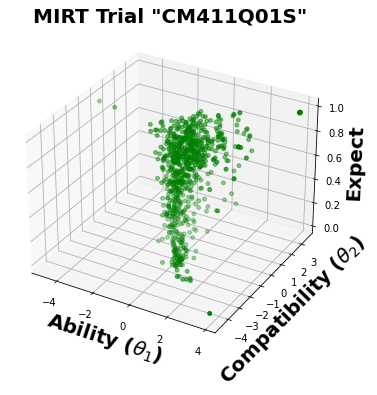

In [70]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


xs = extract_th1.copy()
ys = extract_th2.copy()
zs = rat_z.copy()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ys, xs, zs, color='g', marker='o', s=15, cmap='Greens')

ax.set_title('MIRT Trial "CM411Q01S"', fontdict={'weight': 'bold', 'size': 20})
ax.set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_ylabel('Compatibility ('r'$\theta_2$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_zlabel('Expect', fontdict={'weight': 'bold', 'size': 20})

plt.show()

## To Plot in 2D

In [47]:
# Ingredient Preprocessing
seed_z = expect_model(alpha1_norm, alpha2_norm, d_norm, theta1_norm, theta2_norm)
vect_z = seed_z.copy()                     # expectation value

vect_th1 = theta1_norm[:, 0].copy()        # Ability vector
#vect_th2 = theta2_test[:, 0].copy()       # Compatibility vector

vect_real = num_df.copy()                  # real value of correct or incorrect

In [48]:
print(columcolum)
print(columcolum.shape[0])
#print(cols_list)


Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object')
51


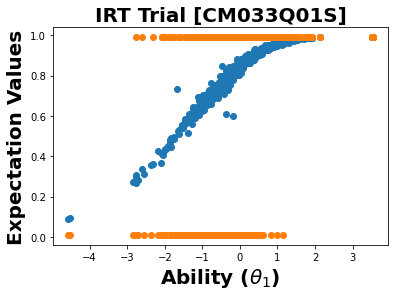

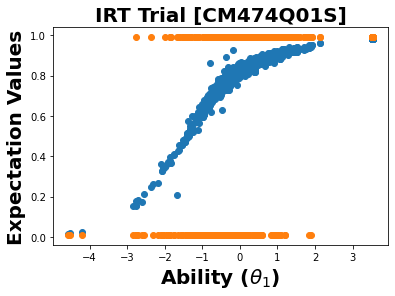

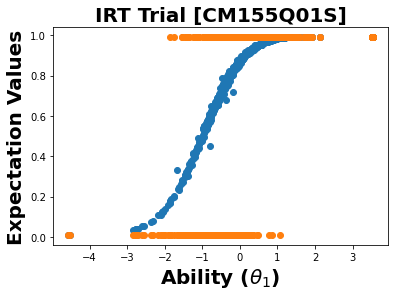

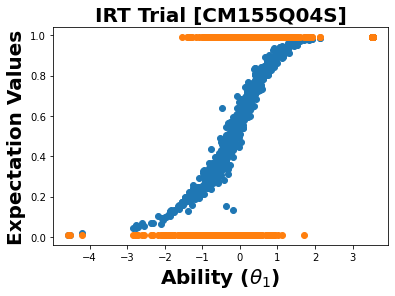

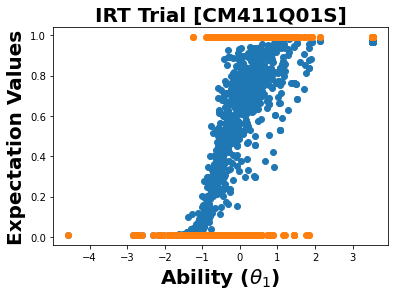

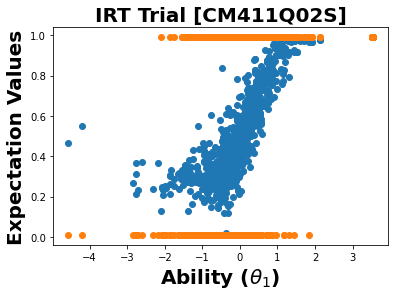

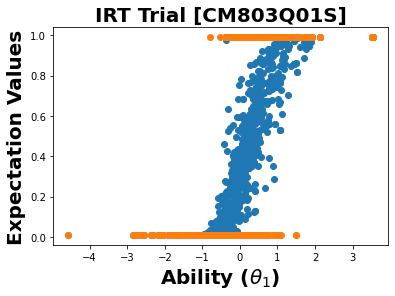

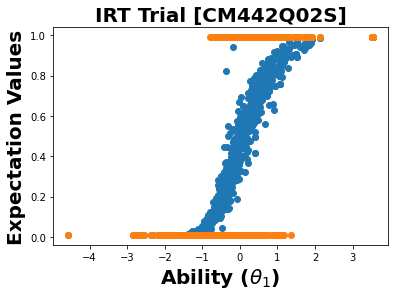

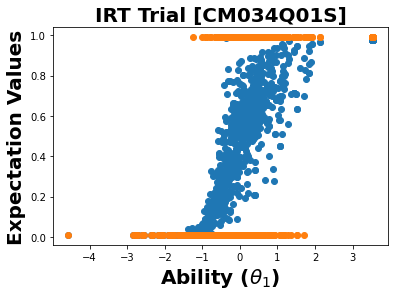

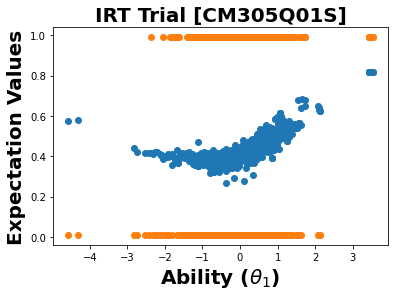

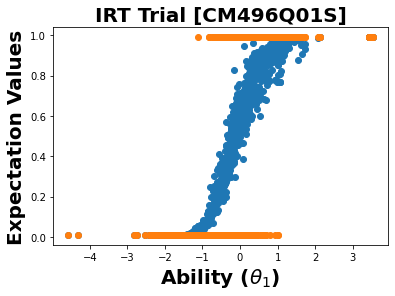

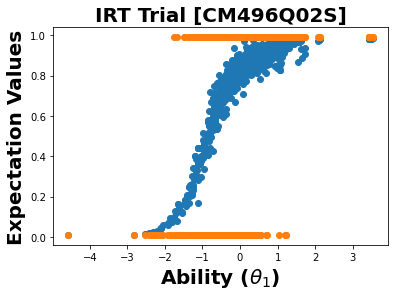

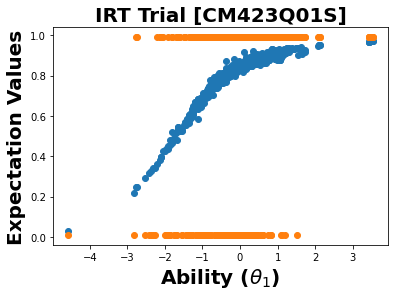

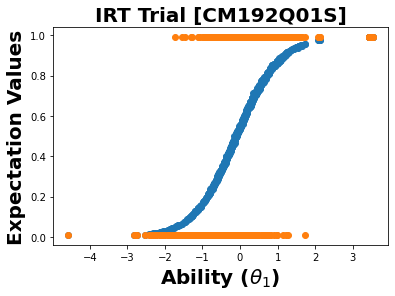

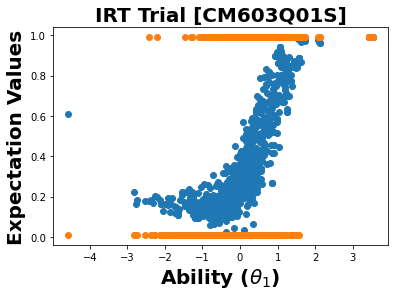

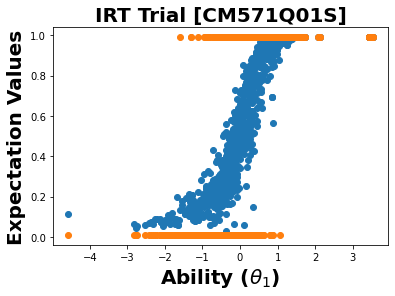

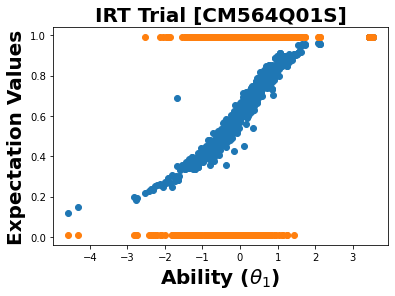

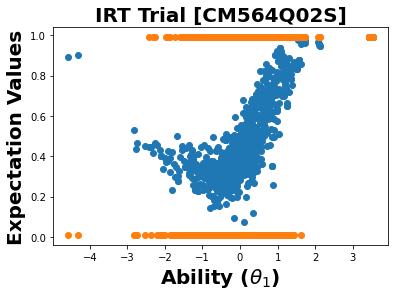

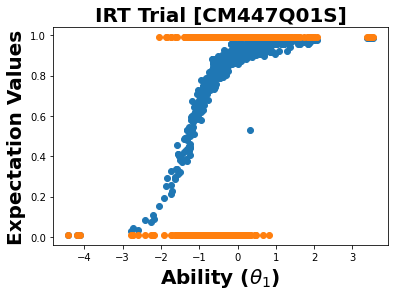

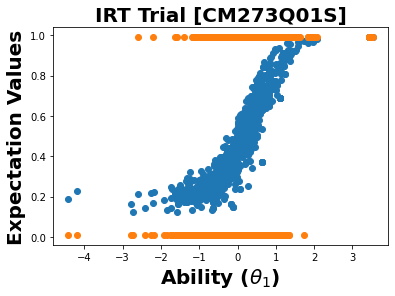

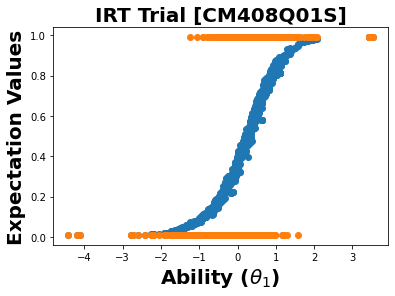

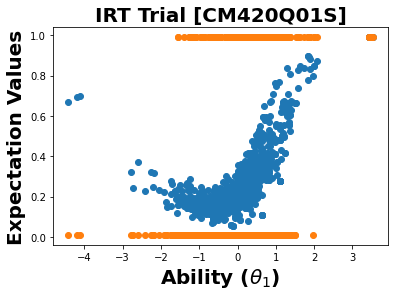

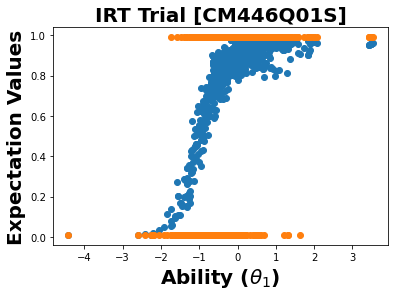

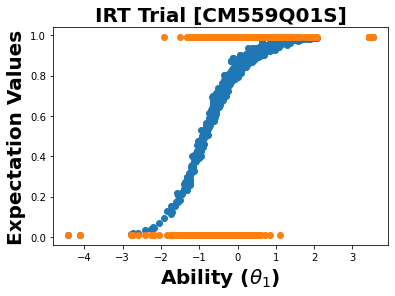

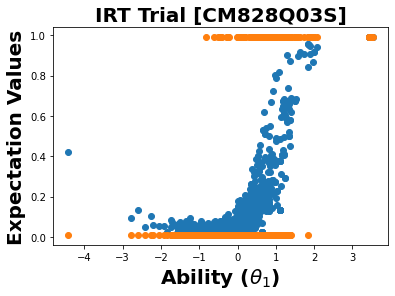

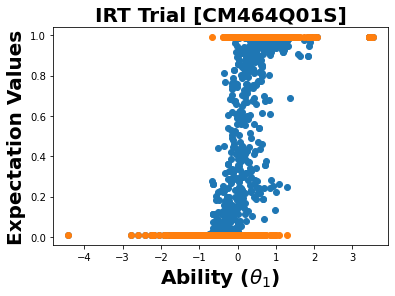

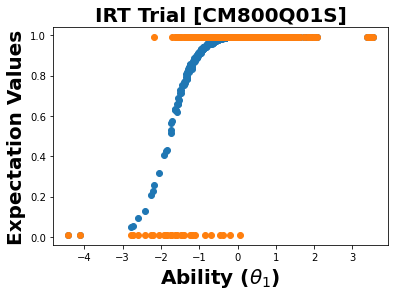

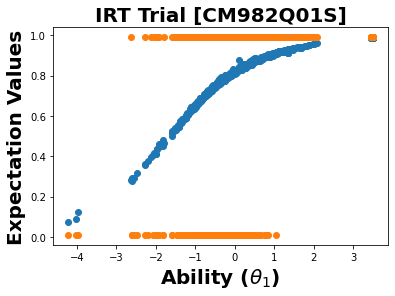

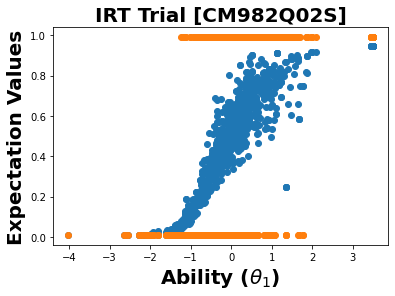

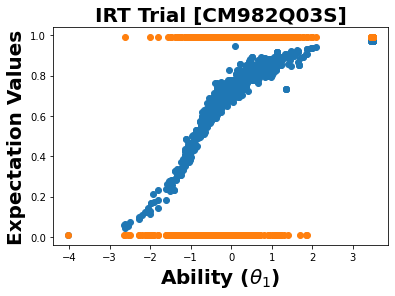

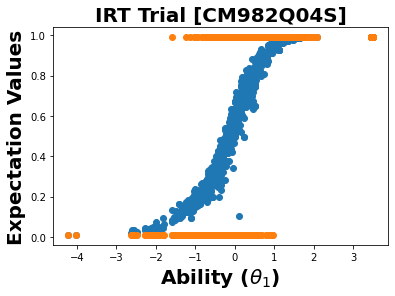

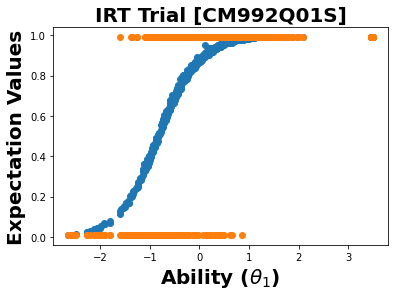

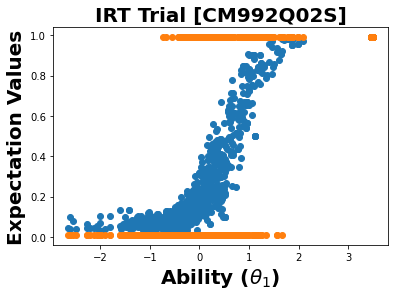

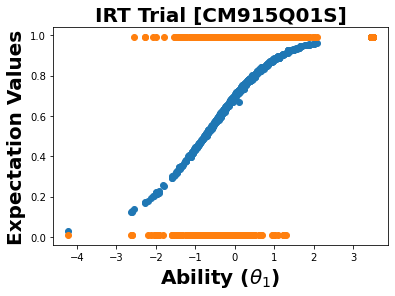

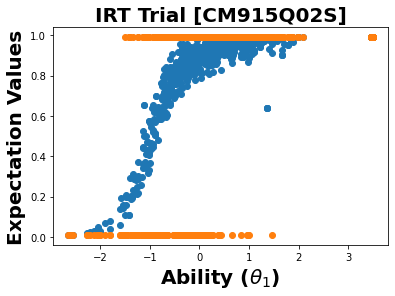

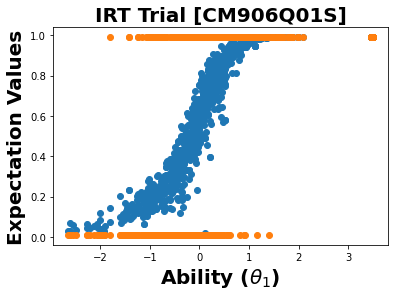

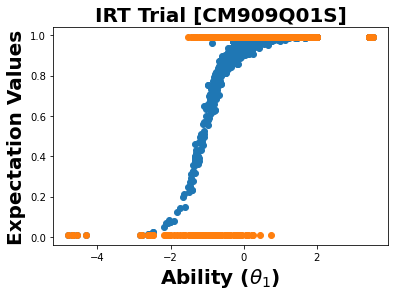

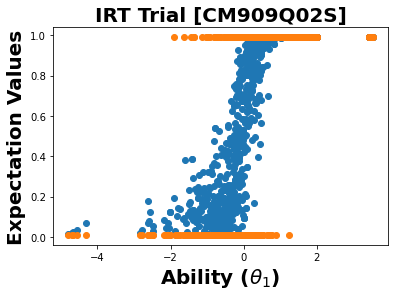

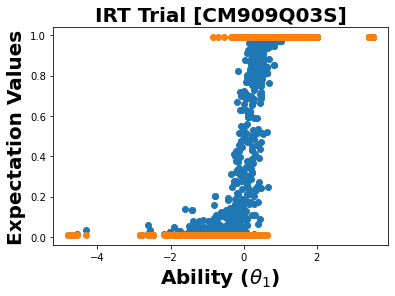

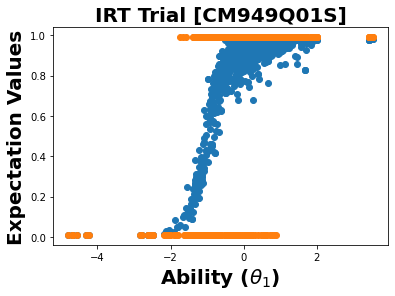

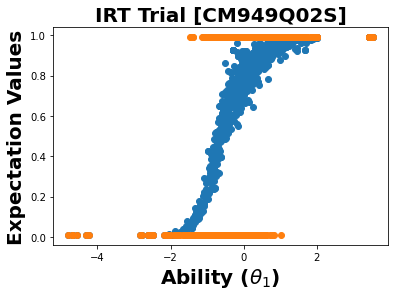

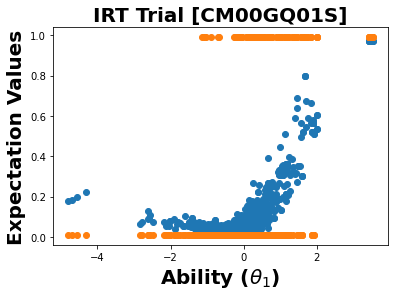

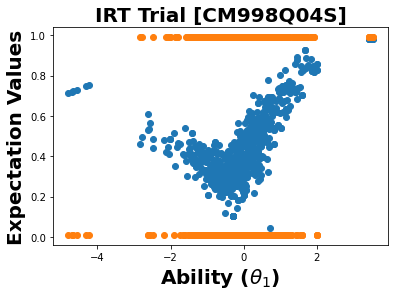

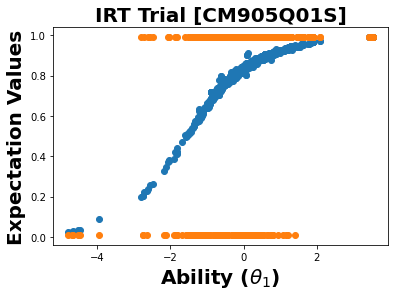

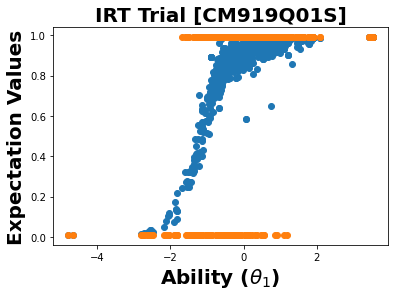

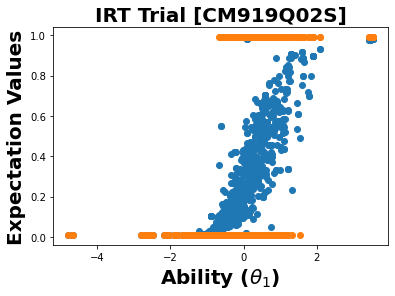

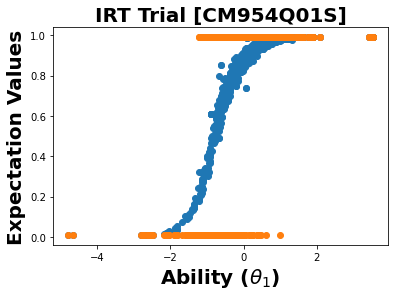

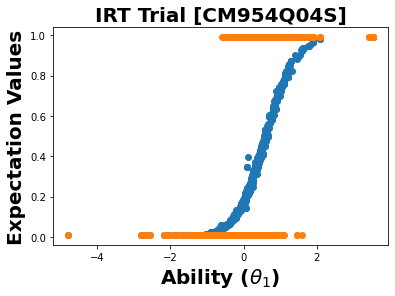

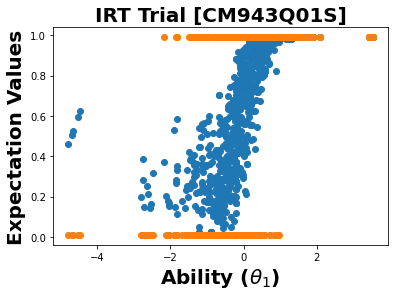

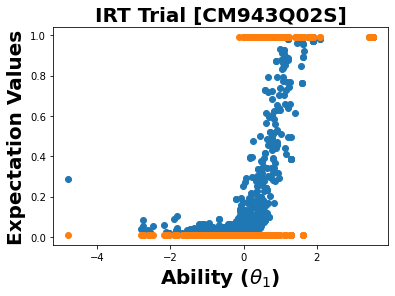

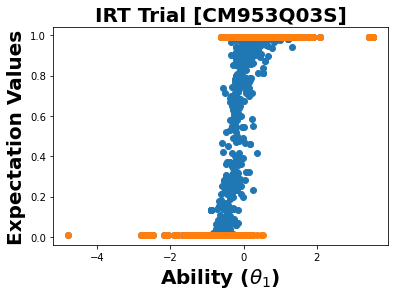

In [49]:
for i in range(seed_z.shape[1]):
    copy_th1 = vect_th1.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th1 = np.delete(copy_th1, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = copy_th1.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    plt.scatter(x=xs, y=ys)
    plt.scatter(x=xs, y=zs)

    plt.title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 20})
    plt.xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
    plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
    plt.show()
            

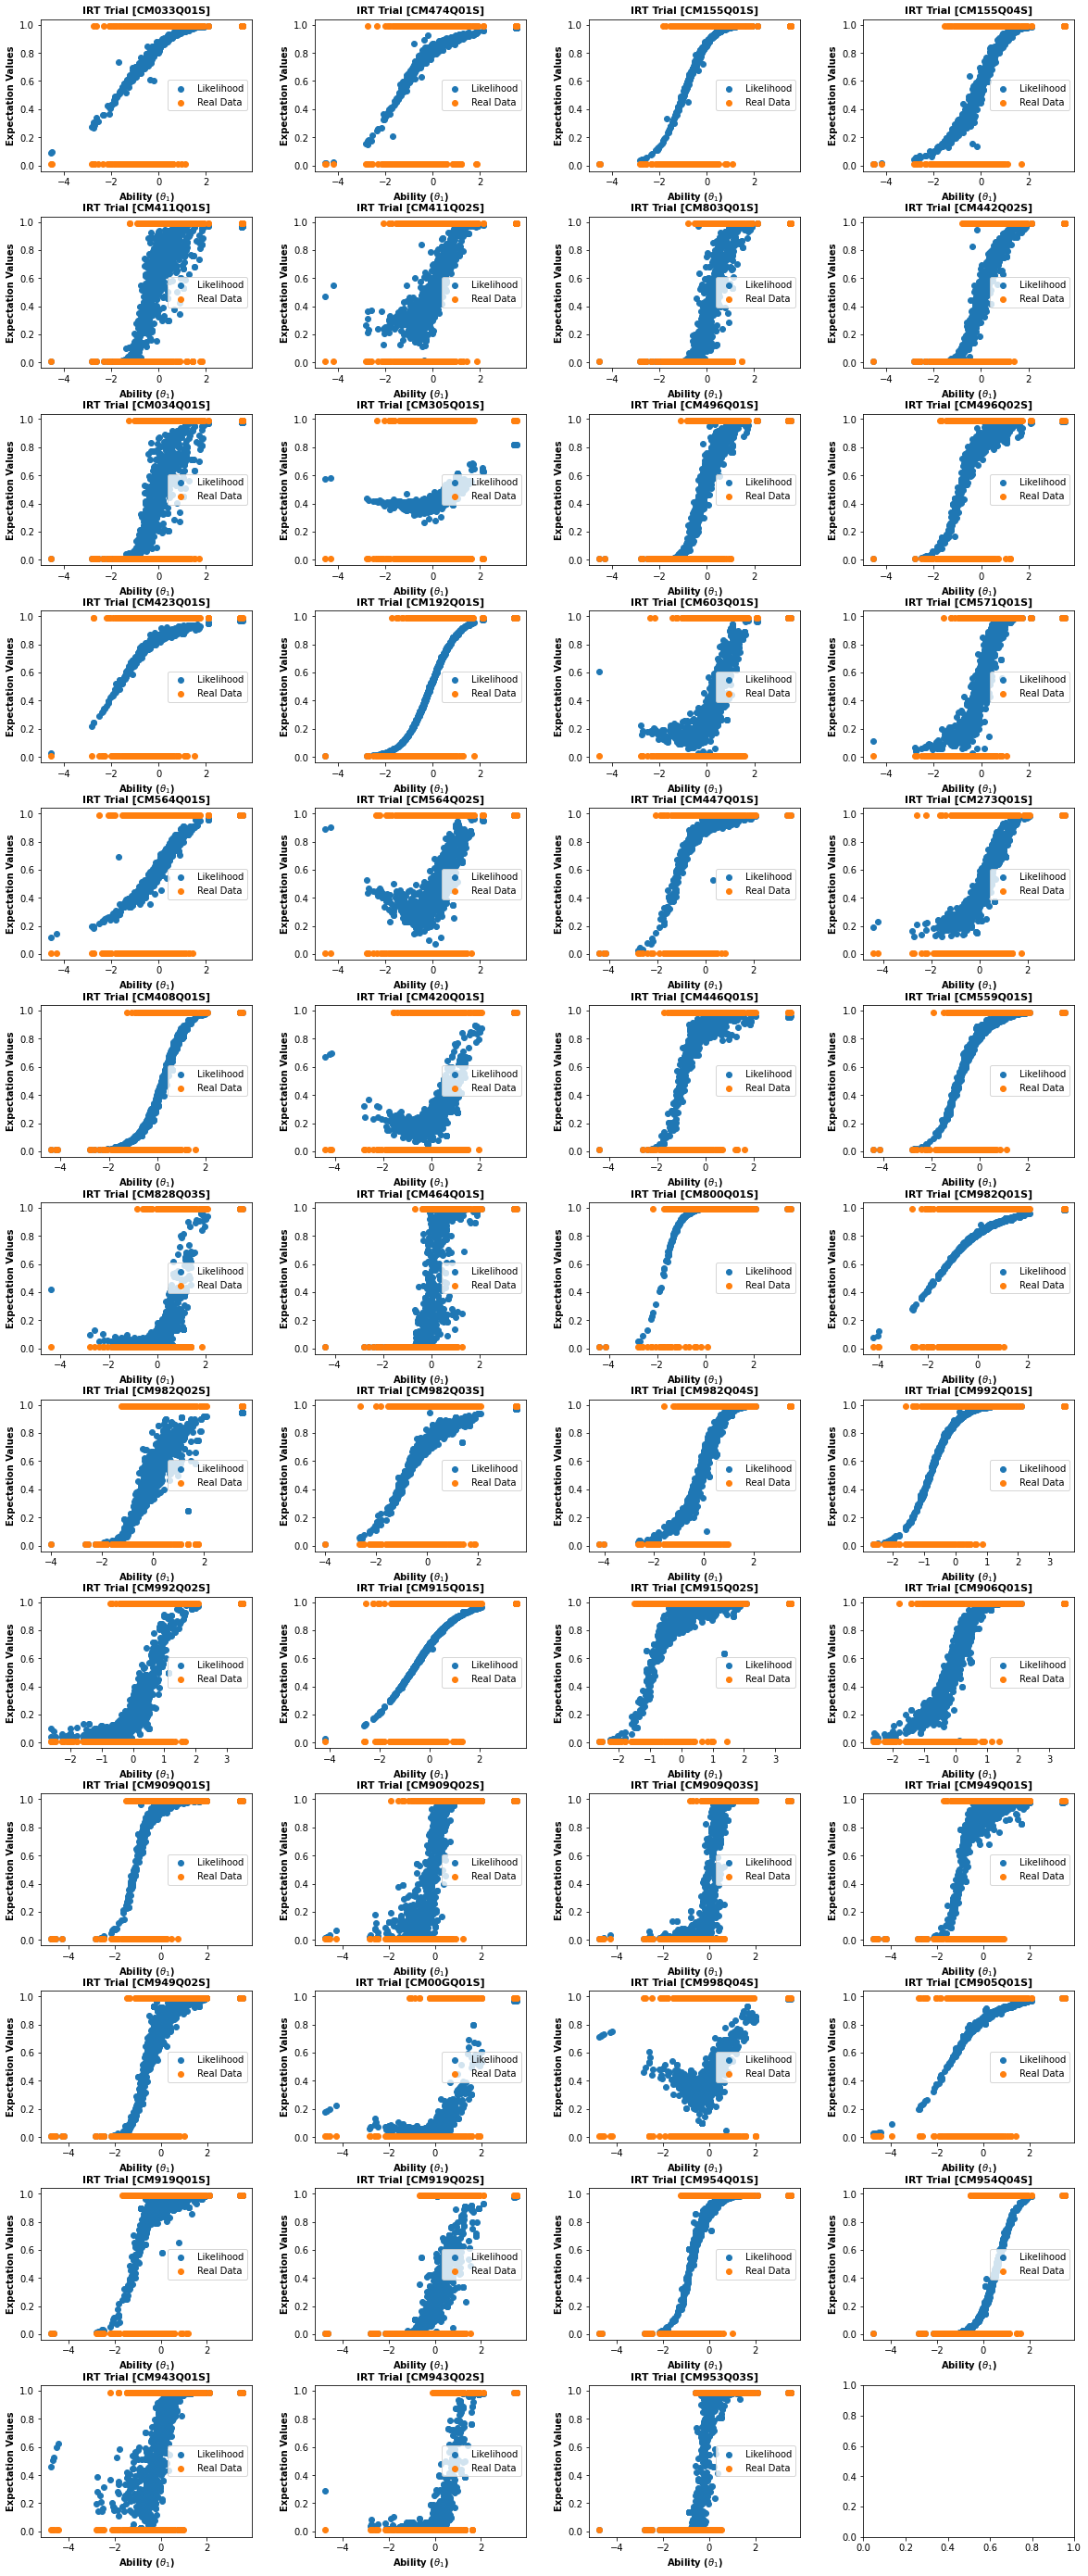

In [50]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    copy_th1 = vect_th1.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th1 = np.delete(copy_th1, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = copy_th1.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

## Plot in 'Equivalent Ability'

Equilvalent Ability is introduced to confirm the tendency of changing the model by the conversion formula below.

$\theta_{eq} = \theta_1 + \frac{\alpha_2}{\alpha_1} \theta_2$ 

In this formula, the compatibility($\theta_2$) plays the role to revise the initial bias of the ability($\theta_1$).

In [51]:
print(alpha1_norm.shape)
print(theta2_norm.shape)
print(alpha1_norm[0, :])
print(alpha1_norm[0, :][50])

(1, 51)
(2727, 1)
[1.11307056 0.98699758 1.94960562 1.46045715 2.68681766 0.9611245
 4.36543359 2.7906079  2.87320654 0.14945621 3.06690115 1.8255714
 0.87160849 1.78441469 0.89414004 1.98304886 0.91066394 0.54443832
 1.53946599 1.11839734 1.88974309 0.50193593 1.94370402 1.81241608
 0.96240137 7.90784701 3.21775078 0.86638529 1.94101744 1.19157681
 1.95707357 2.36926535 1.36054219 1.10097045 2.05416468 2.15235338
 2.15654398 3.09671418 3.65131713 2.02853065 2.32308996 0.60823176
 0.37197747 0.99365962 1.81278675 2.92819857 2.54527294 2.74017947
 2.05009163 1.3916882  8.68241214]
8.682412139297293


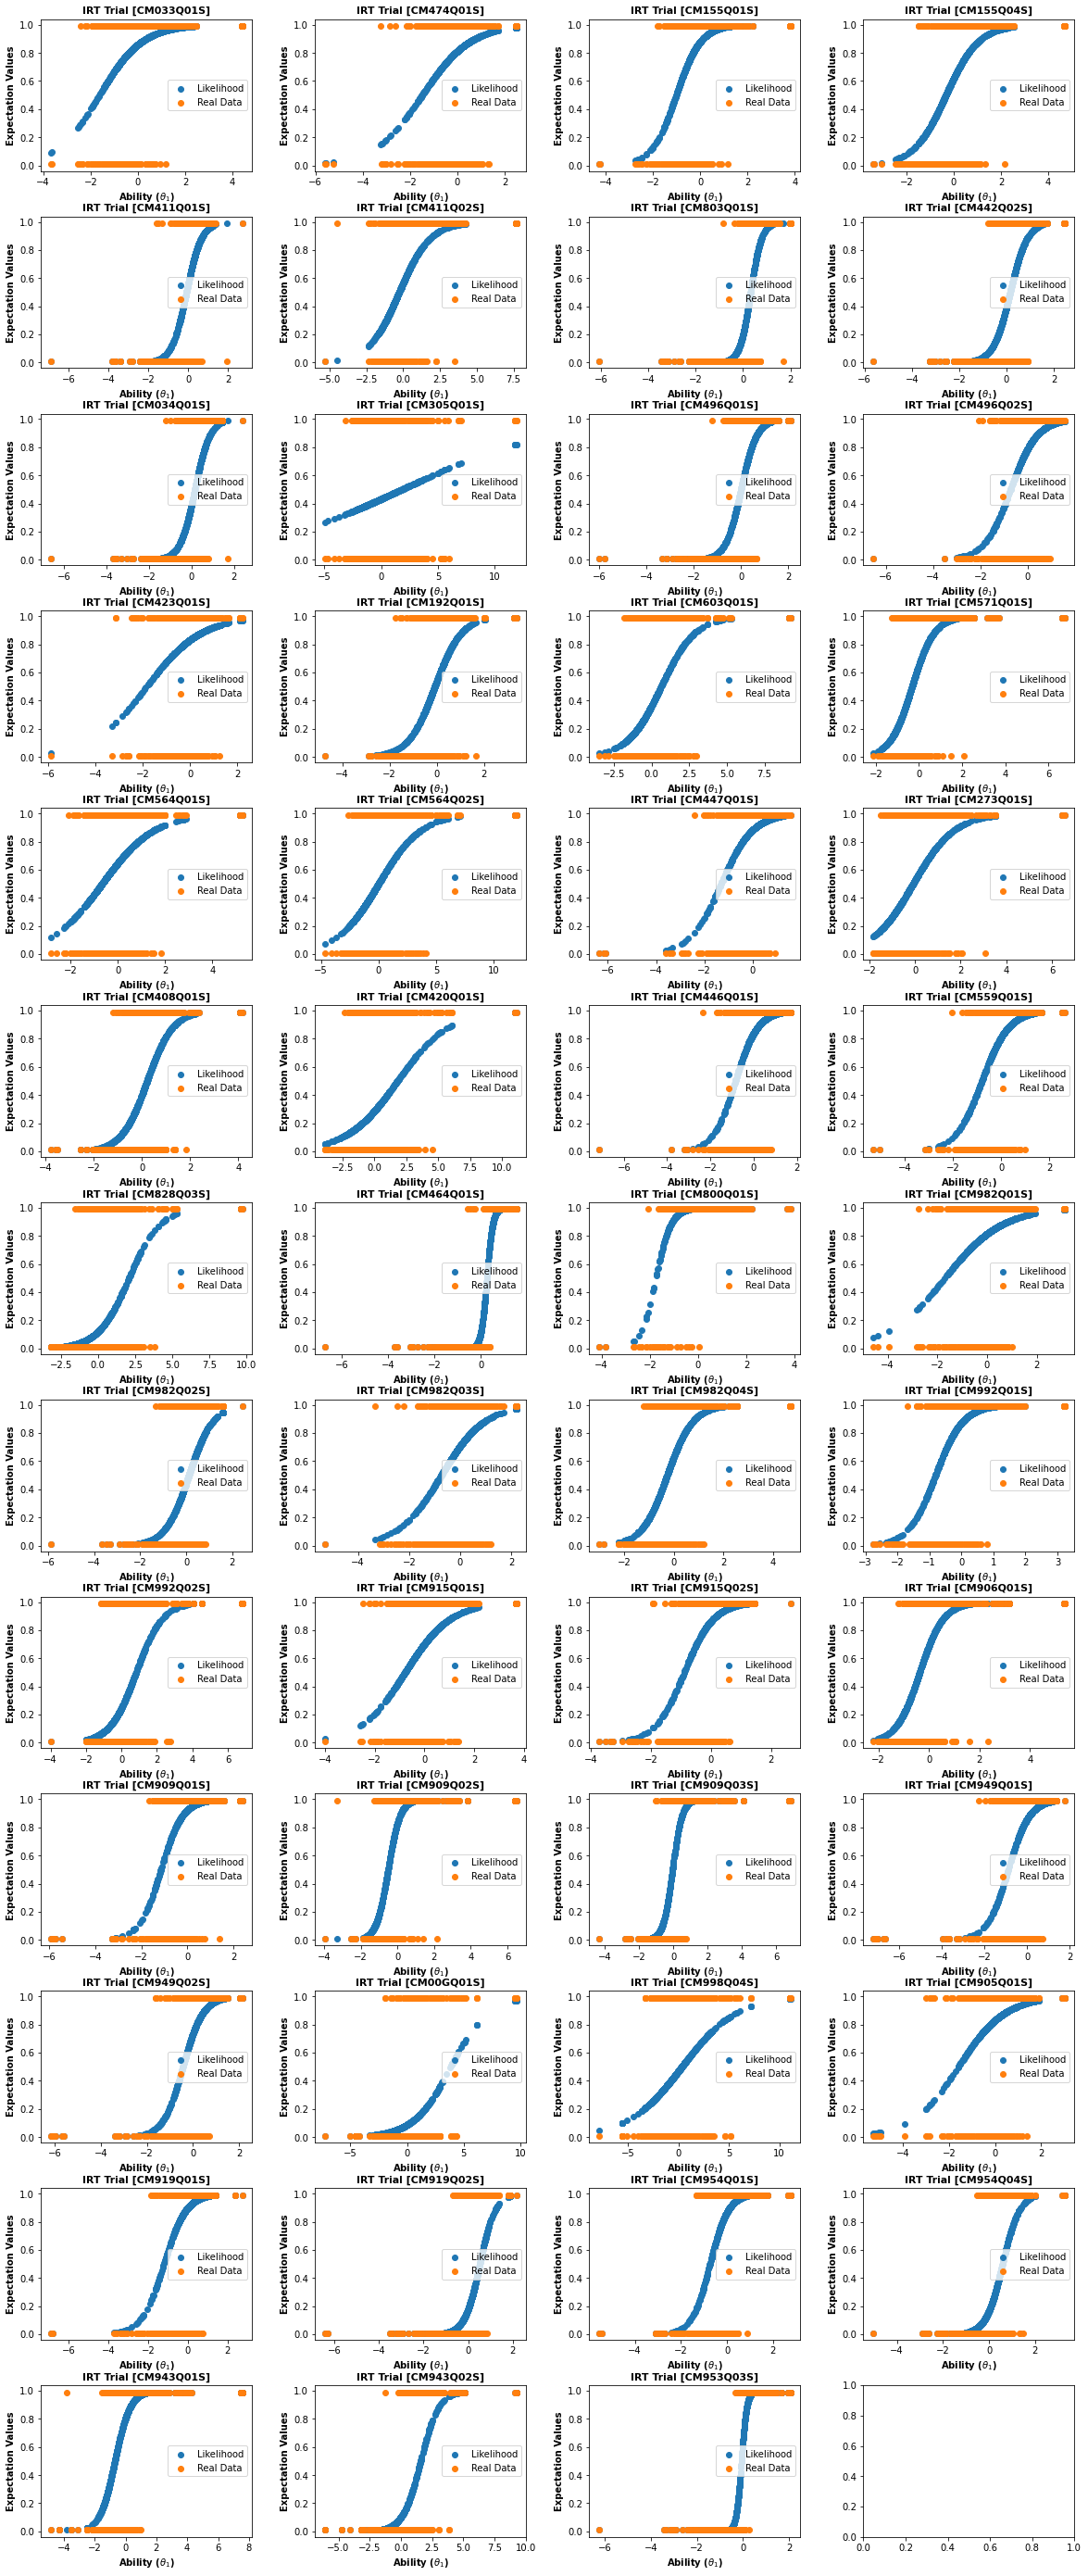

In [52]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

copy_th1 = vect_th1.copy()
copy_th2 = theta2_norm[:, 0].copy()
copy_al1 = alpha1_norm[0, :].copy()
copy_al2 = alpha2_norm[0, :].copy()

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    th_eq = copy_th1 + ((copy_al2[i]) / (copy_al1[i])) * copy_th2
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            th_eq = np.delete(th_eq, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = th_eq.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

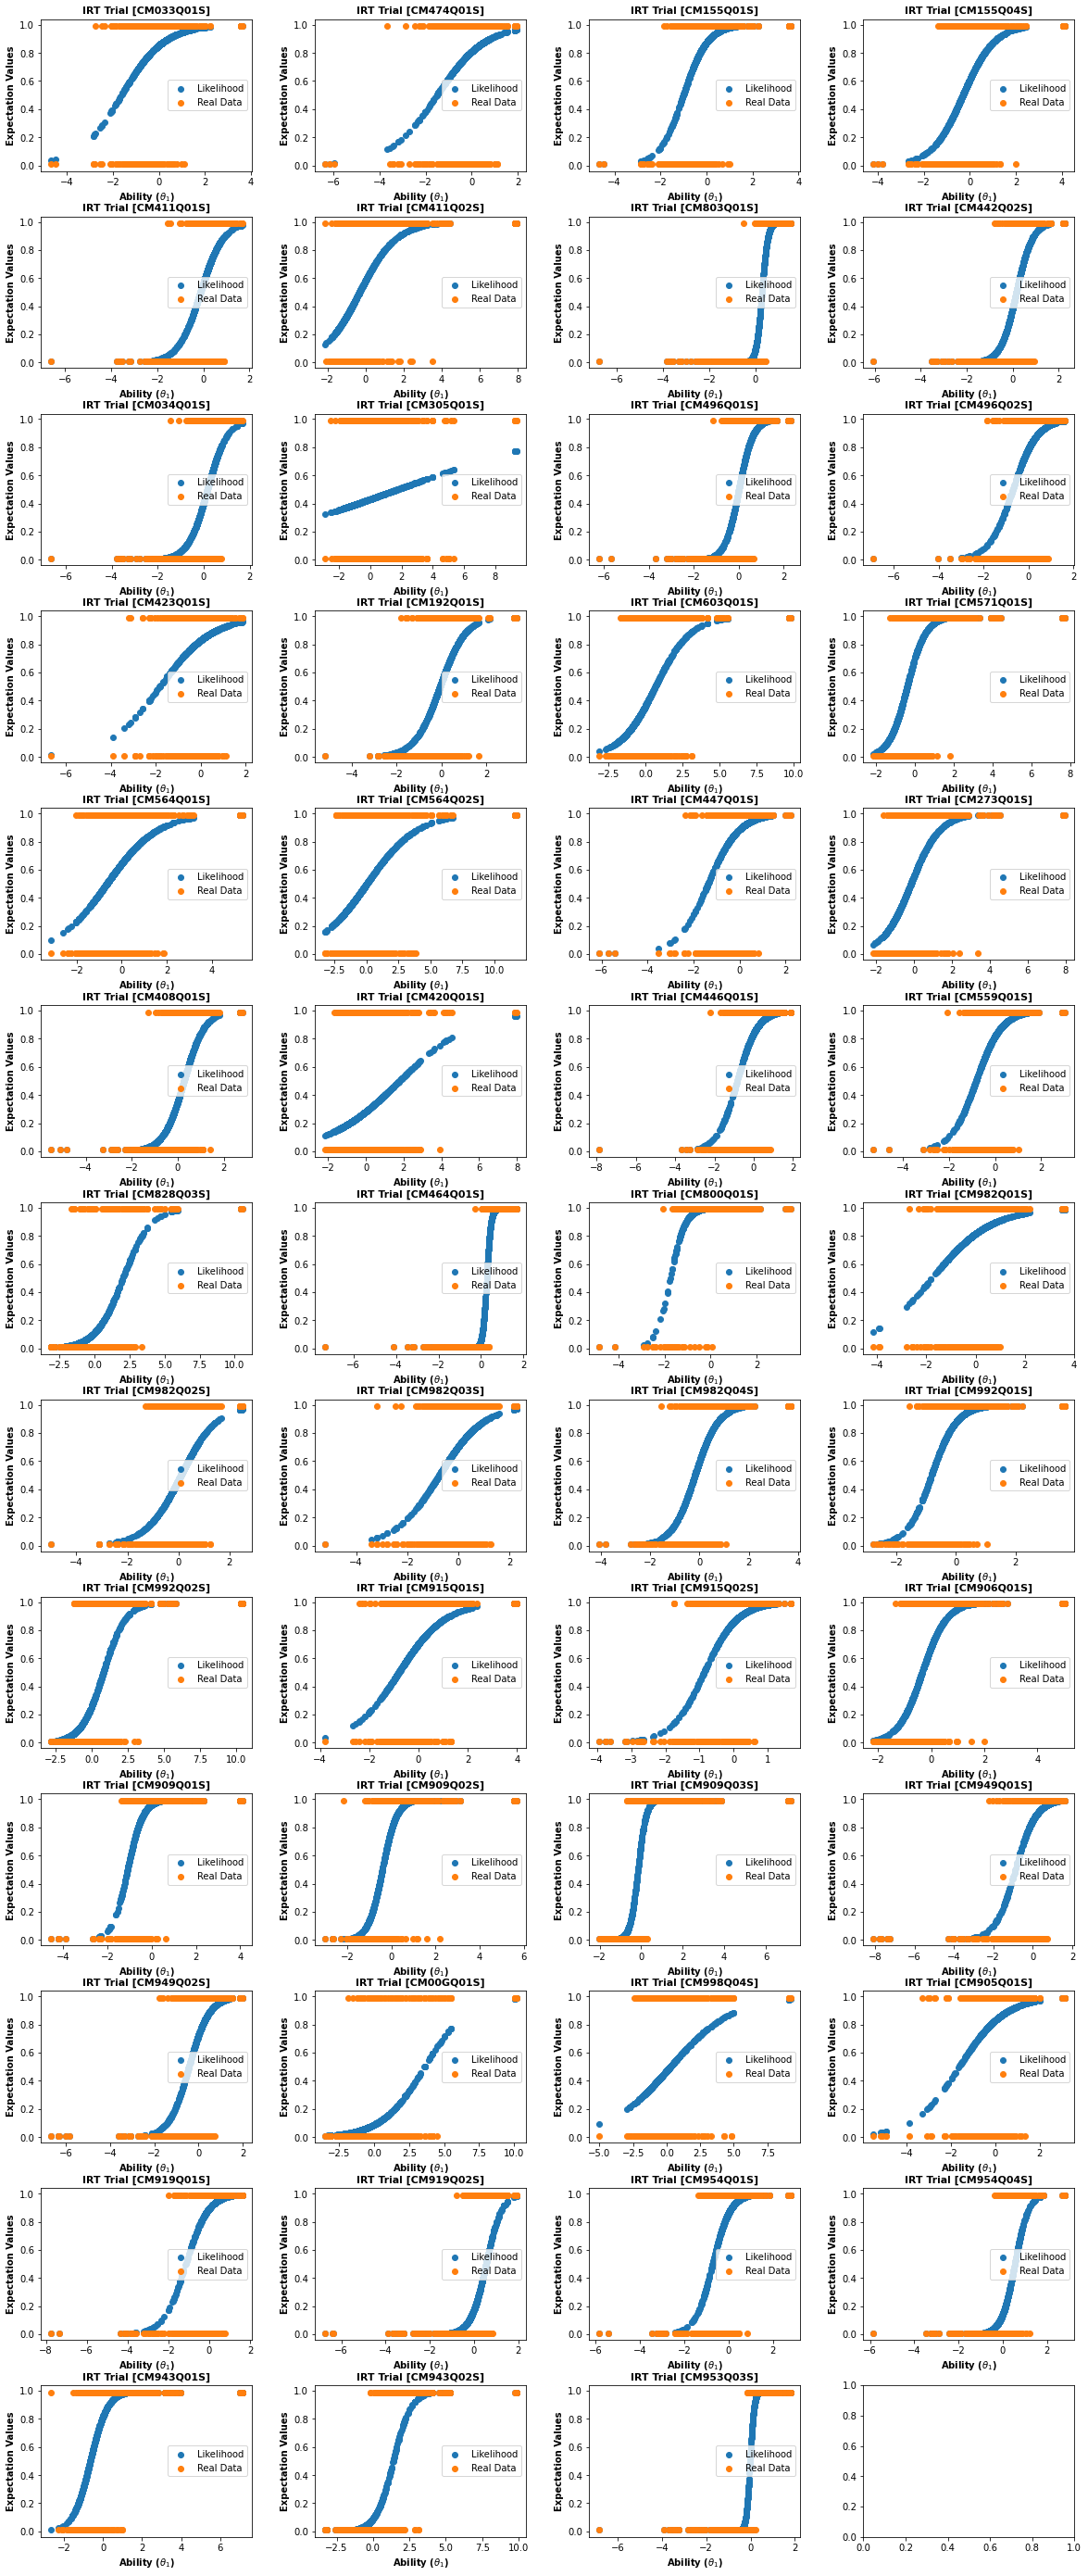

In [57]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

copy_th1 = vect_th1.copy()
copy_th2 = theta2_norm[:, 0].copy()
copy_al1 = alpha1_norm[0, :].copy()
copy_al2 = alpha2_norm[0, :].copy()

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    th_eq = copy_th1 + ((copy_al2[i]) / (copy_al1[i])) * copy_th2
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            th_eq = np.delete(th_eq, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = th_eq.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

## The Plot in 3D Again

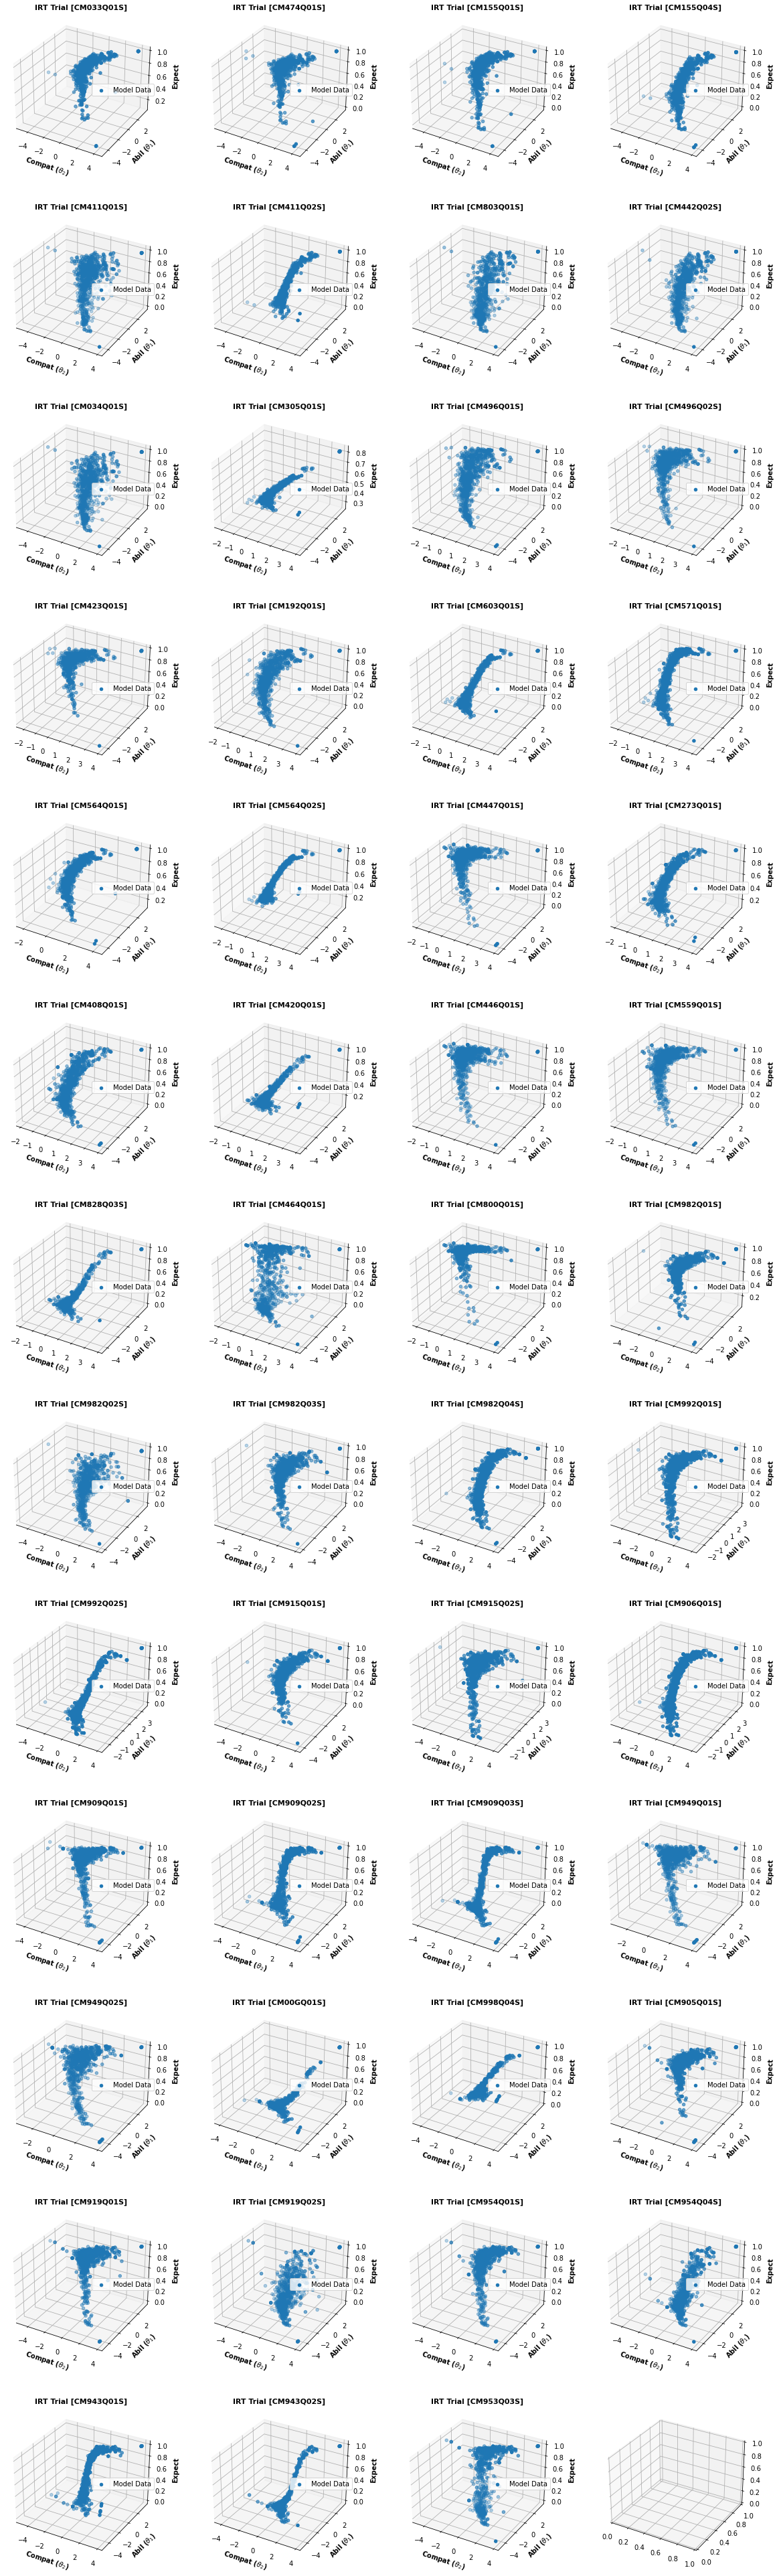

In [54]:
# 최종 plotting 결과를 격자 방식으로 나열
fig, axs = plt.subplots(nrows=13, ncols=4, figsize=(20, 70), 
                        subplot_kw={"projection":"3d"})

garo = 0
sero = 0

copy_th1 = vect_th1.copy()                       # Ability theta 복사
copy_th2 = theta2_norm[:, 0].copy()              # Compatibility theta 복사

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


# 격자 채워넣기

for i in range(seed_z.shape[1]):
    cat_th1 = copy_th1.copy()                     # 다음 문제에 활용하기 위해 리셋
    cat_th2 = copy_th2.copy()                     # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)       # 뒷쪽 리스트 성분부터 삭제 (index number 꼬이는거 방지)
        
        if np.isnan(seed_z[:, i][n]):             # seez_z에서 NaN 발견되는 순간, 여기에 해당하는 모든 theta 동시 삭제
            cat_th1 = np.delete(cat_th1, n)
            cat_th2 = np.delete(cat_th2, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = cat_th1.tolist()    # Ability theta가 x축
    ys = cat_th2.tolist()    # Compatibility theta가 y축
    z1 = copy_z.tolist()     # Model로 계산한 값
    z2 = copy_real.tolist()   # 정오표에 기록된 실제 데이터

    axs[garo, sero].scatter(xs=ys, ys=xs, zs=z1, marker='o', cmap='inferno', label='Model Data')
    #axs[garo, sero].scatter(xs=xs, ys=ys, zs=z2, marker='X', cmap='Greens', label='Real Data')

    axs[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axs[garo, sero].set_ylabel('Abil ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axs[garo, sero].set_xlabel('Compat ('r'$\theta_2$'')', fontdict={'weight': 'bold', 'size': 10})
    axs[garo, sero].set_zlabel('Expect', fontdict={'weight': 'bold', 'size': 10})
    
    axs[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4    # 오른쪽으로 한 칸씩 전진, 한 줄에 4개 모두 다 차면 줄 바꾸기 (숫자 범위: 0~3)
    sero = sero % 4      # 가로 4줄 모두 다 차면 Plot할 줄 바꾸기 (index 나누기 4의 몫에 해당)
    
plt.show()

## Comparison with existing theta

In [55]:
theta_ex = pd.read_csv("theta_norm_T.csv")
print(theta_ex)

      Unnamed: 0         0
0              0  0.729779
1              1  0.295815
2              2  0.191161
3              3 -0.171805
4              4  0.557345
...          ...       ...
2722        2722  0.203124
2723        2723 -1.034252
2724        2724  0.674030
2725        2725 -1.247872
2726        2726 -0.183229

[2727 rows x 2 columns]


In [56]:
theta_pr2 = theta_ex.iloc[:, 1].to_numpy()
print(theta_pr2)
print(theta_pr2.shape)

[ 0.72977913  0.29581539  0.19116132 ...  0.67402977 -1.24787226
 -0.18322867]
(2727,)


In [57]:
# Now, it is time to compare two thetas in the end!!

import matplotlib.pylab as pylab
from sklearn.metrics import r2_score

In [58]:
theta_now = theta1_norm.copy()
theta_nowT = np.transpose(theta_now)
theta_now_fin = theta_nowT[0, :]
print(theta_now_fin)
print(theta_now_fin.shape)

[ 0.93954138  0.26216441  0.27318798 ...  0.87291991 -1.07984828
 -0.11250968]
(2727,)


In [59]:
x = theta_pr2
y = theta_now_fin
R2 = r2_score(x, y)
print(R2)

0.9782228397683347


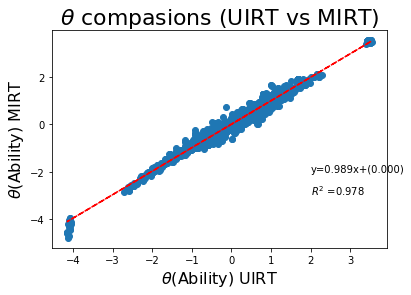

In [60]:
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

pylab.plot(x, y,'o')
pylab.plot(x,p(x),"r--")
pylab.xlabel(r'$\theta$' "(Ability) UIRT", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' "(Ability) MIRT", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (UIRT vs MIRT)", fontdict={'size': 22})
pylab.text(2,-2, "y=%.3fx+(%.3f)"%(z[0],z[1]), fontdict={'size': 10})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})
pylab.show()

## Comparison with two thetas (Ability vs Compatibility)

In [61]:
theta_comp = theta2_norm.copy()
theta_compT = np.transpose(theta_comp)
theta_comp_fin = theta_compT[0, :]
print(theta_comp_fin)
print(theta_comp_fin.shape)

[ 0.00103037  0.3194335  -0.61364232 ...  0.2136446  -0.34530161
 -0.7502876 ]
(2727,)


In [62]:
x_2 = theta_now_fin               # Ability
y_2 = theta_comp_fin              # Compatibility
R2 = r2_score(x_2, y_2)
print(R2)

z_2 = np.polyfit(x_2, y_2, 1) # (X,Y,차원) 정의
p_2 = np.poly1d(z_2) # 1차원 다항식에 대한 연산을 캡슐화

-0.26626349982343256


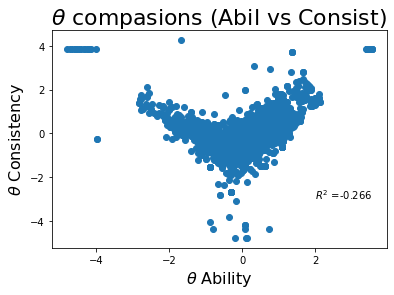

In [63]:
pylab.plot(x_2, y_2,'o')
pylab.xlabel(r'$\theta$' " Ability", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " Consistency", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (Abil vs Consist)", fontdict={'size': 22})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})
pylab.show()

## Comparison between $\beta$ of UIRT and d of MIRT

In [64]:
beta_U = pd.read_csv("beta_norm.csv")
d_M = d_test[0, :]

In [65]:
beta_U_bf = beta_U.to_numpy()
beta_U_np = beta_U_bf[0, 1:]

In [66]:
x3 = beta_U_np.copy()
y4 = d_M.copy()
#R2_5 = r2_score(y4, x3)

z4 = np.polyfit(x3, y4, 1) # (X,Y,차원) 정의
p4 = np.poly1d(z4) # 1차원 다항식에 대한 연산을 캡슐화


In [67]:
print(z4[0])
y_pred = z4[0] * x3
print(y_pred)

1.5984912833125215
[-2.63758501 -2.5145413  -1.69410705 -0.42490332 -0.37964954 -0.22239825
  0.64589643  0.26142938  0.27764015  1.53116609 -0.16156134 -1.46334132
 -3.00005978 -0.13776673  0.87911172 -0.12884459 -0.8718774   0.30739577
 -2.21120689  0.15752782  0.42232054  2.12400679 -1.72153968 -1.35602439
  1.73080308  0.25170062 -2.9409283  -2.73279489  0.12850115 -1.38623797
 -0.26148155 -1.33017563  0.97668543 -1.24640367 -1.74359381 -0.32731539
 -1.79768332 -0.25434383  0.29350533 -1.78387694 -0.98797987  2.5378839
  0.57879329 -2.62530061 -2.0875117   1.2539013  -1.30661958  1.00180227
 -0.81325574  1.27488599 -0.30735952]


In [68]:

R2_6 = r2_score(y4, y_pred)
print("The R^2 score between 'beta of UIRT' and 'd of MIRT' : ")
print(R2_6)
print(" ")


The R^2 score between 'beta of UIRT' and 'd of MIRT' : 
0.6736028248547643
 


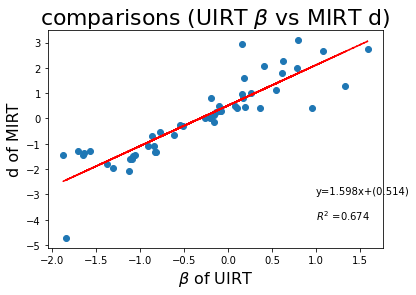

In [69]:
pylab.plot(x3, y4,'o')
pylab.plot(x3,p4(x3),"r--")

pylab.xlabel(r'$\beta$' " of UIRT", fontdict={'size': 16})
pylab.ylabel("d of MIRT", fontdict={'size': 16})
pylab.title("comparisons (UIRT " r'$\beta$' " vs MIRT d)", fontdict={'size': 22})
pylab.text(1,-3, "y=%.3fx+(%.3f)"%(z4[0],z4[1]), fontdict={'size': 10})
pylab.text(1,-4, r'$R^2$'" =%.3f"% R2_6, fontdict={'size': 10})
pylab.show()